# Motion Correction
This script will use "mcflirt" function of FSL to run estimate motion parameters.
<br>
Here we use the middle volume as reference. It also applies final transformations using spline interpolation.
<br>
The main outputs of this script are the realligned timeseries and the 6 estimated motion parameters (3 rotations + 3 traslations). These parmeters will be used to regress out the motion artificats from bold data.

-----------------------------------------------------------
Script written by Sepideh Tabrik & Mehdi Behroozi
<br>
Biopsychology, 
<br>
Ruhr-University Bochum, Bochum, Germany
<br>
(2022.03)

-----------------------------------------------------------

In [13]:

import glob
import os
import subprocess

data_path = '/mnt/d/Data/Human/ObjectCategorization/analysis2'
bold_dirs = glob.glob('%s/sub*/ses-02/func/*run*.nii.gz'%(data_path))

for curr_bold in bold_dirs:
    exp_name = curr_bold.split('_')[-2]
    sub_dir = os.path.join(os.path.dirname(curr_bold),exp_name)    
    print('Currect direcotry is: \n\t%s'%(sub_dir))
   
      # change directory to the res_dir 
    print('\t 1) Changing the working directory to %s'%(sub_dir))
    os.chdir(sub_dir)
    
    #motion correction

    print('\t 2) Motion Correction using "MCFLIRT" function of FSL ...')
    os.system("mcflirt -in %s -out bold_mcf -mats -plots -rmsrel -rmsabs -spline_final"%(curr_bold))
    os.system("mkdir -p mc ; mv -f bold_mcf.mat bold_mcf.par bold_mcf_abs.rms bold_mcf_abs_mean.rms bold_mcf_rel.rms bold_mcf_rel_mean.rms  mc")
    os.system("fsl_tsplot -i %s/bold_mcf.par -t 'MCFLIRT estimated rotations (radians)' -u 1 --start=1 --finish=3 -a x,y,z -w 640 -h 144 -o %s/rot.png"%('mc','mc'))
    os.system("fsl_tsplot -i %s/bold_mcf.par -t 'MCFLIRT estimated translations (mm)' -u 1 --start=4 --finish=6 -a x,y,z -w 640 -h 144 -o %s/trans.png"%('mc','mc'))
    os.system("fsl_tsplot -i %s/bold_mcf_abs.rms,%s/bold_mcf_rel.rms -t 'MCFLIRT estimated mean displacement (mm)' -u 1 -w 640 -h 144 -a absolute,relative -o %s/disp.png"%('mc','mc','mc')) 
  
  

Currect direcotry is: 
	/mnt/d/Data/Human/ObjectCategorization/analysis2/sub-76/ses-02/func/run-03
	 1) Changing the working directory to /mnt/d/Data/Human/ObjectCategorization/analysis2/sub-76/ses-02/func/run-03
	 2) Motion Correction using "MCFLIRT" function of FSL ...
Currect direcotry is: 
	/mnt/d/Data/Human/ObjectCategorization/analysis2/sub-76/ses-02/func/run-04
	 1) Changing the working directory to /mnt/d/Data/Human/ObjectCategorization/analysis2/sub-76/ses-02/func/run-04
	 2) Motion Correction using "MCFLIRT" function of FSL ...
Currect direcotry is: 
	/mnt/d/Data/Human/ObjectCategorization/analysis2/sub-76/ses-02/func/run-05
	 1) Changing the working directory to /mnt/d/Data/Human/ObjectCategorization/analysis2/sub-76/ses-02/func/run-05
	 2) Motion Correction using "MCFLIRT" function of FSL ...
Currect direcotry is: 
	/mnt/d/Data/Human/ObjectCategorization/analysis2/sub-77/ses-02/func/run-01
	 1) Changing the working directory to /mnt/d/Data/Human/ObjectCategorization/analysi

Currect direcotry is: 
	/mnt/d/Data/Human/ObjectCategorization/analysis2/sub-82/ses-02/func/run-04
	 1) Changing the working directory to /mnt/d/Data/Human/ObjectCategorization/analysis2/sub-82/ses-02/func/run-04
	 2) Motion Correction using "MCFLIRT" function of FSL ...
Currect direcotry is: 
	/mnt/d/Data/Human/ObjectCategorization/analysis2/sub-82/ses-02/func/run-05
	 1) Changing the working directory to /mnt/d/Data/Human/ObjectCategorization/analysis2/sub-82/ses-02/func/run-05
	 2) Motion Correction using "MCFLIRT" function of FSL ...
Currect direcotry is: 
	/mnt/d/Data/Human/ObjectCategorization/analysis2/sub-83/ses-02/func/run-01
	 1) Changing the working directory to /mnt/d/Data/Human/ObjectCategorization/analysis2/sub-83/ses-02/func/run-01
	 2) Motion Correction using "MCFLIRT" function of FSL ...
Currect direcotry is: 
	/mnt/d/Data/Human/ObjectCategorization/analysis2/sub-83/ses-02/func/run-02
	 1) Changing the working directory to /mnt/d/Data/Human/ObjectCategorization/analysi

### plot estimated motion parameters


Processing: sub-01/ses-02/run-01


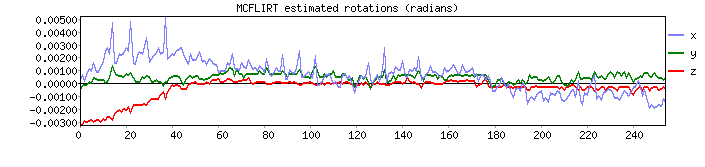

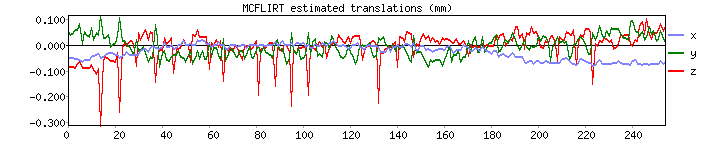

Processing: sub-01/ses-02/run-02


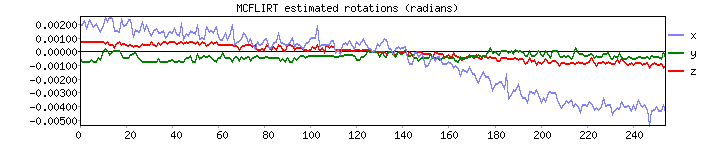

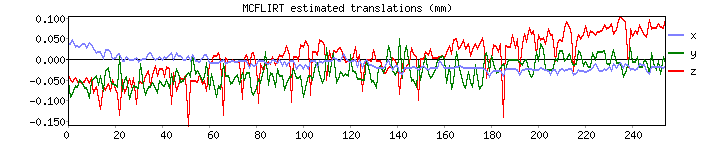

Processing: sub-01/ses-02/run-03


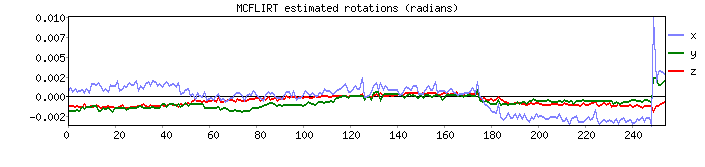

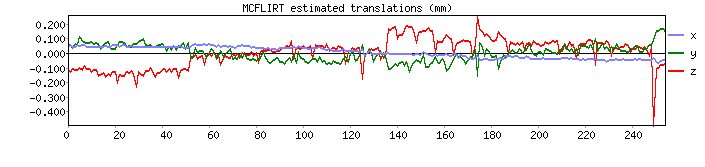

Processing: sub-01/ses-02/run-04


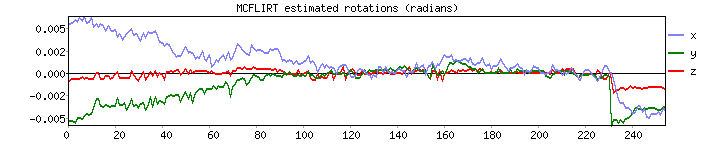

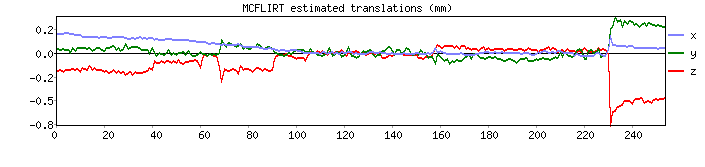

Processing: sub-01/ses-02/run-05


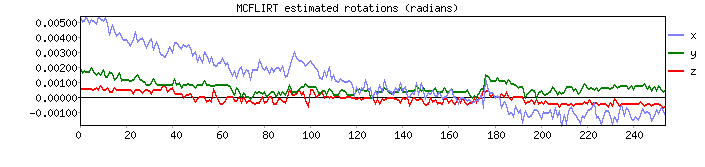

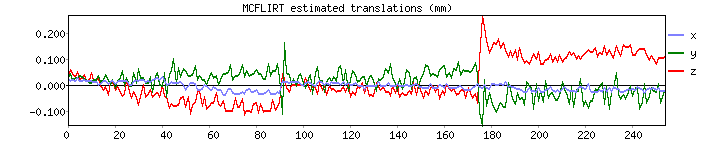

Processing: sub-02/ses-02/run-01


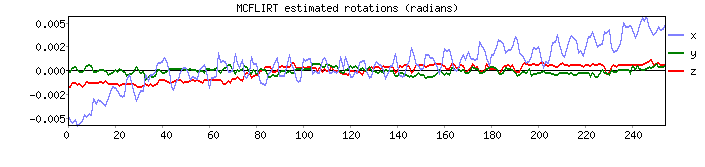

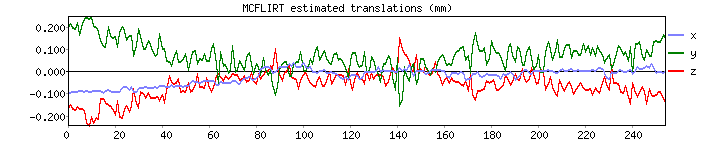

Processing: sub-02/ses-02/run-02


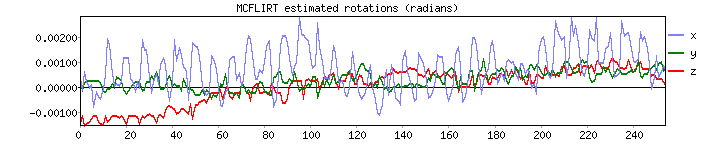

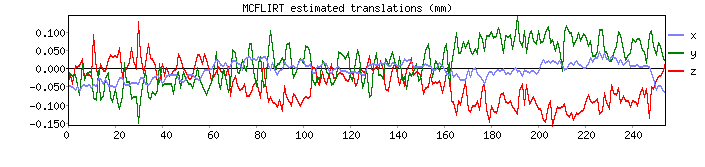

Processing: sub-02/ses-02/run-03


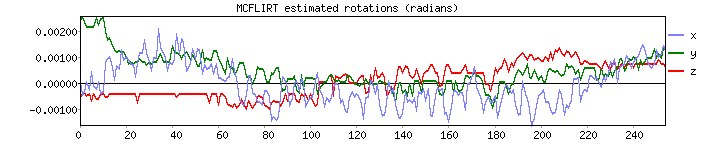

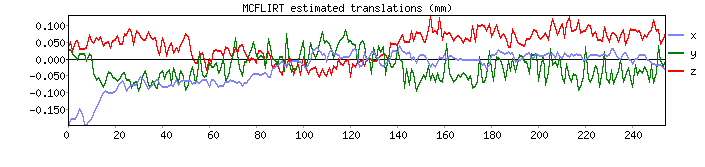

Processing: sub-02/ses-02/run-04


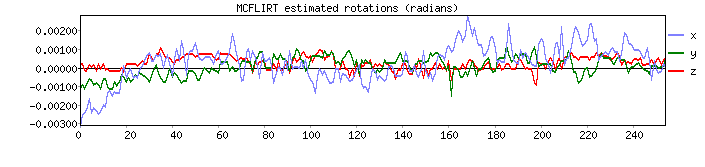

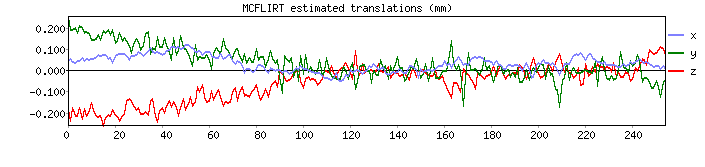

Processing: sub-02/ses-02/run-05


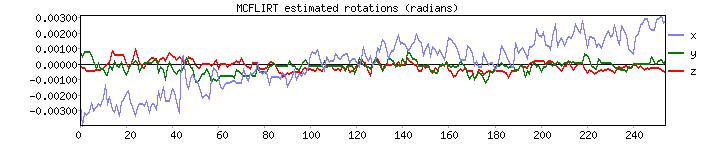

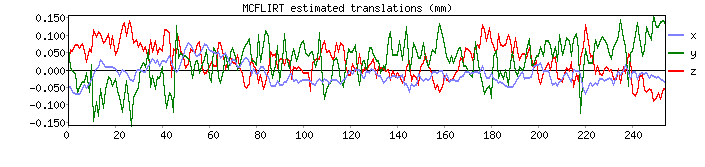

Processing: sub-03/ses-02/run-01


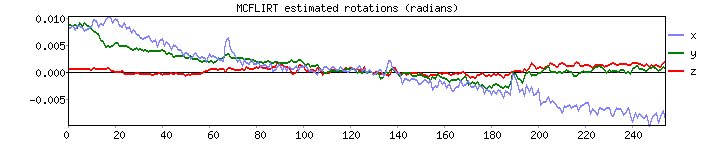

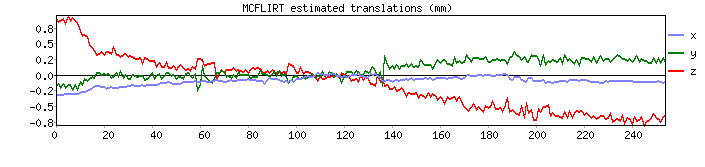

Processing: sub-03/ses-02/run-02


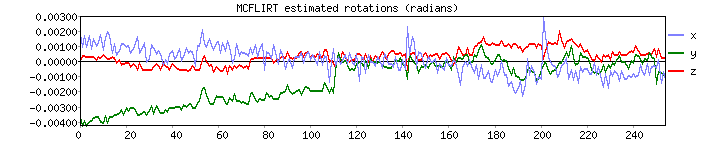

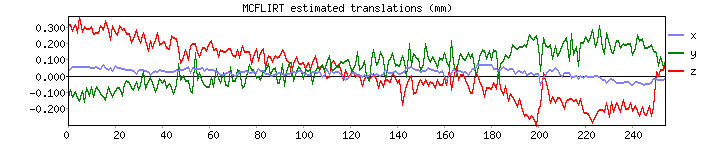

Processing: sub-03/ses-02/run-03


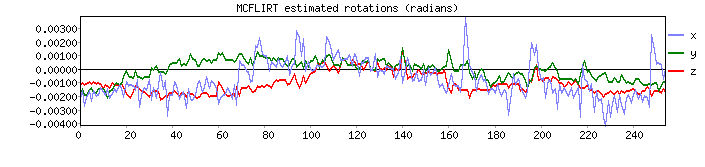

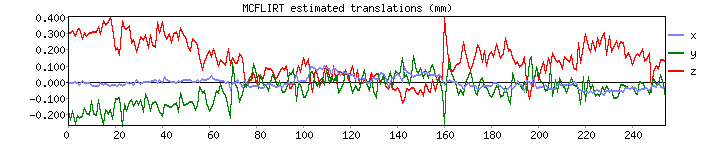

Processing: sub-03/ses-02/run-04


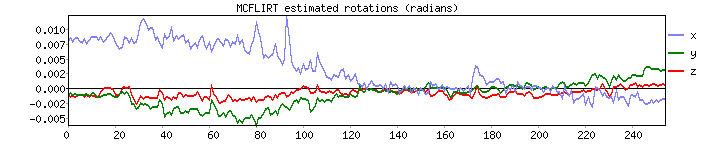

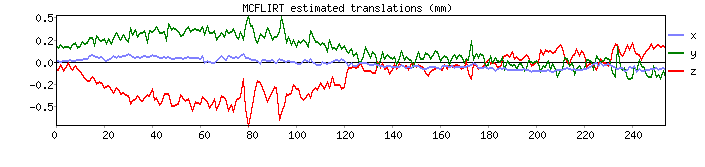

Processing: sub-03/ses-02/run-05


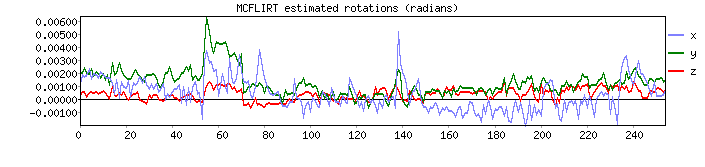

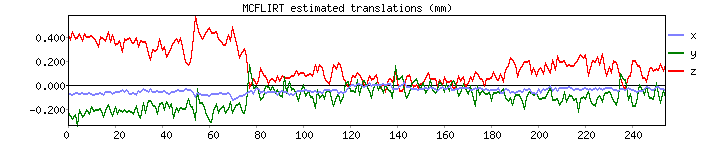

Processing: sub-04/ses-02/run-01


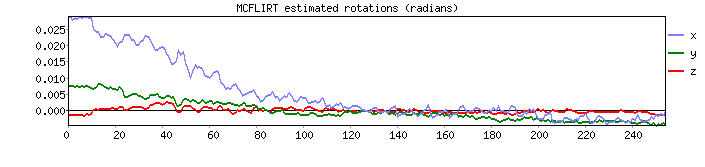

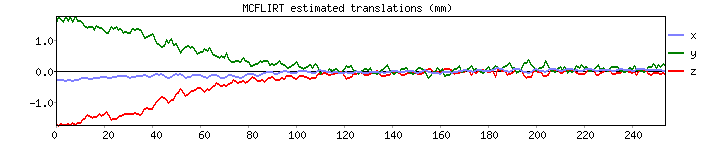

Processing: sub-04/ses-02/run-02


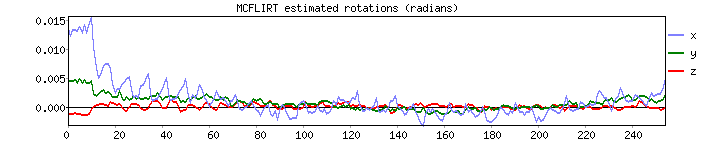

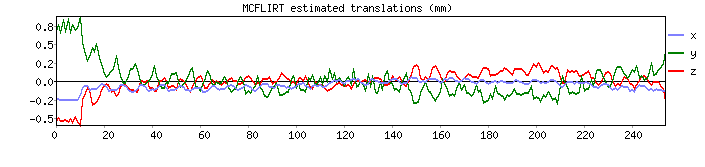

Processing: sub-04/ses-02/run-03


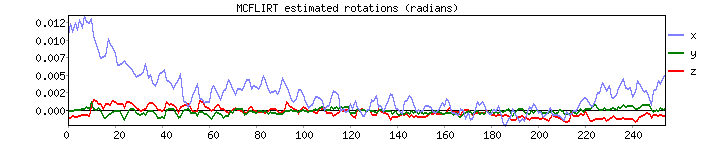

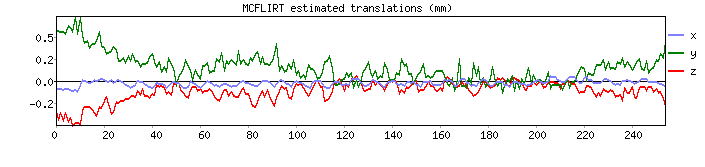

Processing: sub-04/ses-02/run-04


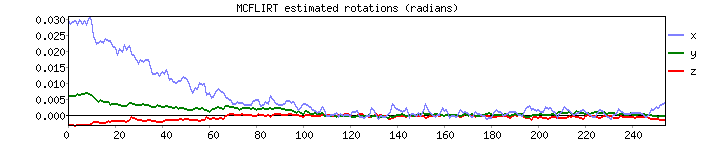

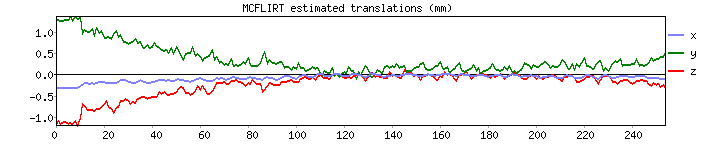

Processing: sub-04/ses-02/run-05


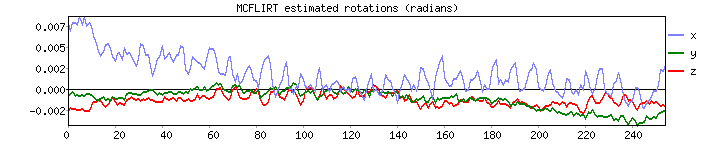

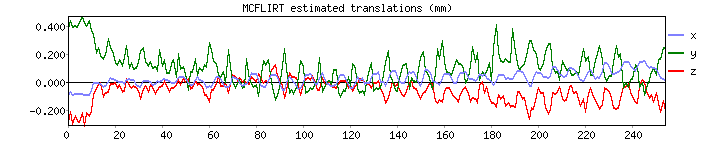

Processing: sub-05/ses-02/run-01


/tmp/ipykernel_2265509/550287709.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 4))  # Improve figure sizing


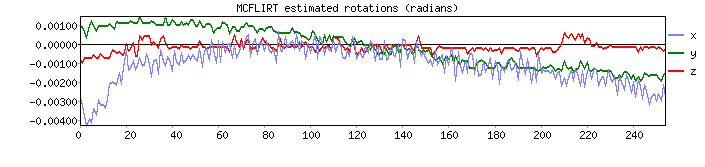

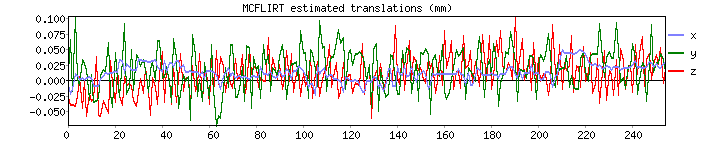

Processing: sub-05/ses-02/run-02


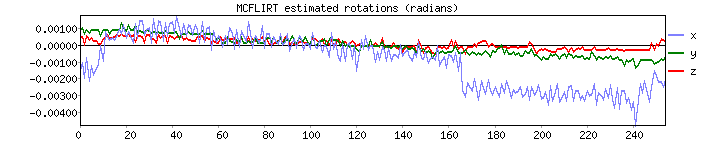

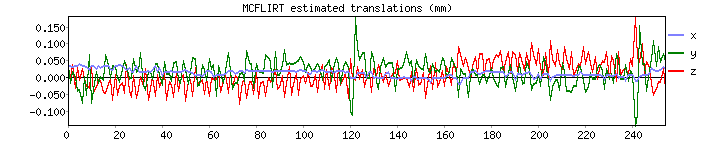

Processing: sub-05/ses-02/run-03


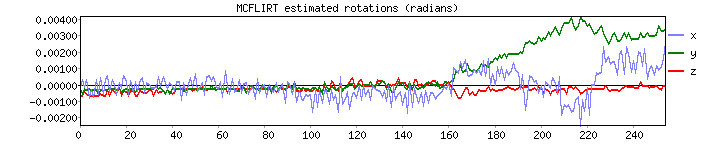

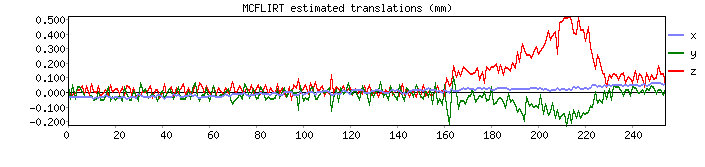

Processing: sub-05/ses-02/run-04


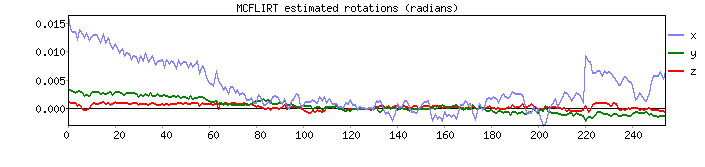

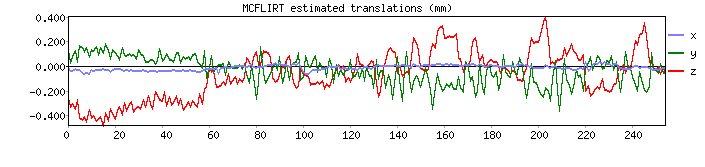

Processing: sub-05/ses-02/run-05


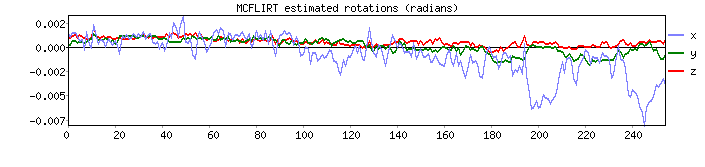

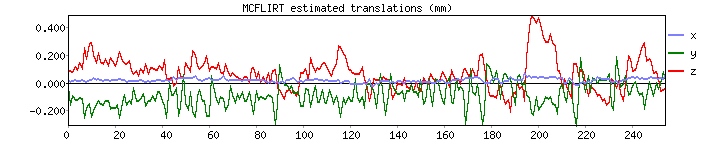

Processing: sub-06/ses-02/run-01


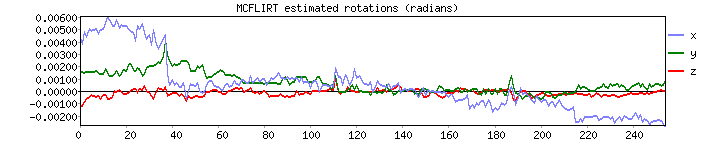

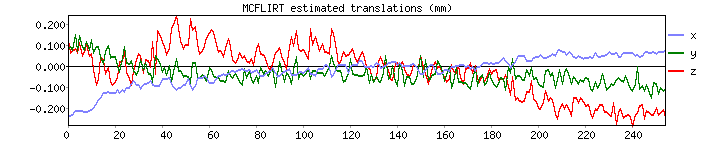

Processing: sub-06/ses-02/run-02


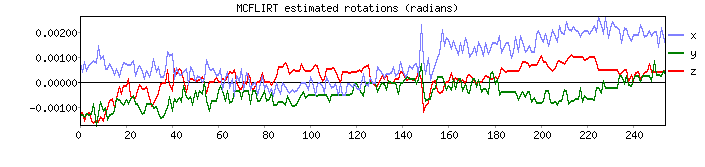

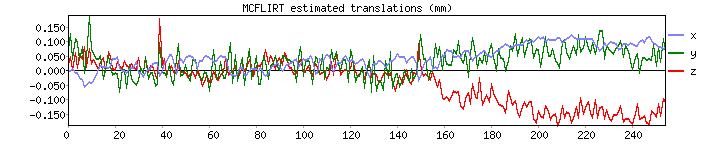

Processing: sub-06/ses-02/run-03


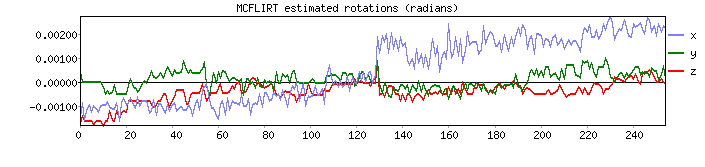

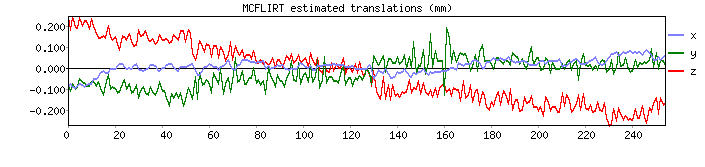

Processing: sub-06/ses-02/run-04


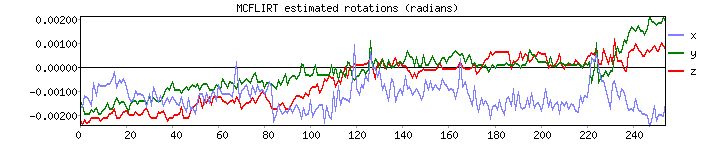

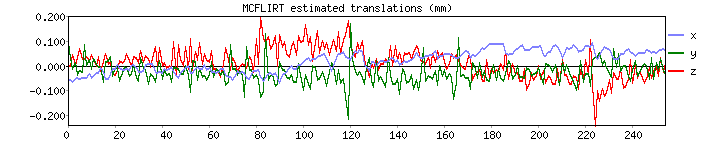

Processing: sub-06/ses-02/run-05


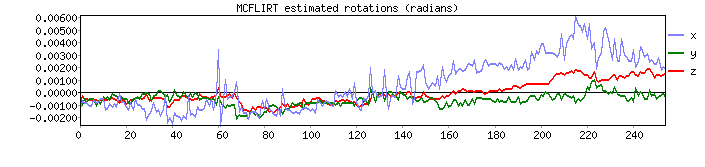

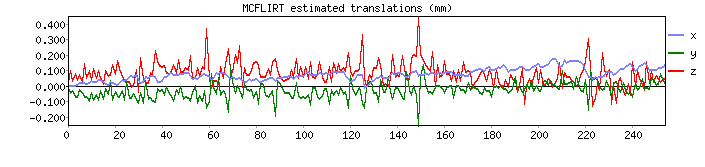

Processing: sub-07/ses-02/run-01


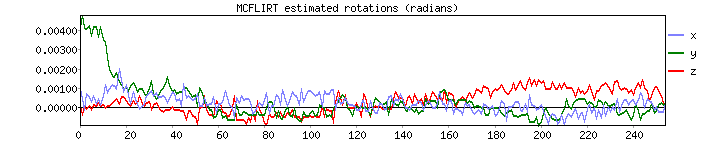

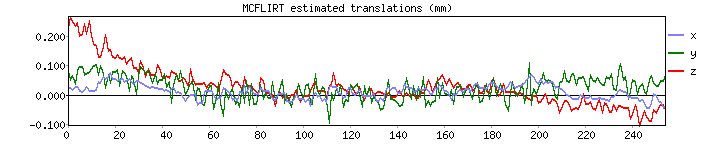

Processing: sub-07/ses-02/run-02


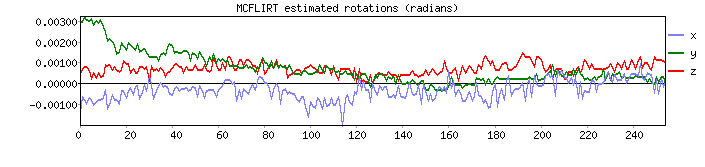

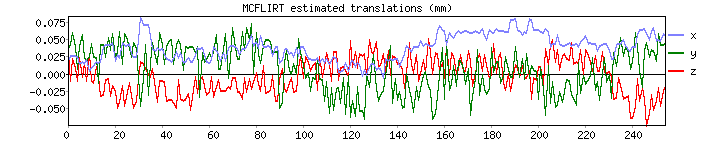

Processing: sub-07/ses-02/run-03


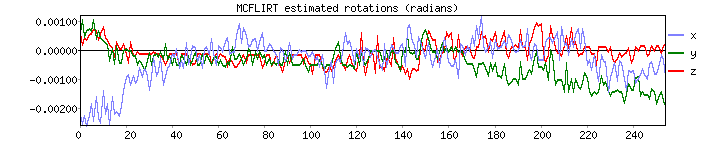

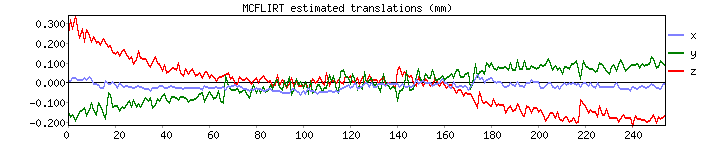

Processing: sub-07/ses-02/run-04


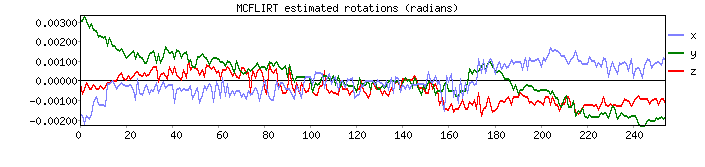

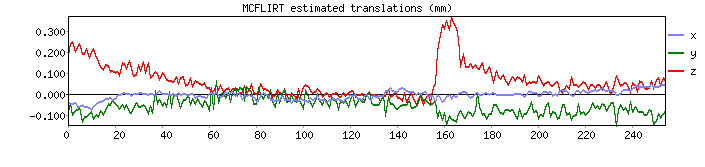

Processing: sub-07/ses-02/run-05


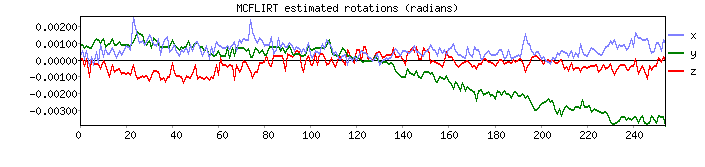

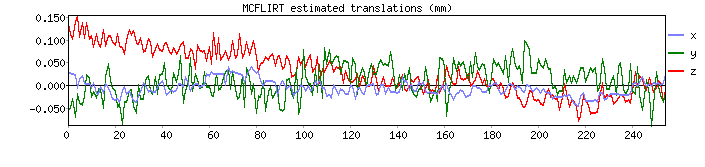

Processing: sub-08/ses-02/run-01


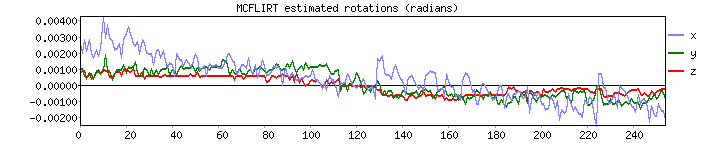

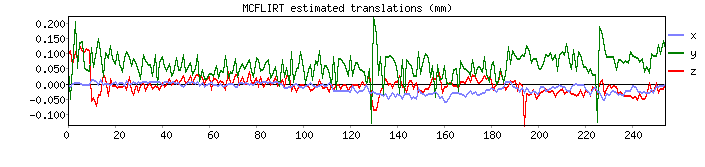

Processing: sub-08/ses-02/run-02


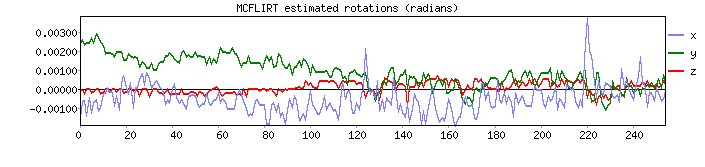

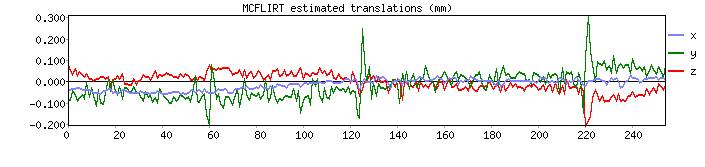

Processing: sub-08/ses-02/run-03


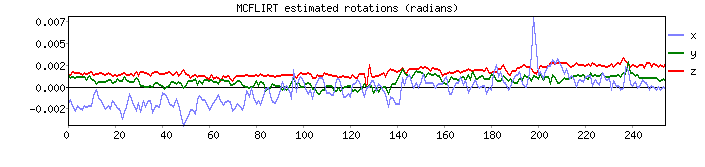

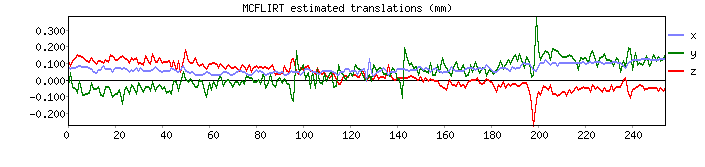

Processing: sub-08/ses-02/run-04


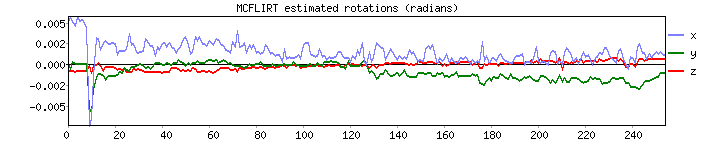

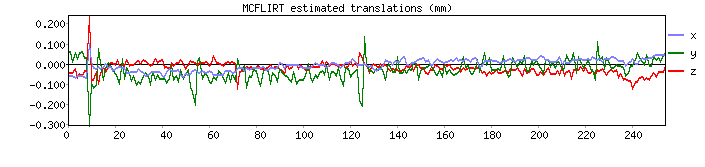

Processing: sub-08/ses-02/run-05


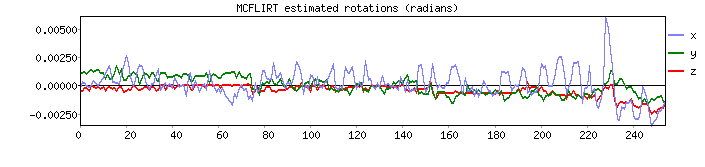

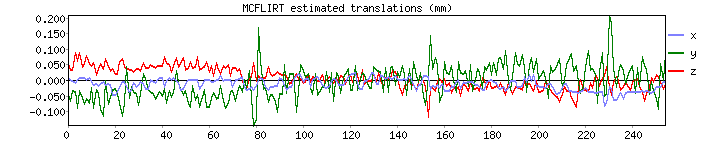

Processing: sub-09/ses-02/run-01


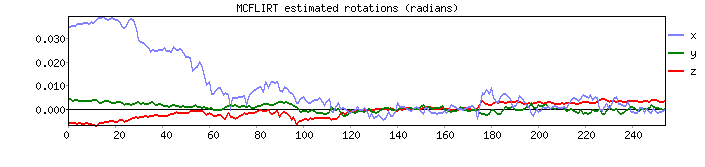

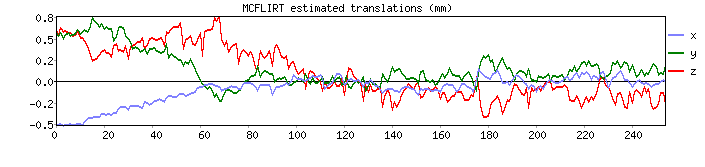

Processing: sub-09/ses-02/run-02


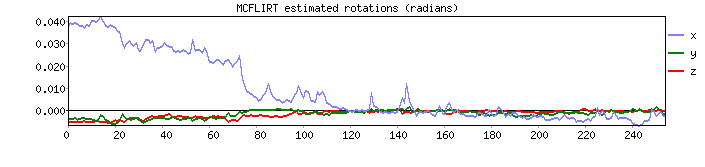

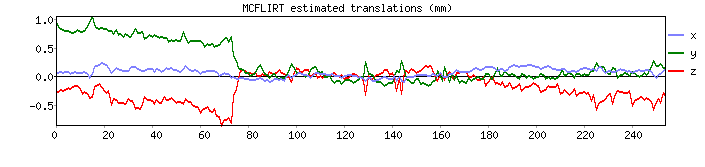

Processing: sub-09/ses-02/run-03


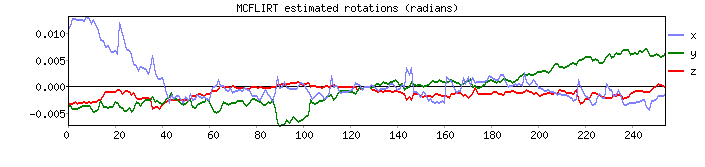

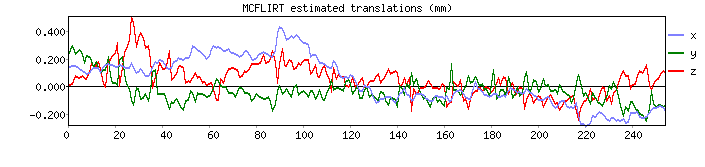

Processing: sub-09/ses-02/run-04


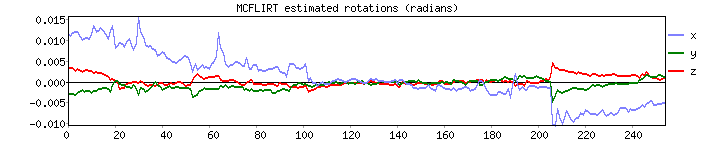

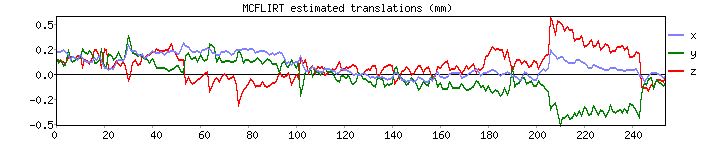

Processing: sub-09/ses-02/run-05


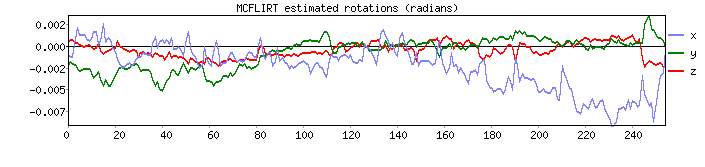

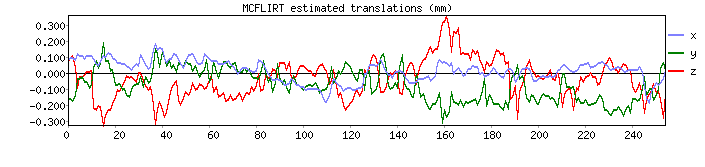

Processing: sub-10/ses-02/run-01


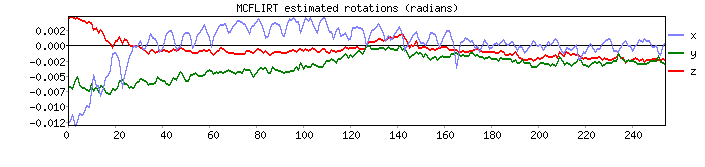

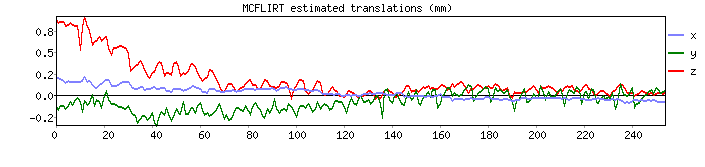

Processing: sub-10/ses-02/run-02


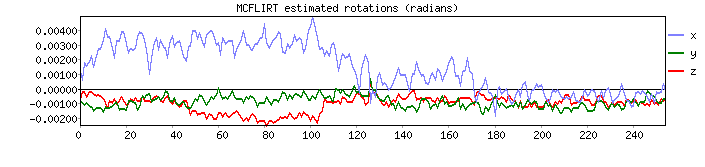

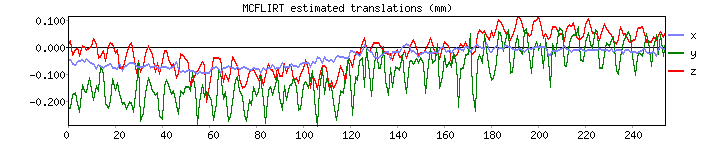

Processing: sub-10/ses-02/run-03


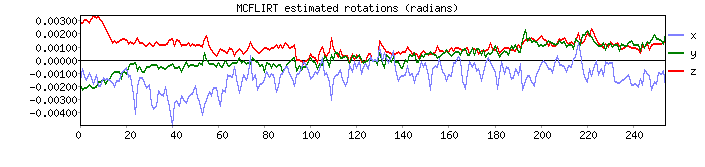

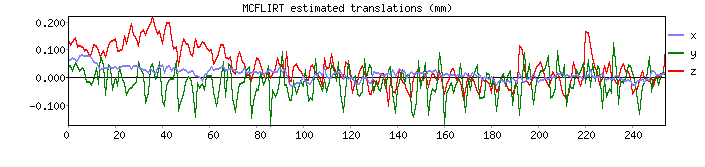

Processing: sub-10/ses-02/run-04


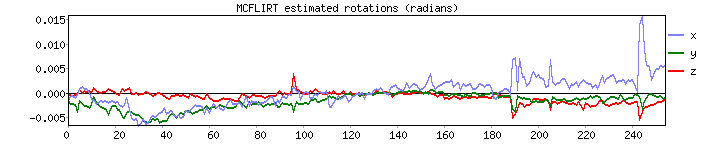

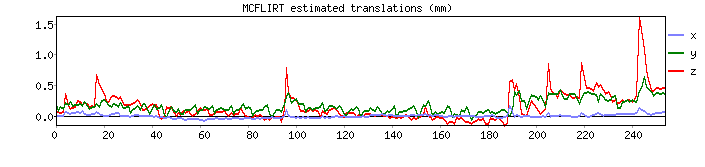

Processing: sub-10/ses-02/run-05


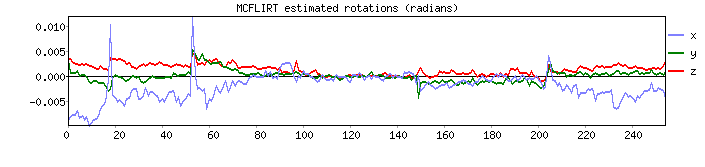

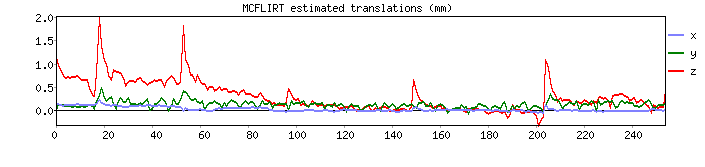

Processing: sub-11/ses-02/run-01


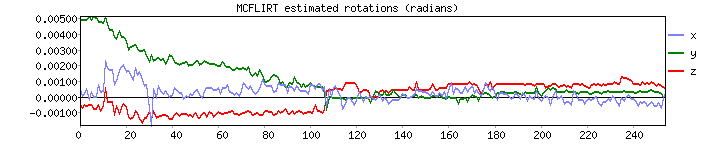

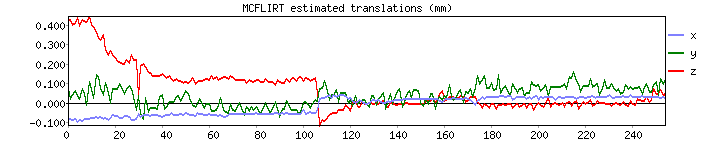

Processing: sub-11/ses-02/run-02


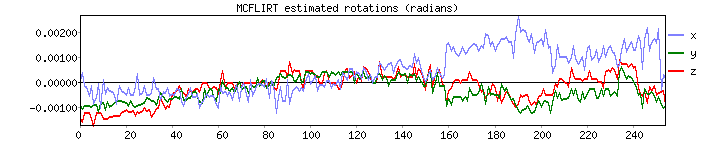

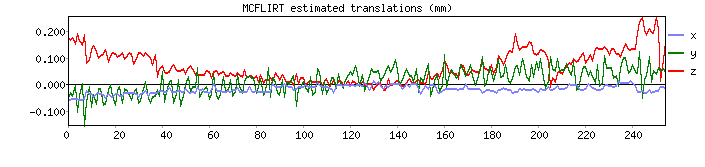

Processing: sub-11/ses-02/run-03


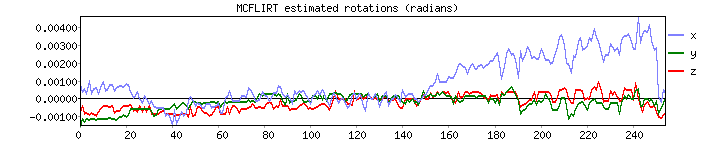

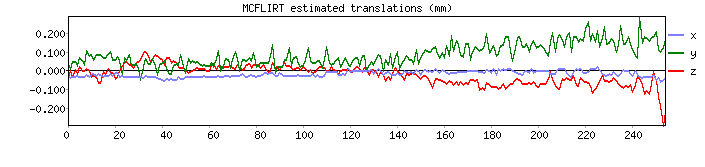

Processing: sub-11/ses-02/run-04


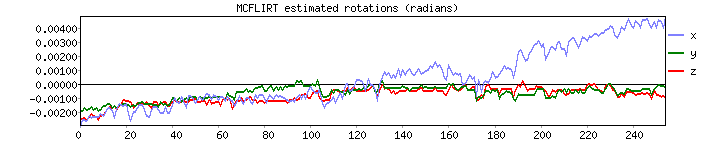

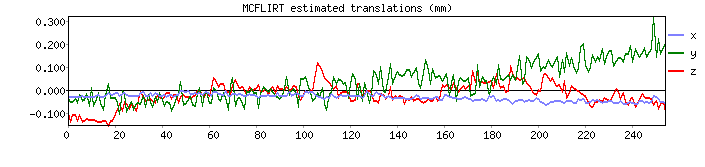

Processing: sub-11/ses-02/run-05


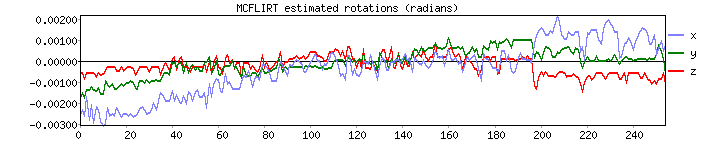

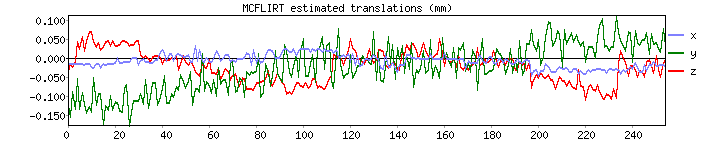

Processing: sub-12/ses-02/run-01


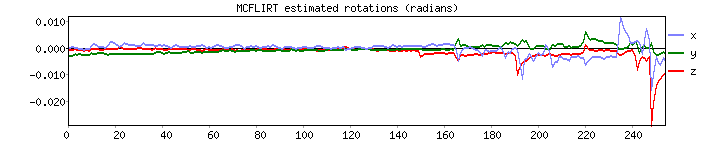

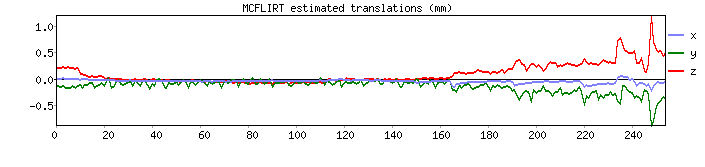

Processing: sub-12/ses-02/run-02


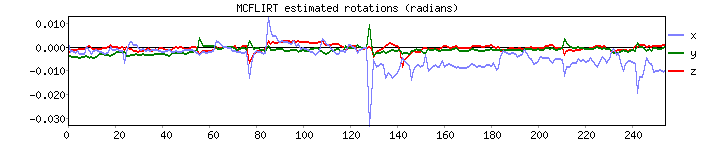

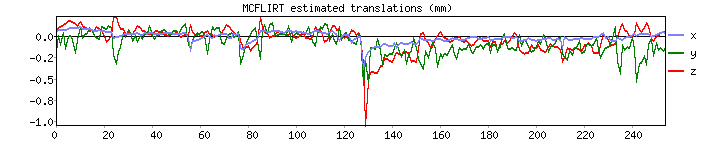

Processing: sub-12/ses-02/run-03


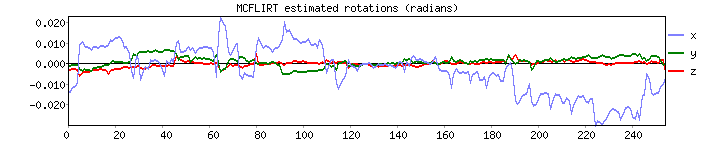

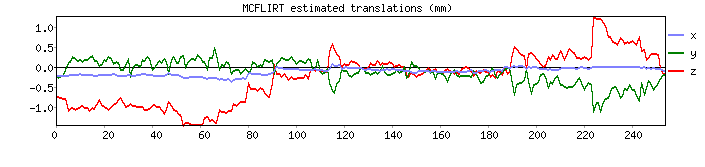

Processing: sub-12/ses-02/run-04


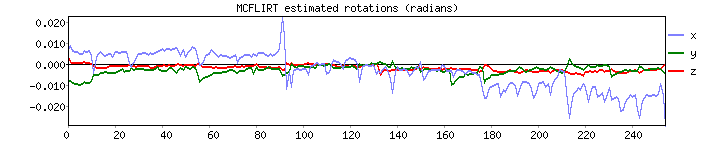

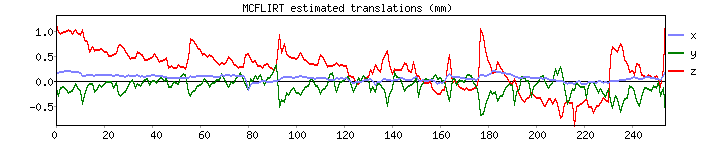

Processing: sub-12/ses-02/run-05


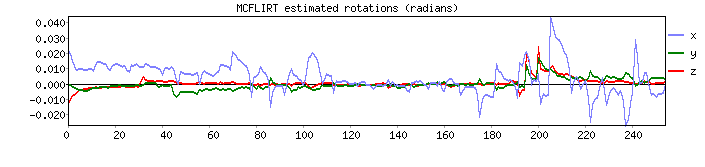

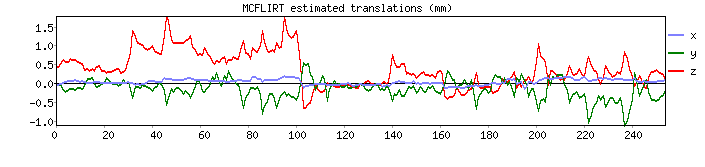

Processing: sub-13/ses-02/run-01


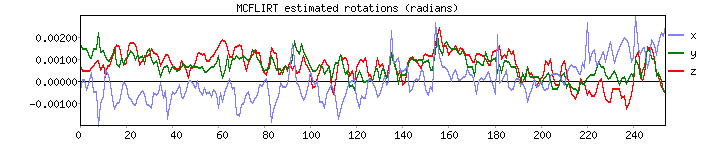

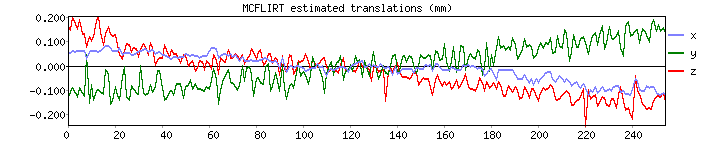

Processing: sub-13/ses-02/run-02


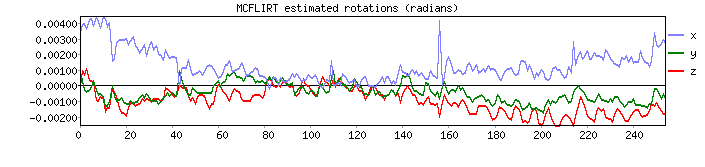

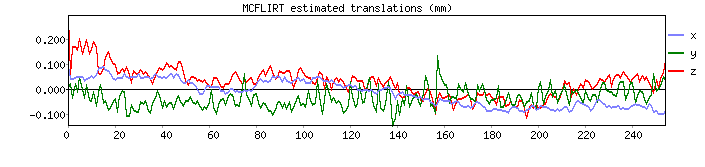

Processing: sub-13/ses-02/run-03


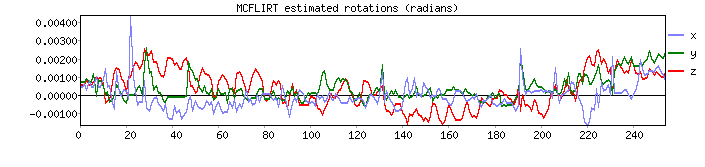

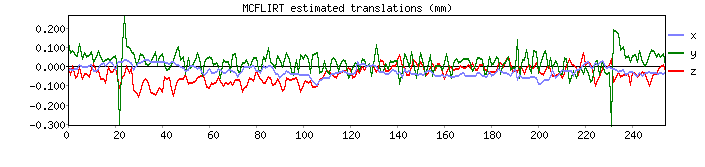

Processing: sub-13/ses-02/run-04


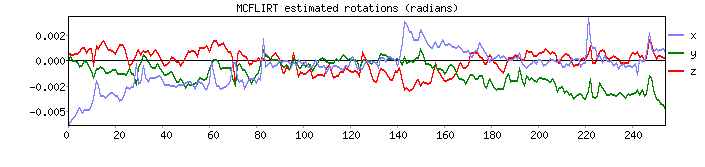

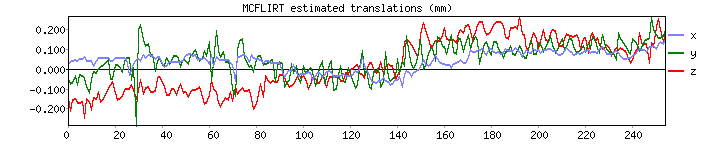

Processing: sub-13/ses-02/run-05


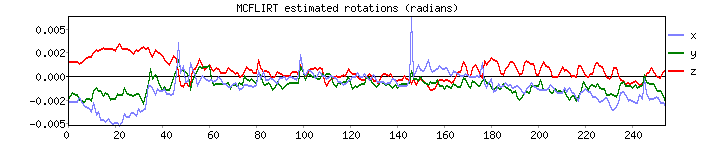

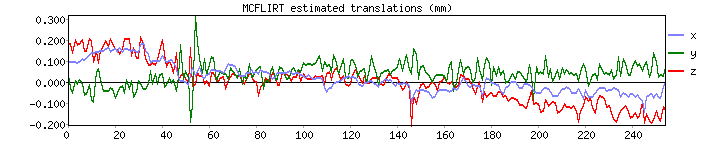

Processing: sub-14/ses-02/run-01


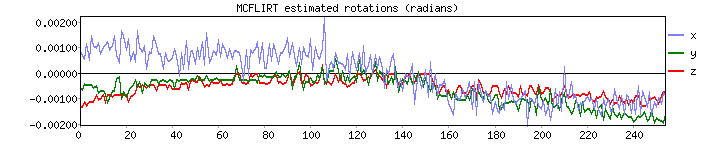

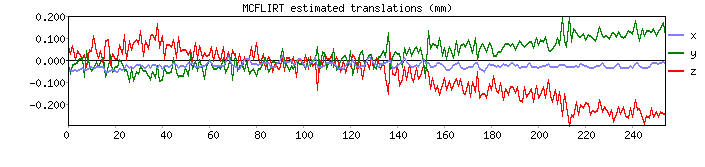

Processing: sub-14/ses-02/run-02


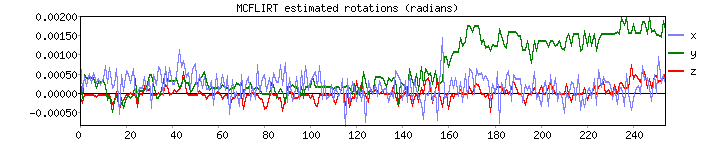

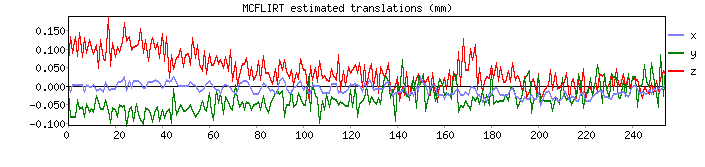

Processing: sub-14/ses-02/run-03


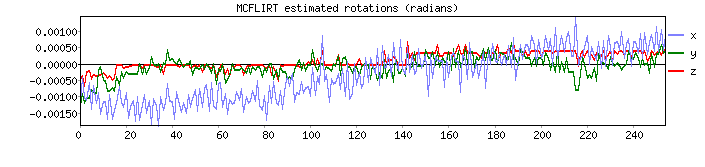

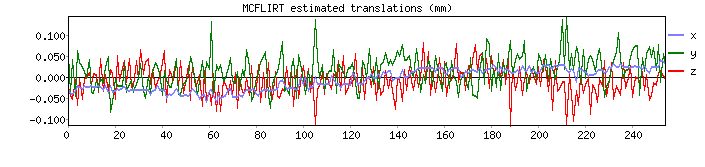

Processing: sub-14/ses-02/run-04


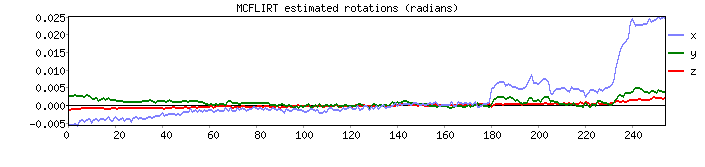

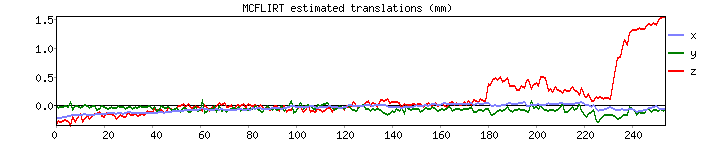

Processing: sub-14/ses-02/run-05


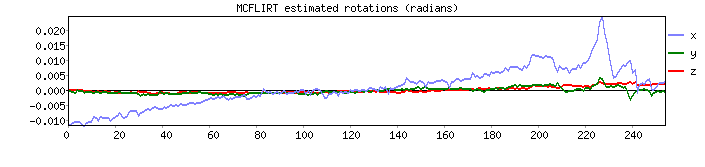

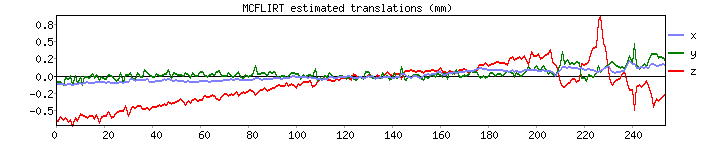

Processing: sub-15/ses-02/run-01


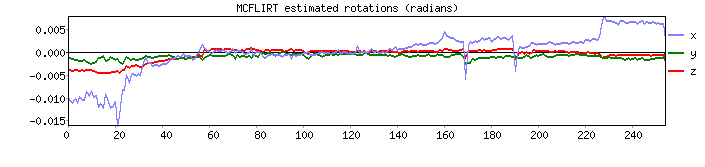

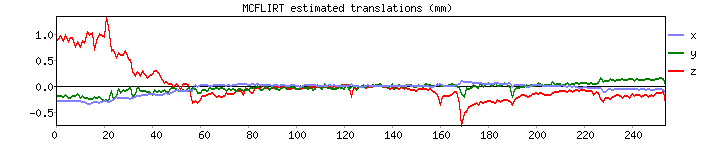

Processing: sub-15/ses-02/run-02


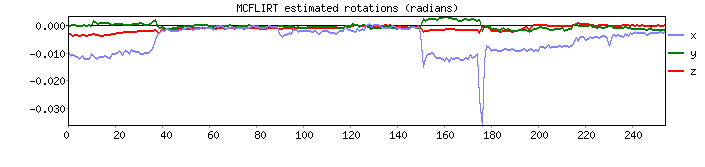

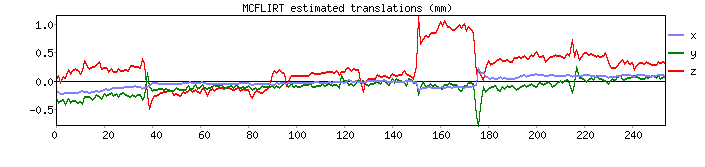

Processing: sub-15/ses-02/run-03


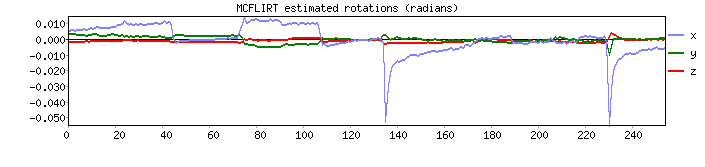

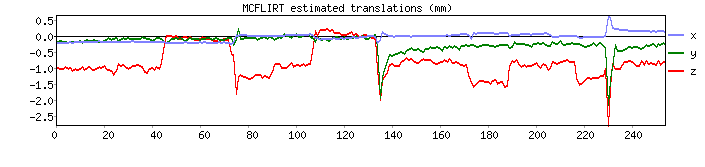

Processing: sub-15/ses-02/run-04


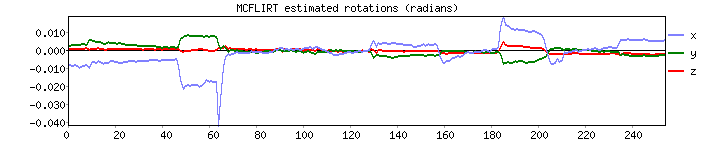

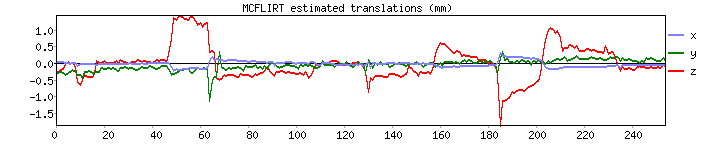

Processing: sub-15/ses-02/run-05


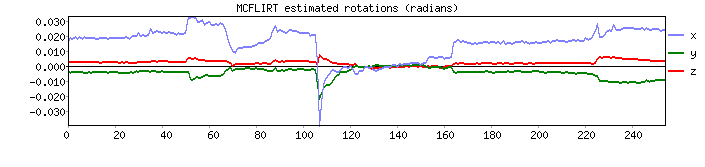

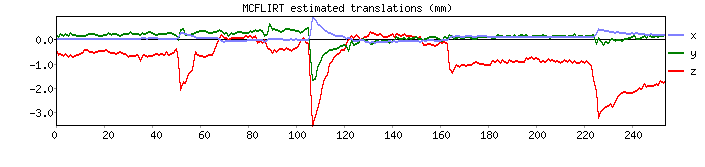

Processing: sub-16/ses-02/run-01


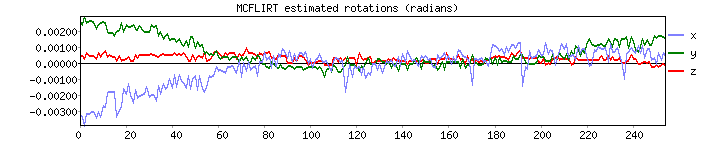

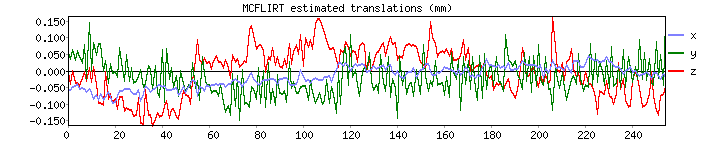

Processing: sub-16/ses-02/run-02


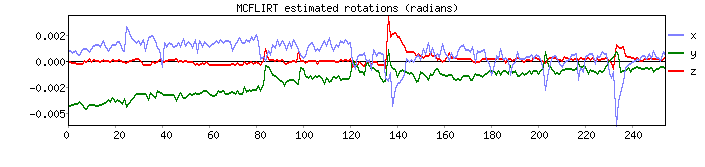

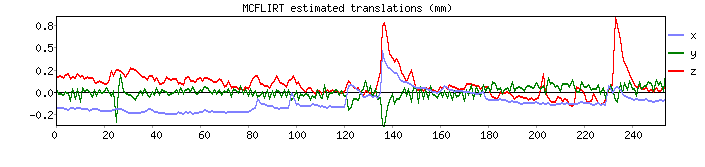

Processing: sub-16/ses-02/run-03


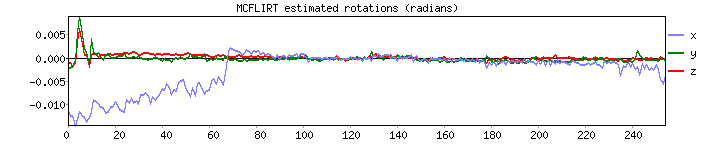

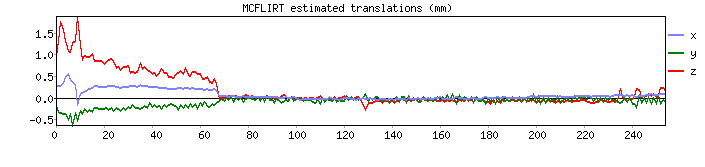

Processing: sub-16/ses-02/run-04


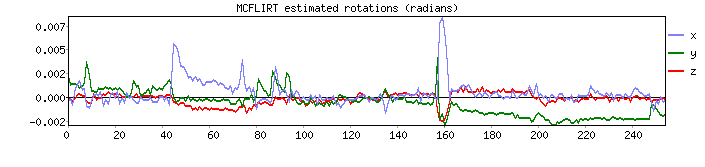

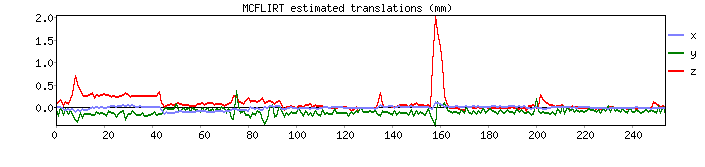

Processing: sub-16/ses-02/run-05


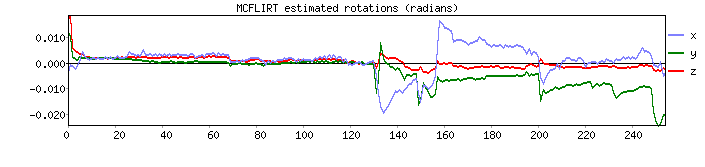

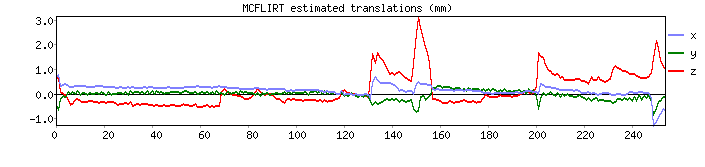

Processing: sub-17/ses-02/run-01


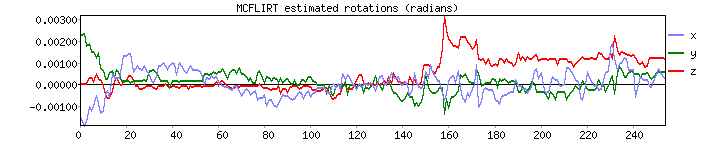

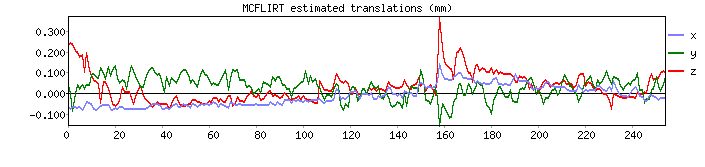

Processing: sub-17/ses-02/run-02


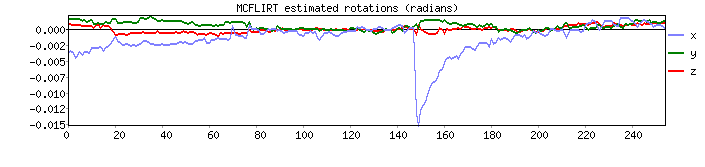

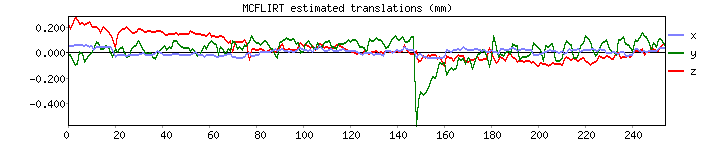

Processing: sub-17/ses-02/run-03


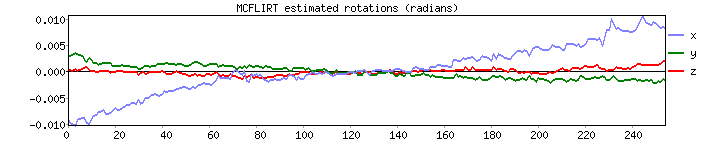

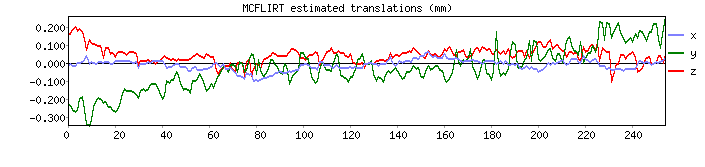

Processing: sub-17/ses-02/run-04


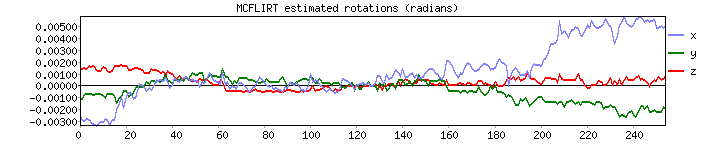

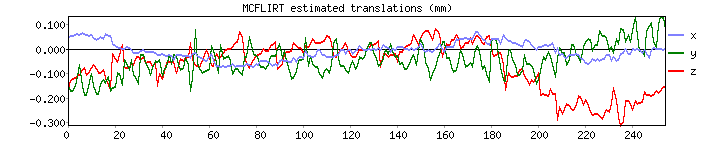

Processing: sub-17/ses-02/run-05


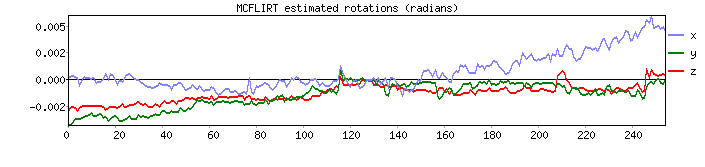

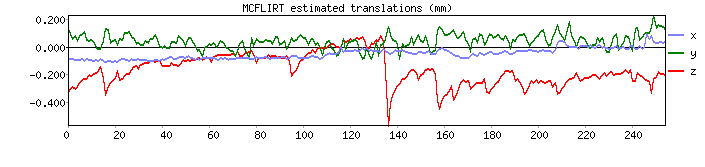

Processing: sub-18/ses-02/run-01


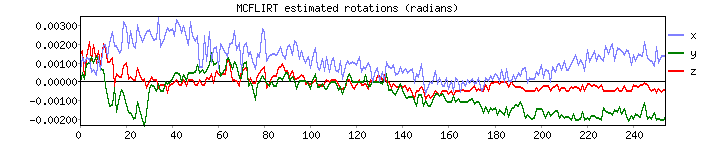

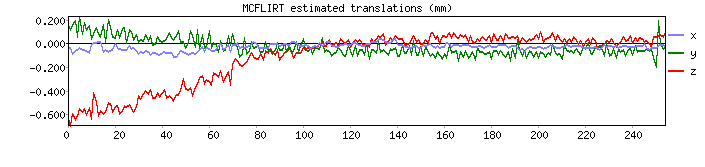

Processing: sub-18/ses-02/run-02


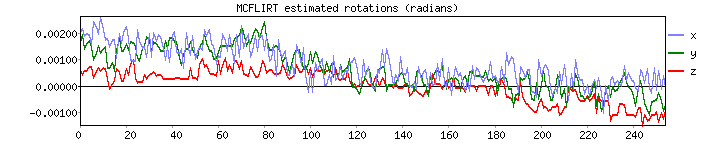

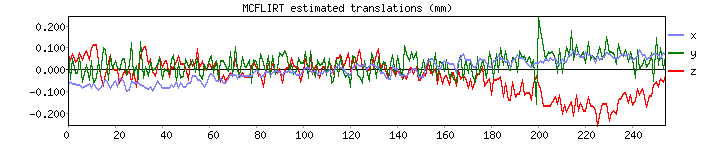

Processing: sub-18/ses-02/run-03


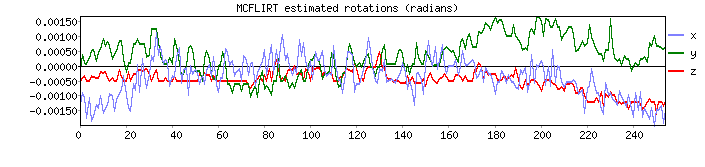

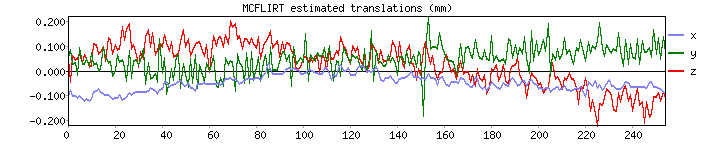

Processing: sub-18/ses-02/run-04


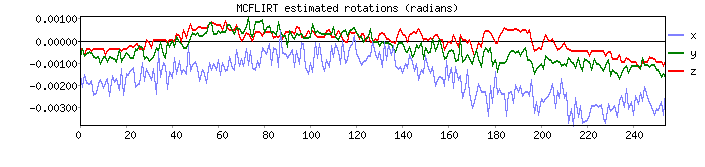

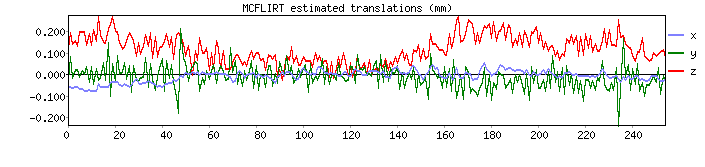

Processing: sub-18/ses-02/run-05


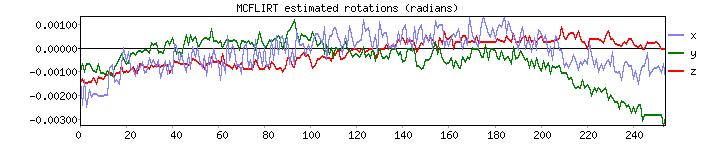

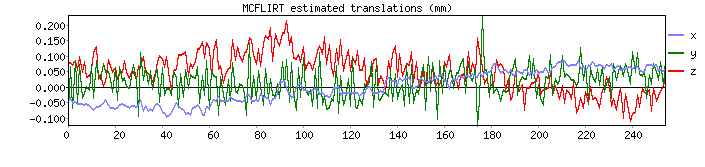

Processing: sub-19/ses-02/run-01


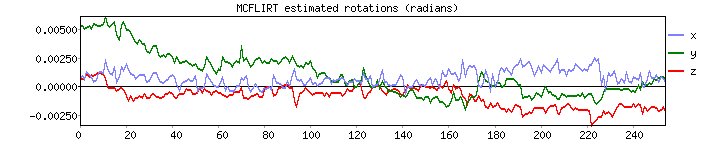

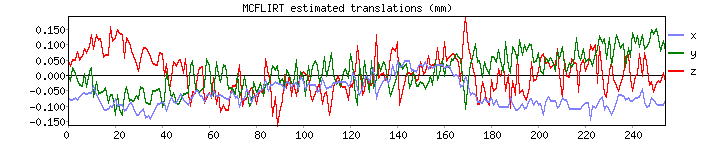

Processing: sub-19/ses-02/run-02


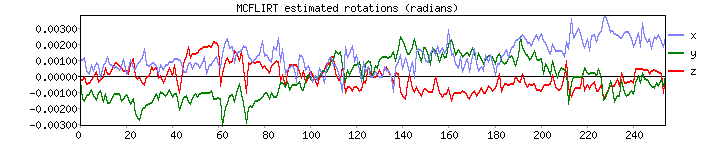

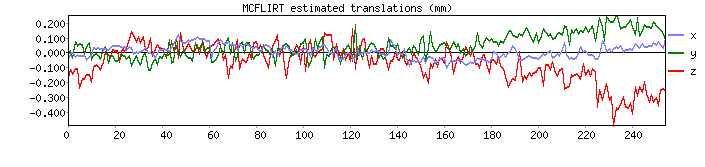

Processing: sub-19/ses-02/run-03


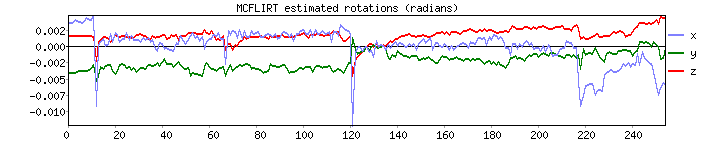

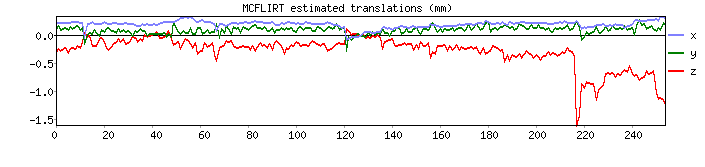

Processing: sub-19/ses-02/run-04


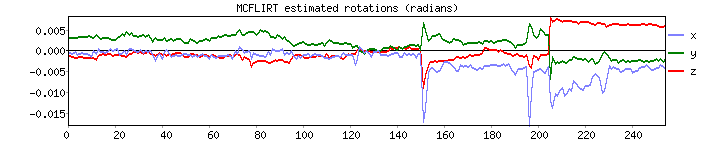

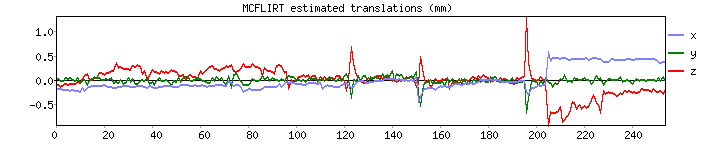

Processing: sub-19/ses-02/run-05


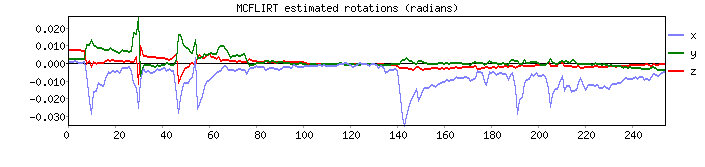

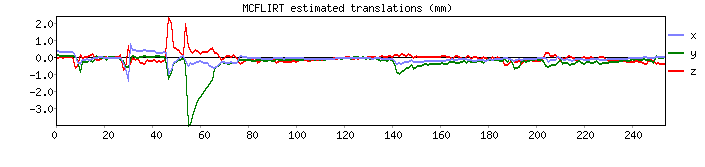

Processing: sub-20/ses-02/run-01


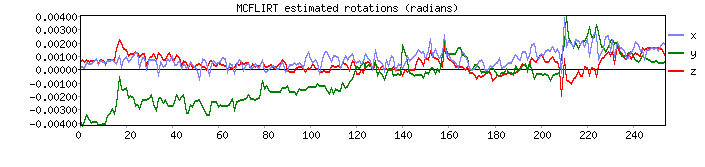

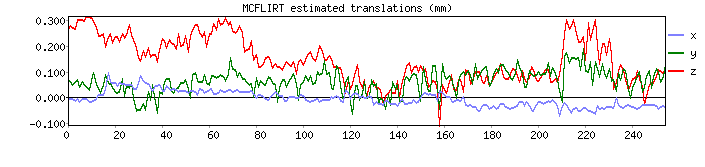

Processing: sub-20/ses-02/run-02


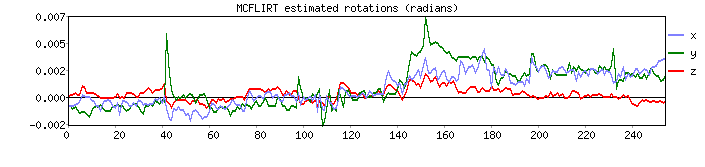

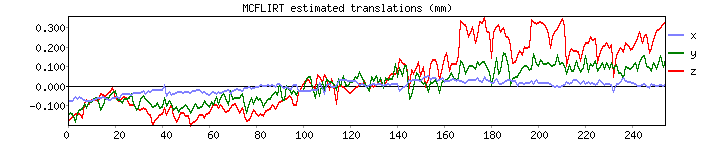

Processing: sub-20/ses-02/run-03


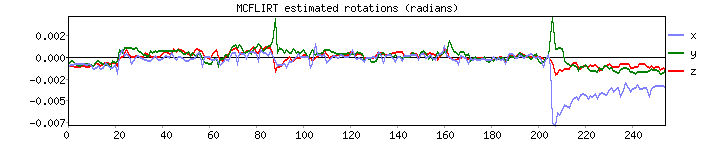

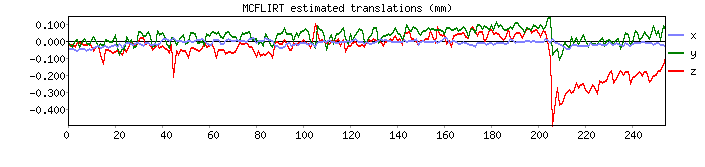

Processing: sub-20/ses-02/run-04


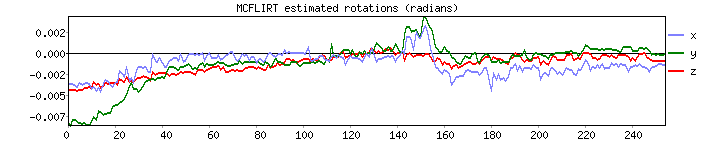

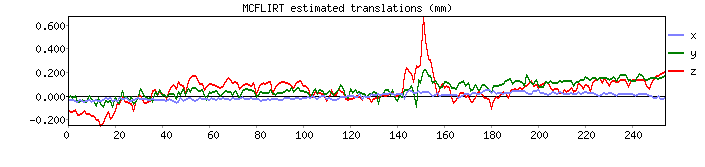

Processing: sub-20/ses-02/run-05


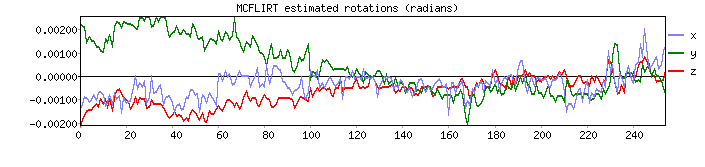

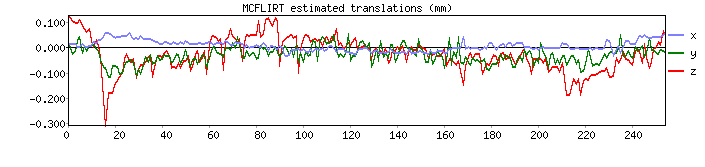

Processing: sub-21/ses-02/run-01


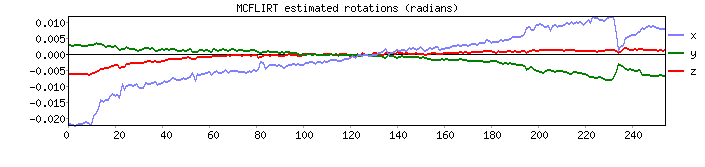

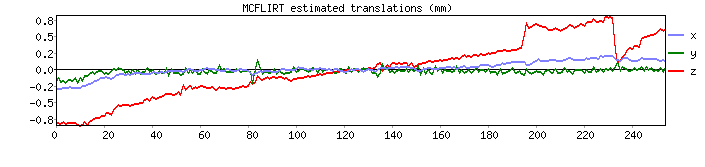

Processing: sub-21/ses-02/run-02


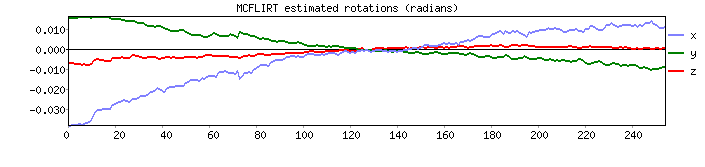

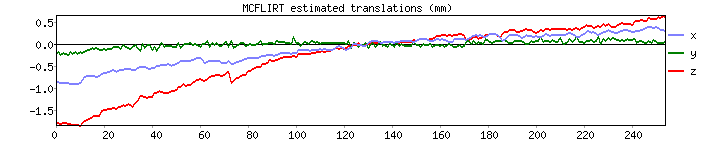

Processing: sub-21/ses-02/run-03


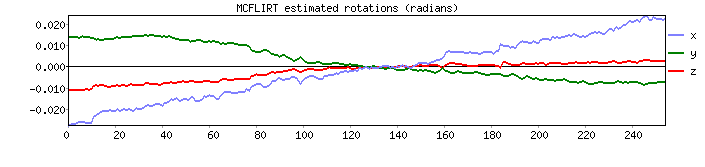

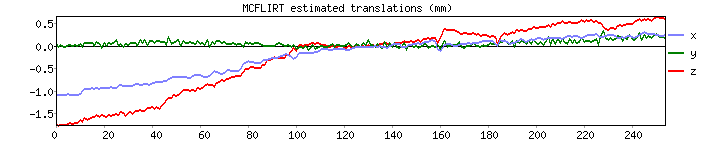

Processing: sub-21/ses-02/run-04


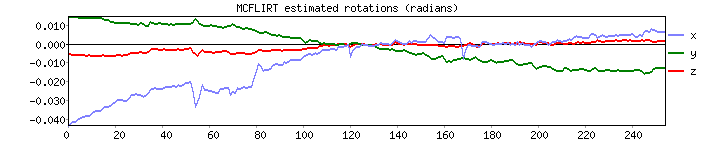

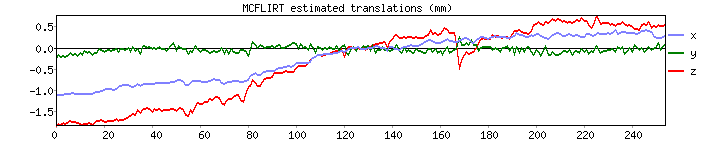

Processing: sub-21/ses-02/run-05


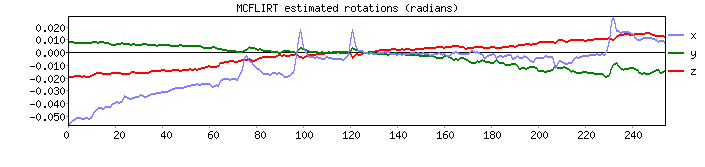

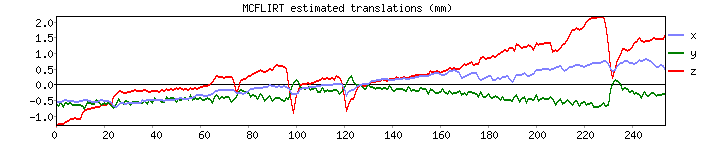

Processing: sub-22/ses-02/run-01


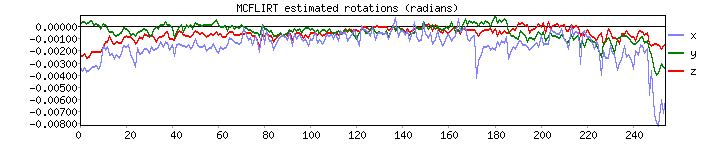

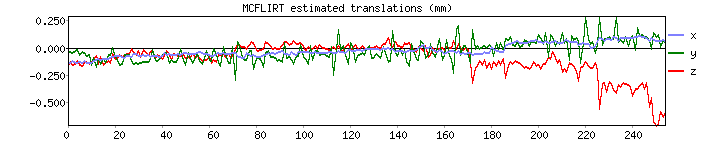

Processing: sub-22/ses-02/run-02


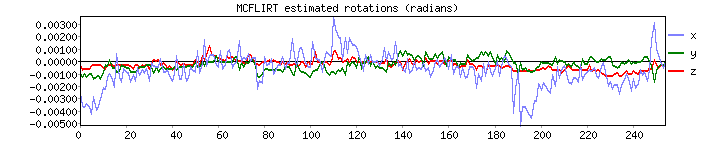

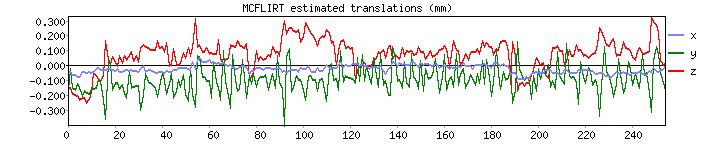

Processing: sub-22/ses-02/run-03


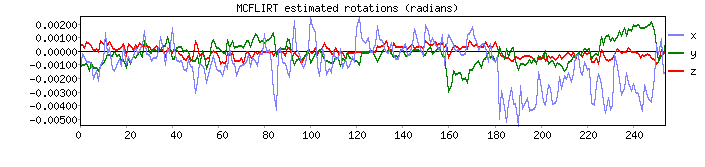

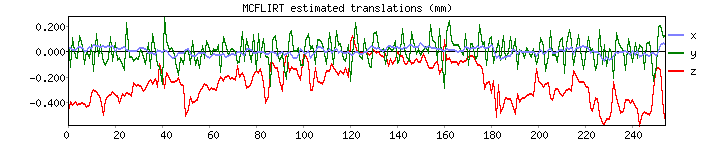

Processing: sub-22/ses-02/run-04


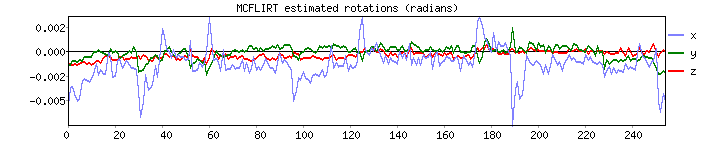

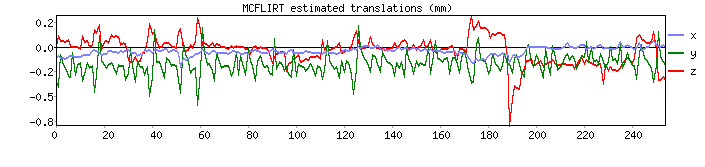

Processing: sub-22/ses-02/run-05


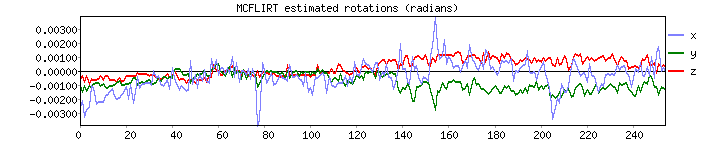

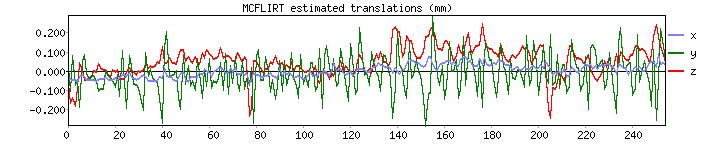

Processing: sub-23/ses-02/run-01


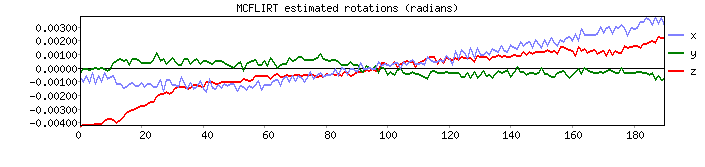

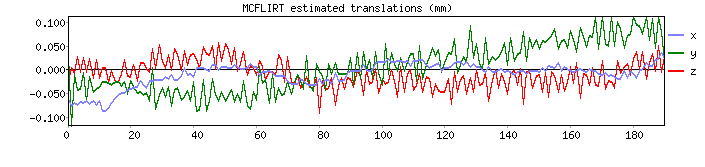

Processing: sub-23/ses-02/run-02


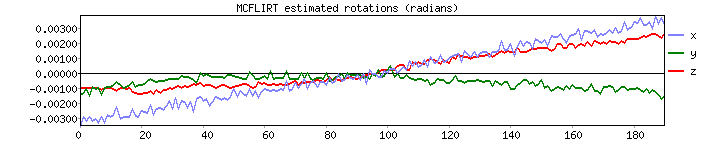

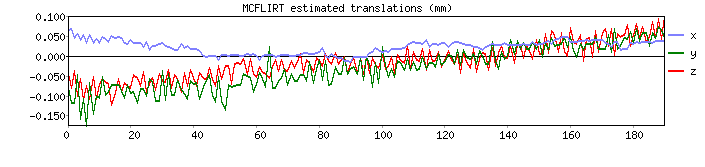

Processing: sub-23/ses-02/run-03


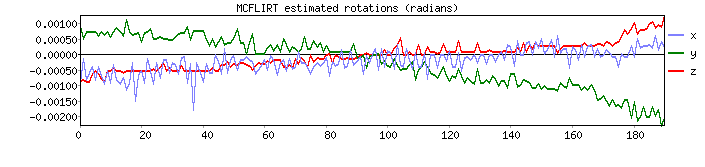

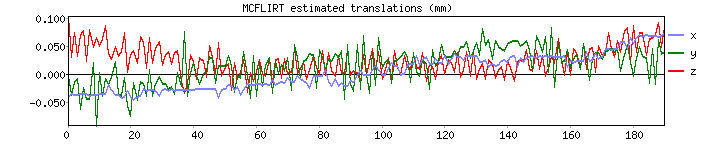

Processing: sub-23/ses-02/run-04


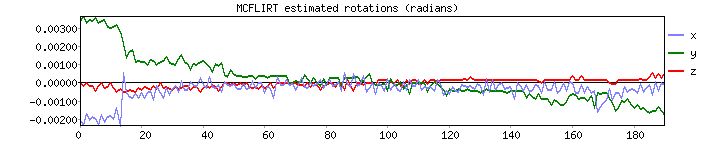

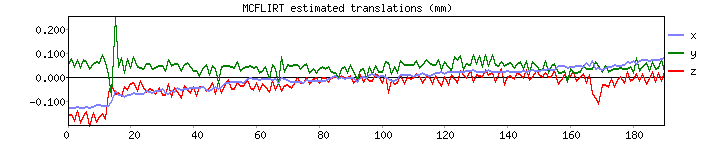

Processing: sub-23/ses-02/run-05


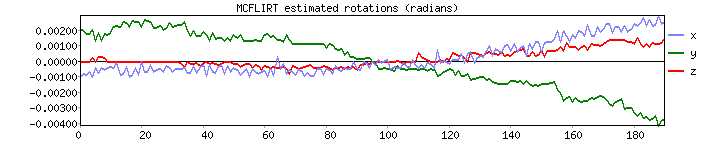

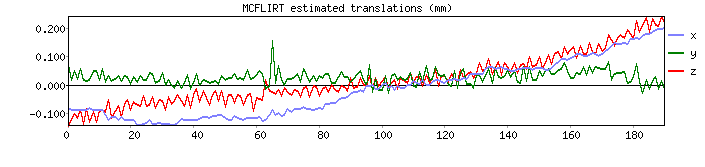

Processing: sub-24/ses-02/run-01


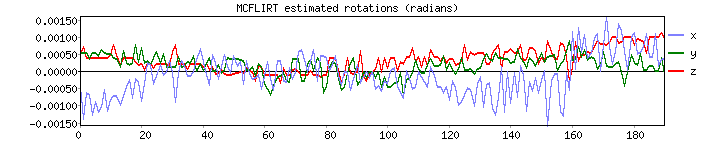

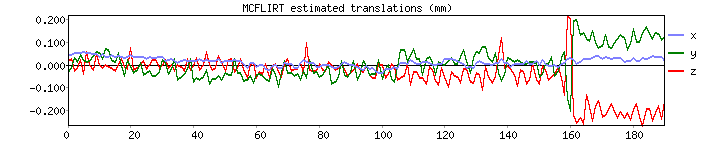

Processing: sub-24/ses-02/run-02


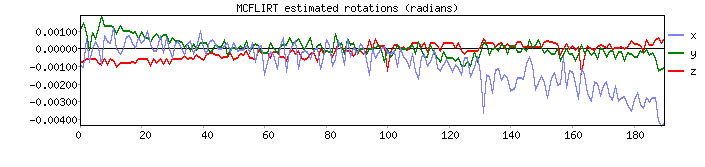

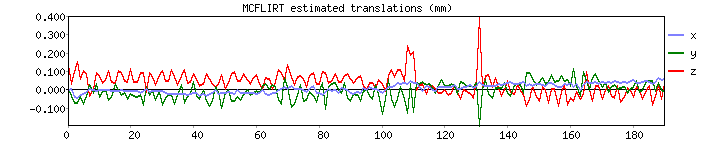

Processing: sub-24/ses-02/run-03


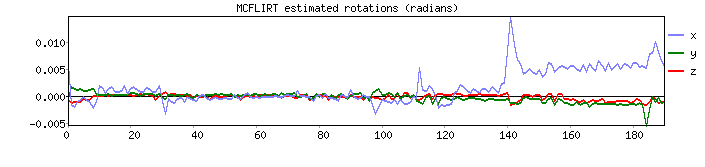

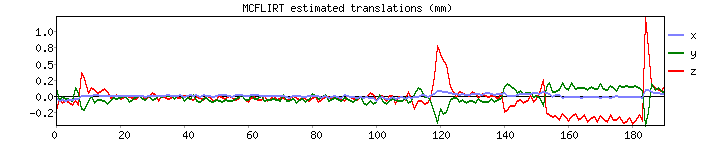

Processing: sub-24/ses-02/run-04


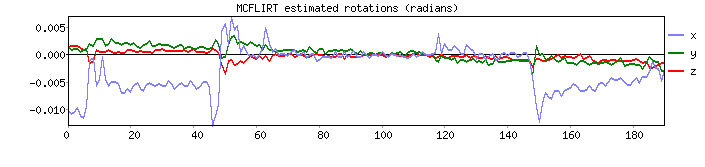

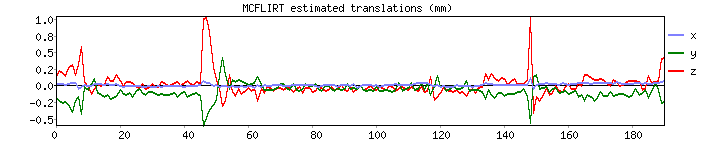

Processing: sub-24/ses-02/run-05


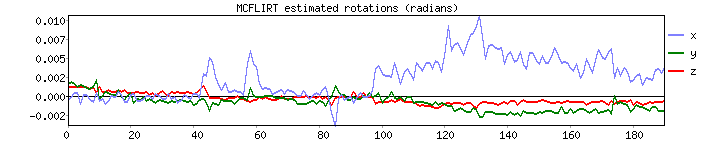

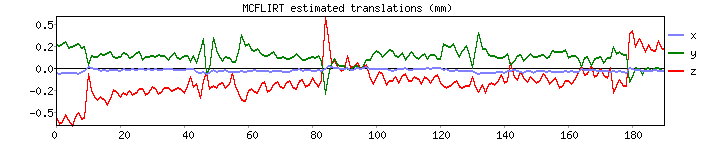

Processing: sub-25/ses-02/run-01


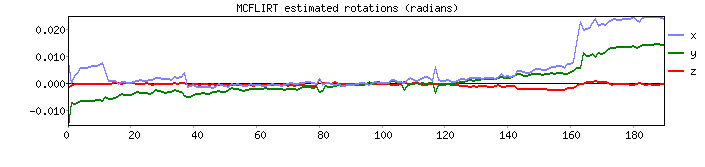

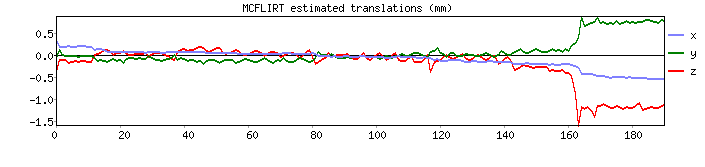

Processing: sub-25/ses-02/run-02


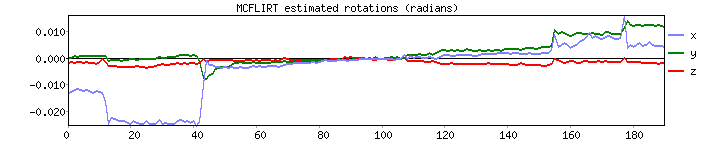

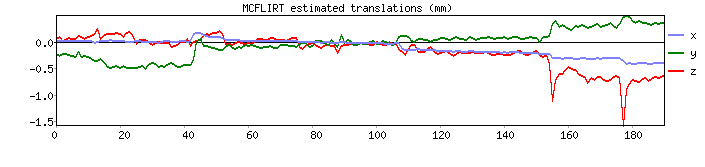

Processing: sub-25/ses-02/run-03


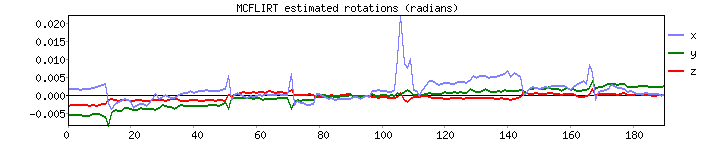

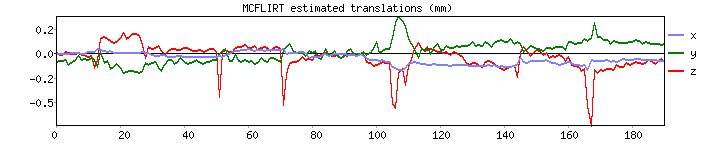

Processing: sub-25/ses-02/run-04


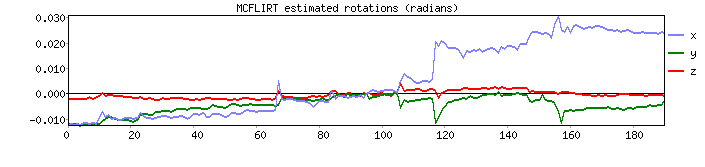

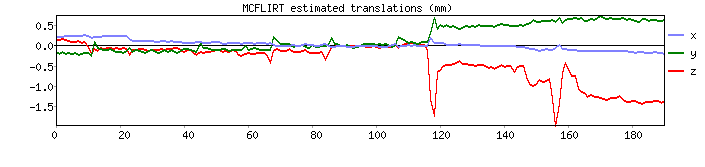

Processing: sub-25/ses-02/run-05


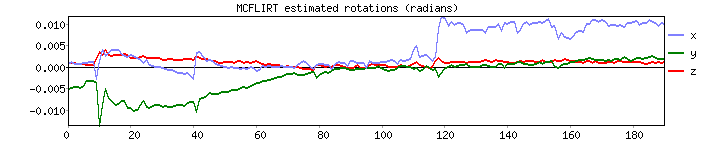

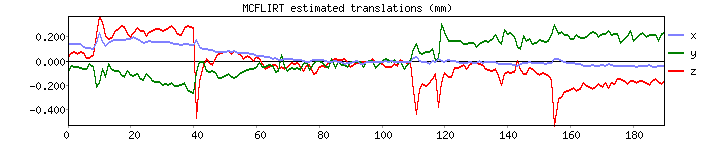

Processing: sub-26/ses-02/run-01


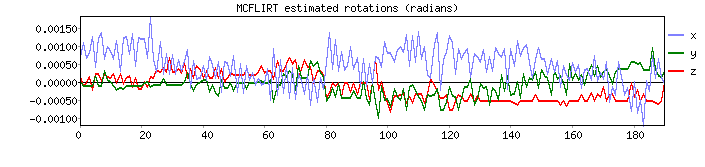

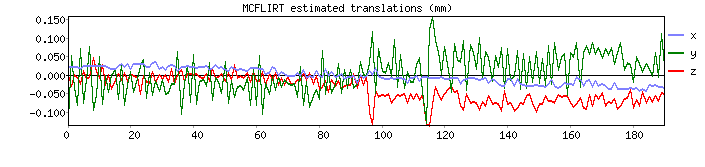

Processing: sub-26/ses-02/run-02


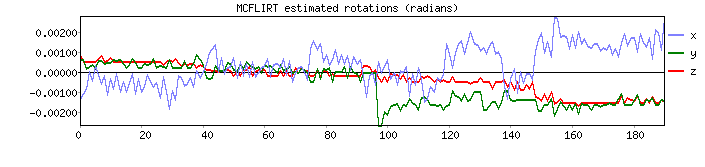

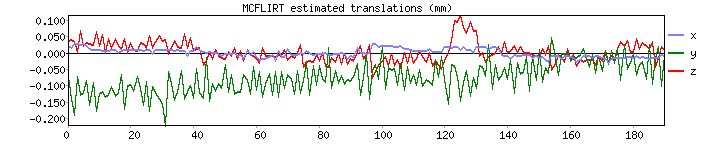

Processing: sub-26/ses-02/run-03


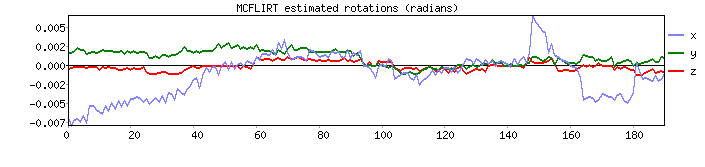

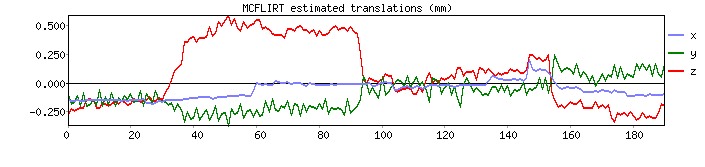

Processing: sub-26/ses-02/run-04


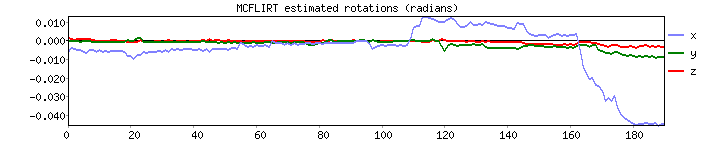

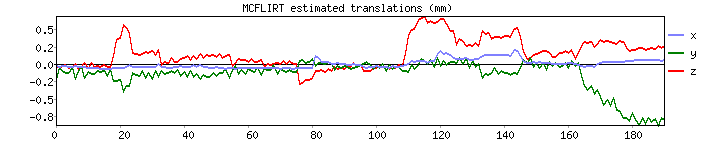

Processing: sub-26/ses-02/run-05


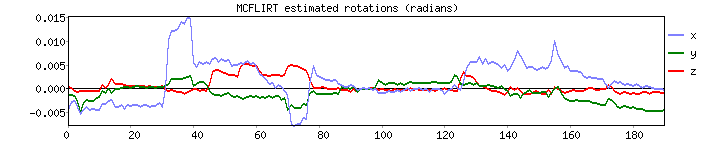

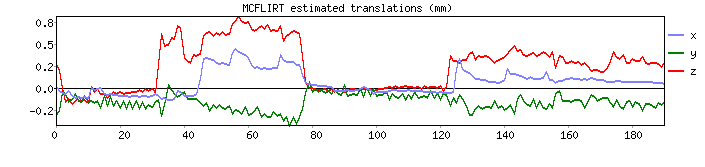

Processing: sub-27/ses-02/run-01


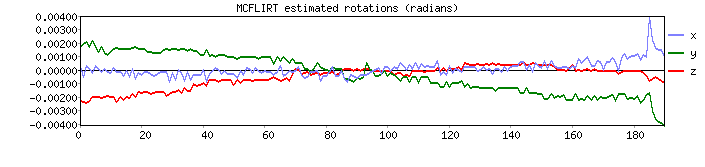

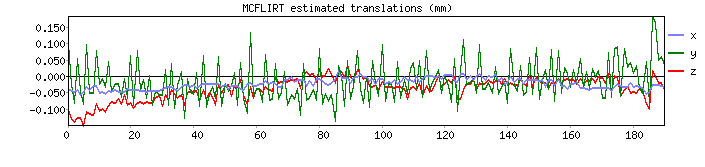

Processing: sub-27/ses-02/run-02


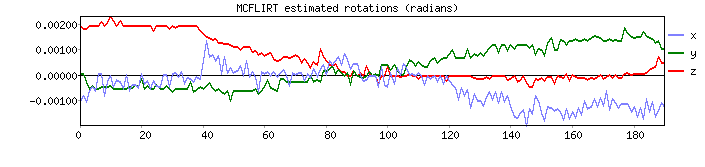

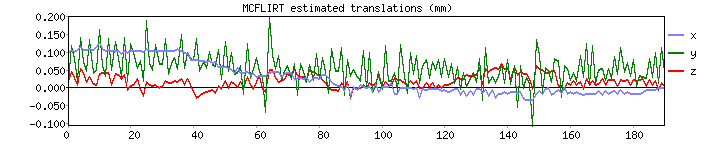

Processing: sub-27/ses-02/run-03


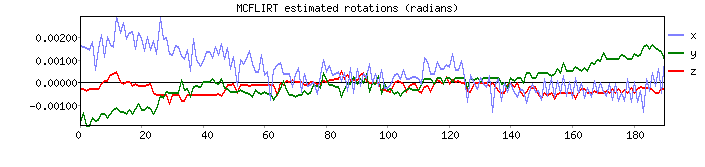

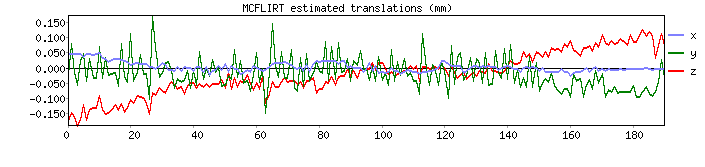

Processing: sub-27/ses-02/run-04


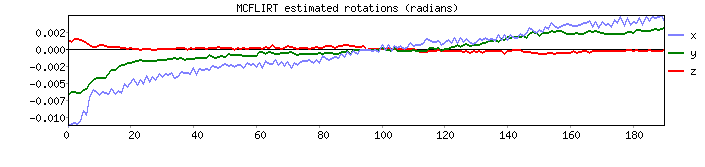

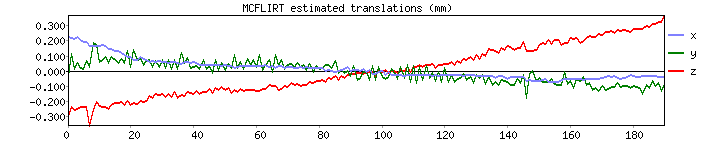

Processing: sub-27/ses-02/run-05


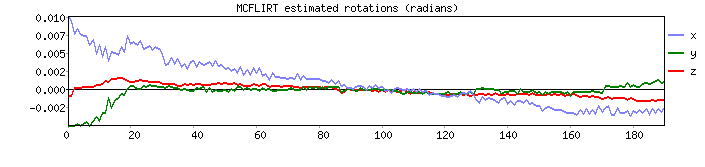

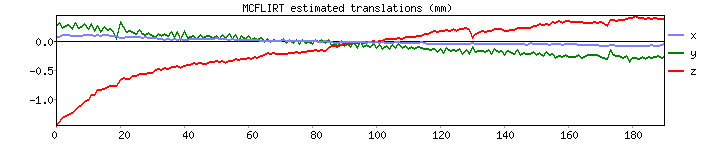

Processing: sub-28/ses-02/run-01


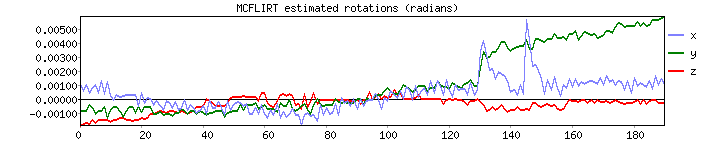

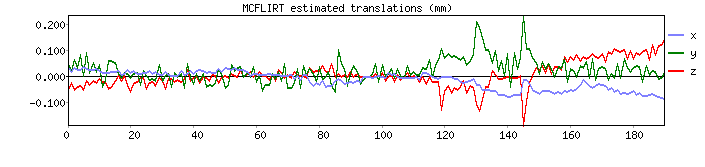

Processing: sub-28/ses-02/run-02


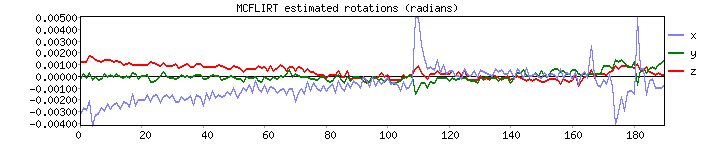

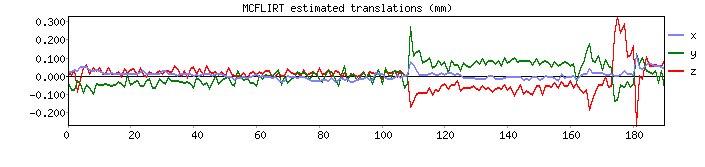

Processing: sub-28/ses-02/run-03


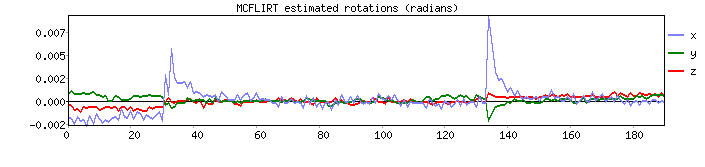

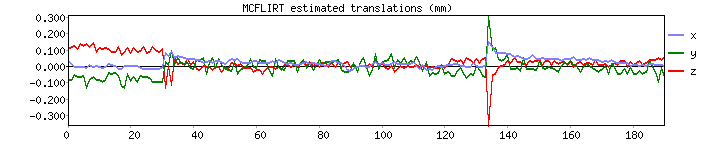

Processing: sub-28/ses-02/run-04


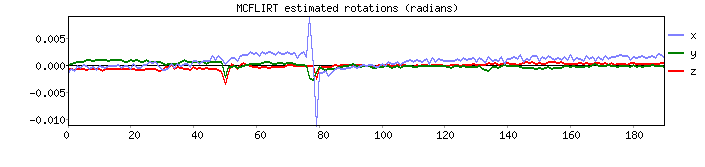

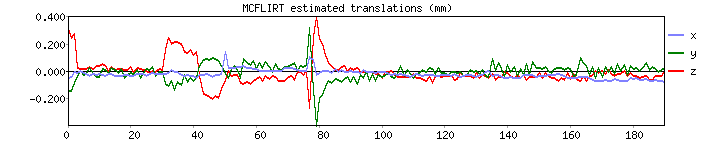

Processing: sub-28/ses-02/run-05


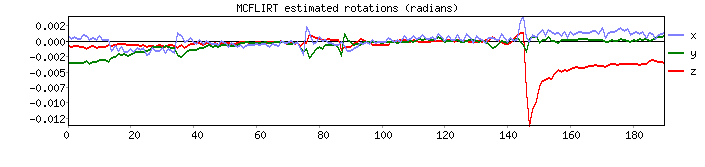

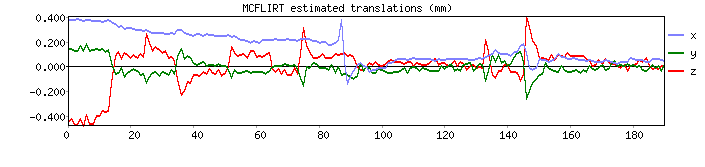

Processing: sub-29/ses-02/run-01


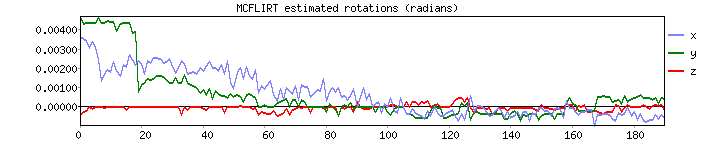

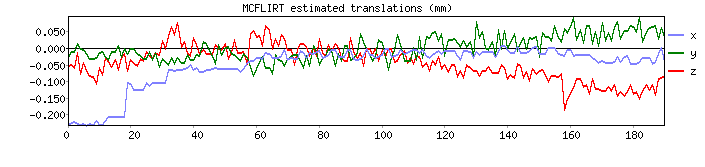

Processing: sub-29/ses-02/run-02


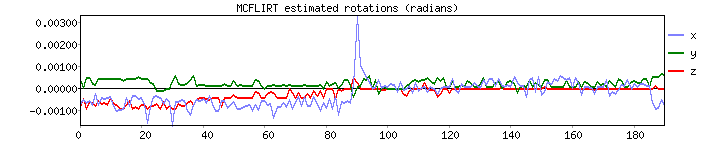

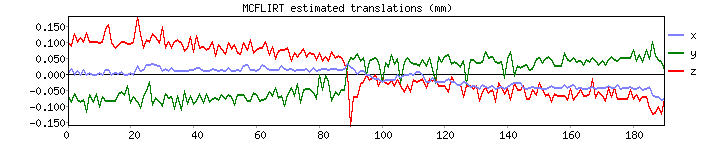

Processing: sub-29/ses-02/run-03


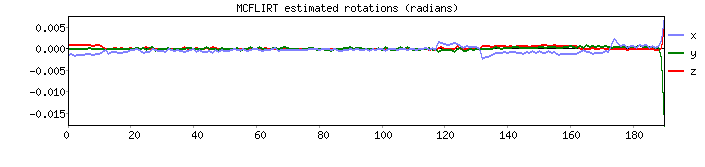

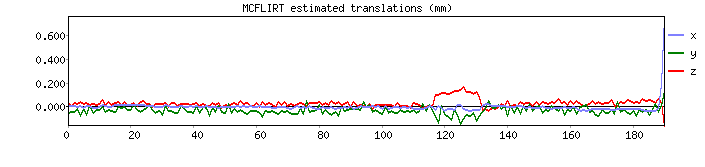

Processing: sub-29/ses-02/run-04


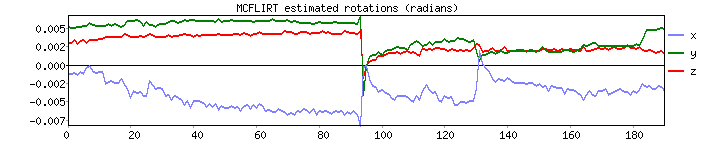

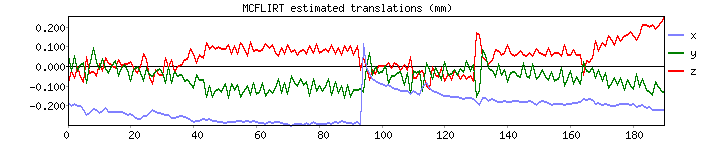

Processing: sub-29/ses-02/run-05


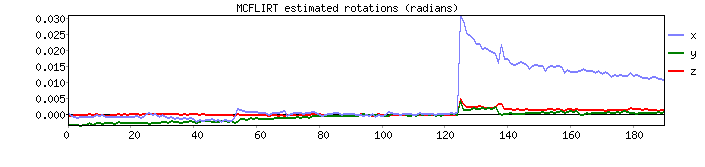

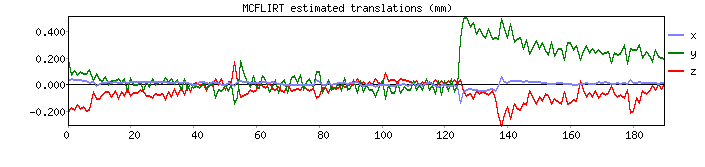

Processing: sub-30/ses-02/run-01


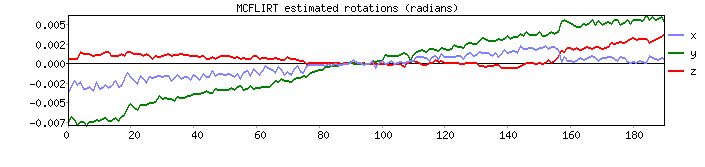

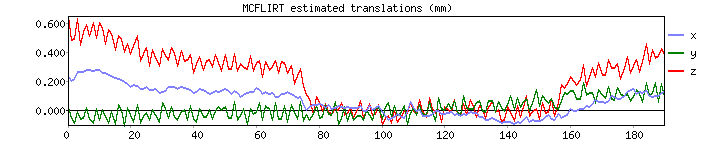

Processing: sub-30/ses-02/run-02


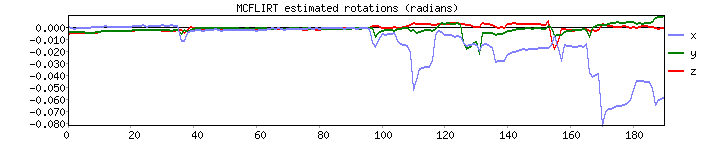

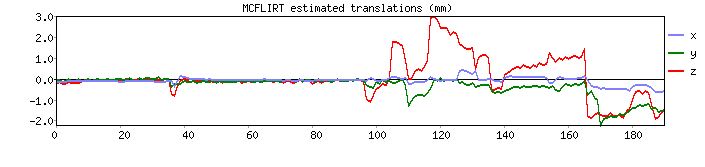

Processing: sub-30/ses-02/run-03


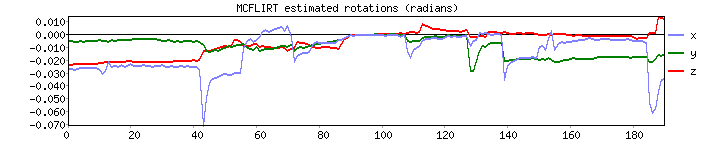

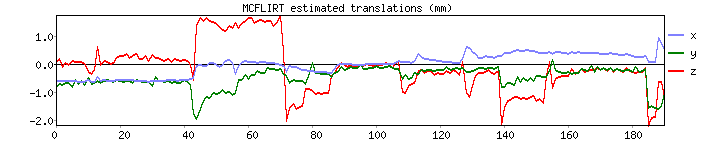

Processing: sub-30/ses-02/run-04


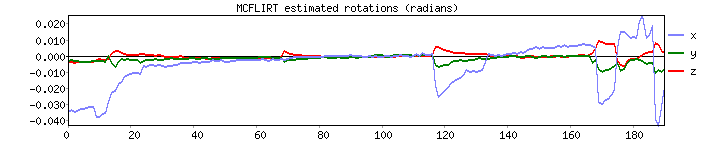

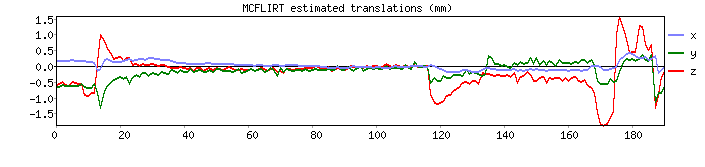

Processing: sub-30/ses-02/run-05


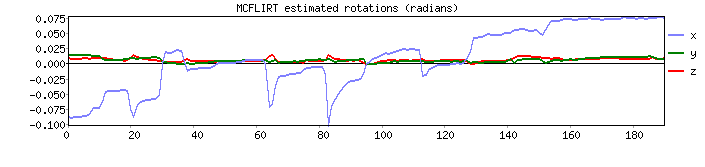

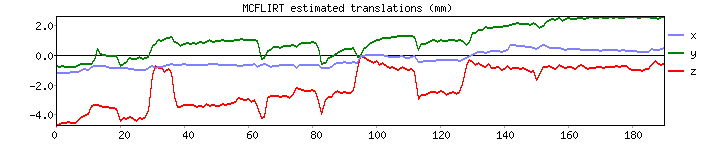

Processing: sub-31/ses-02/run-01


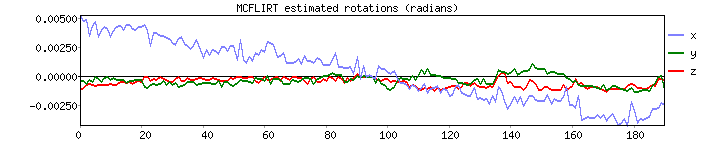

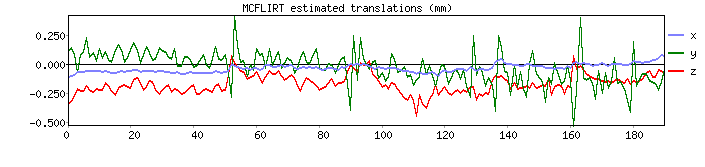

Processing: sub-31/ses-02/run-02


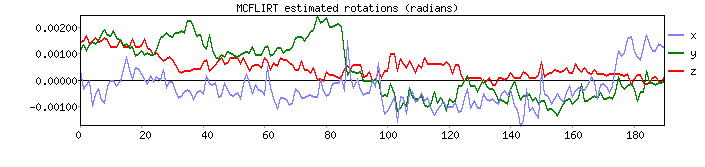

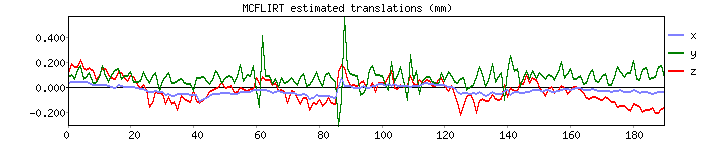

Processing: sub-31/ses-02/run-03


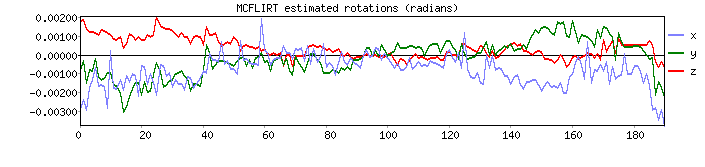

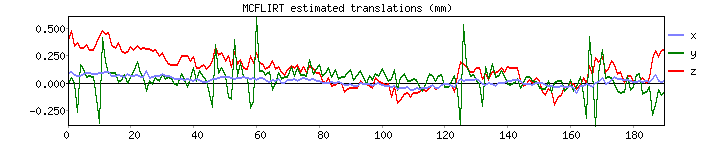

Processing: sub-31/ses-02/run-04


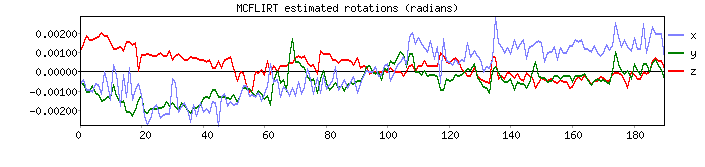

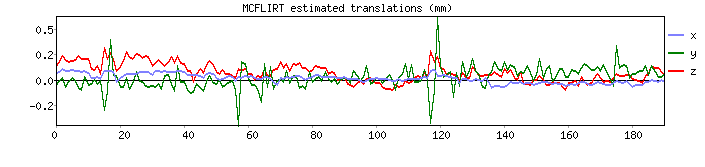

Processing: sub-31/ses-02/run-05


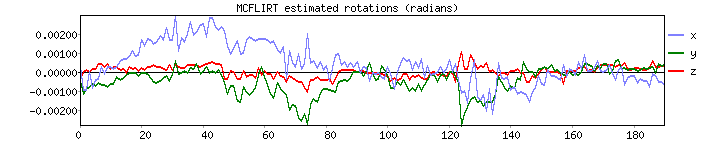

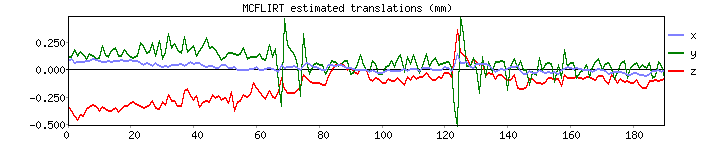

Processing: sub-32/ses-02/run-01


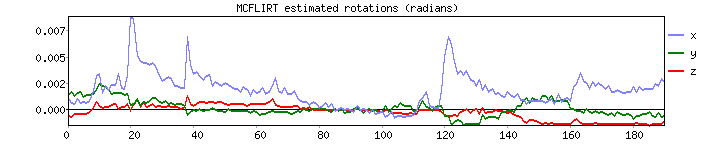

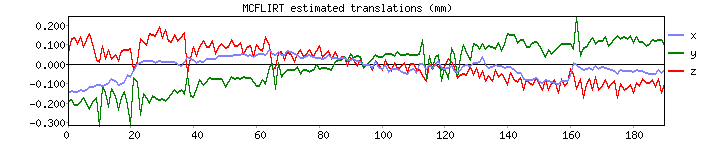

Processing: sub-32/ses-02/run-02


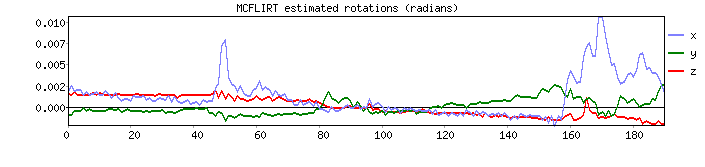

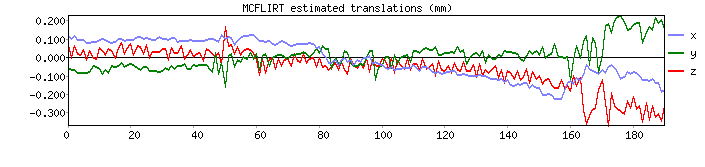

Processing: sub-32/ses-02/run-03


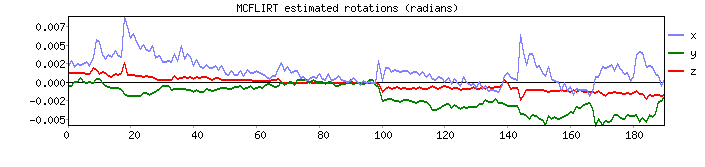

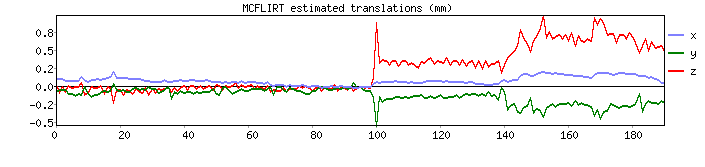

Processing: sub-32/ses-02/run-04


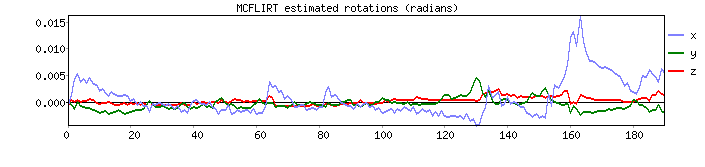

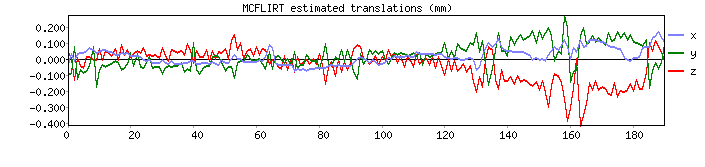

Processing: sub-32/ses-02/run-05


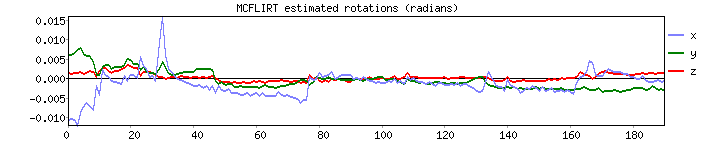

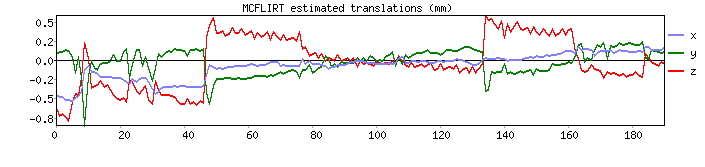

Processing: sub-33/ses-02/run-01


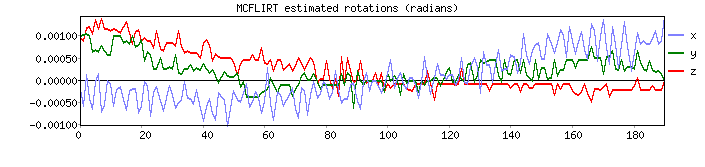

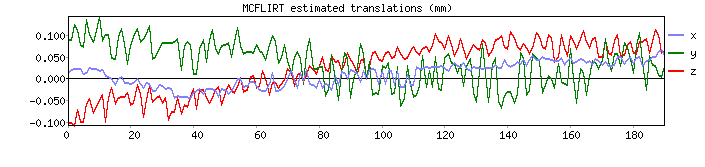

Processing: sub-33/ses-02/run-02


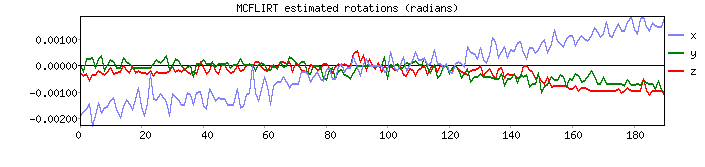

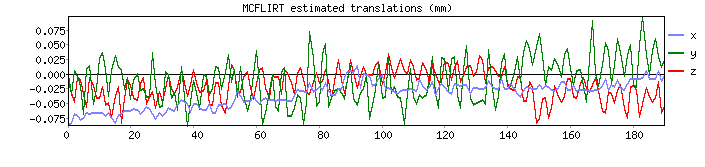

Processing: sub-33/ses-02/run-03


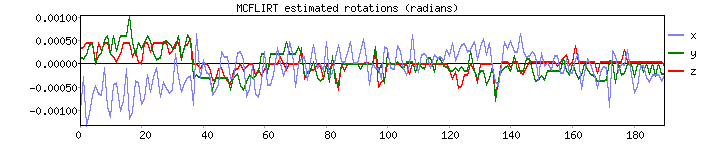

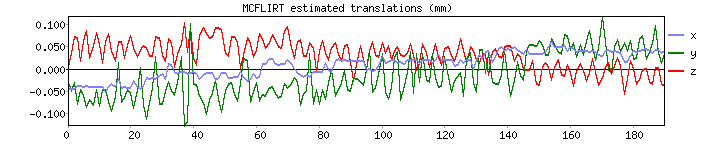

Processing: sub-33/ses-02/run-04


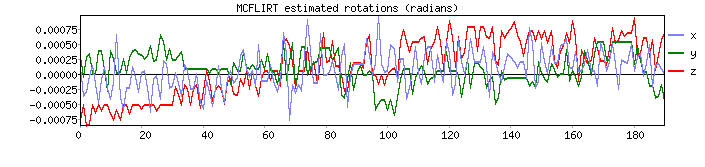

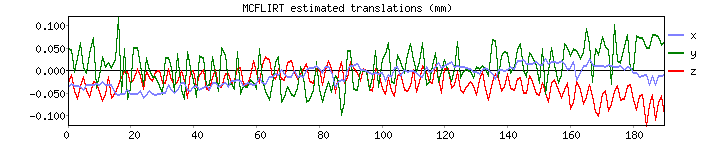

Processing: sub-33/ses-02/run-05


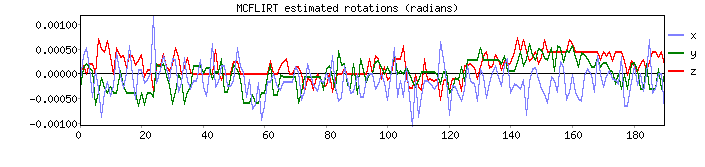

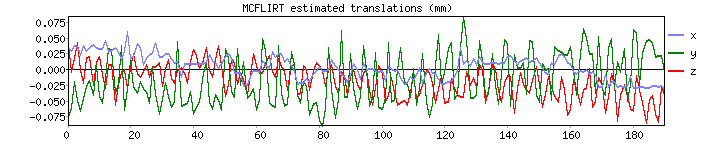

Processing: sub-34/ses-02/run-01


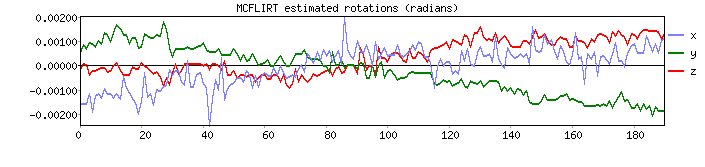

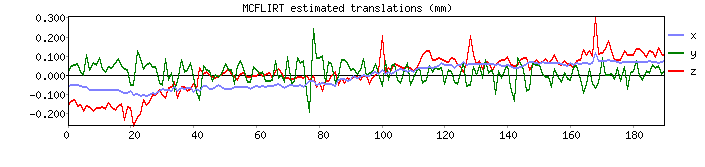

Processing: sub-34/ses-02/run-02


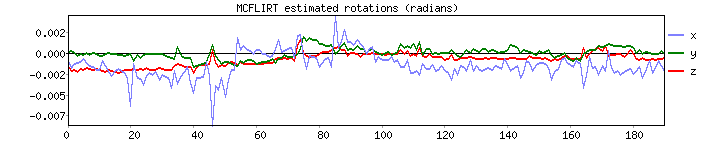

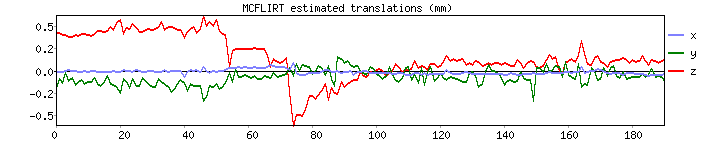

Processing: sub-34/ses-02/run-03


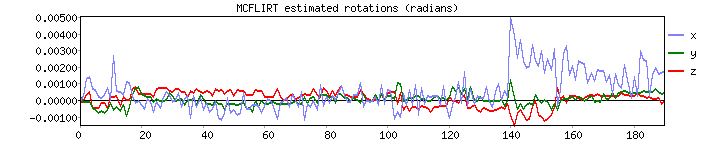

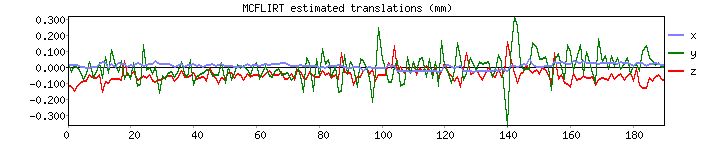

Processing: sub-34/ses-02/run-04


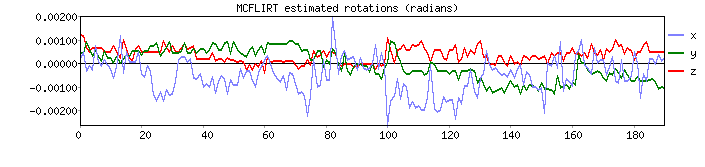

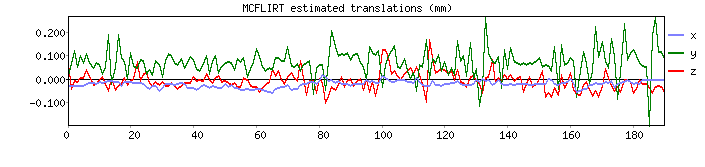

Processing: sub-34/ses-02/run-05


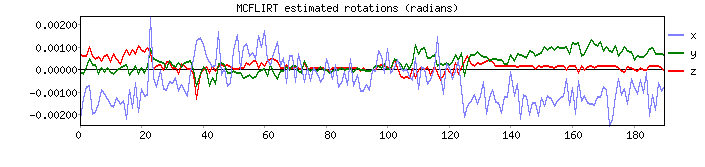

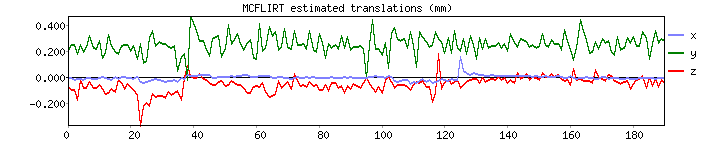

Processing: sub-35/ses-02/run-01


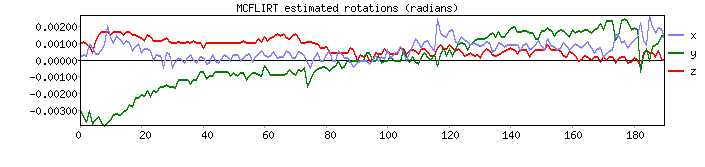

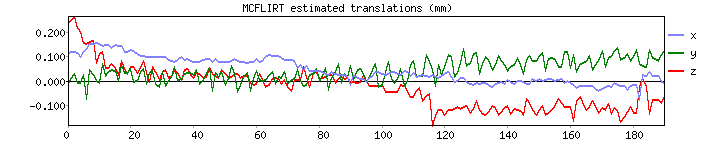

Processing: sub-35/ses-02/run-02


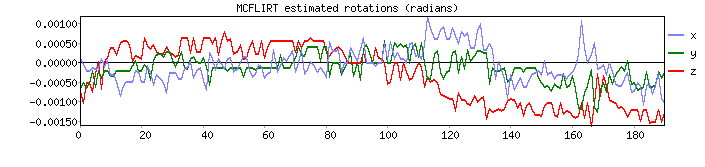

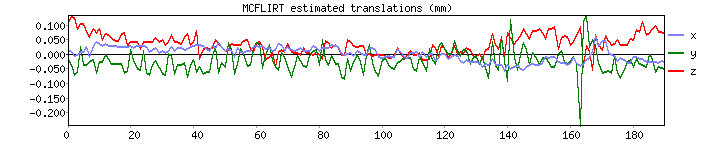

Processing: sub-35/ses-02/run-03


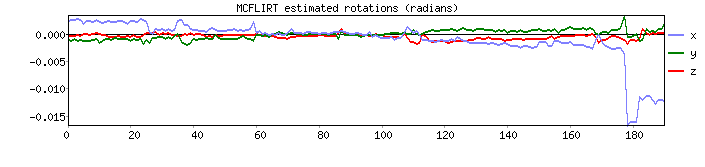

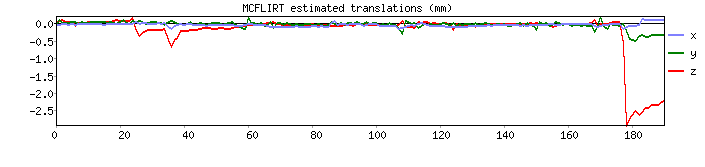

Processing: sub-35/ses-02/run-04


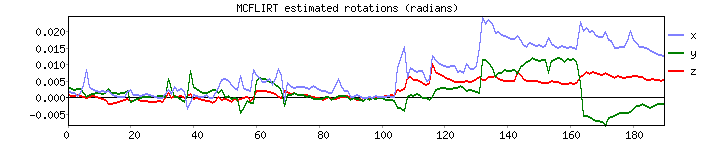

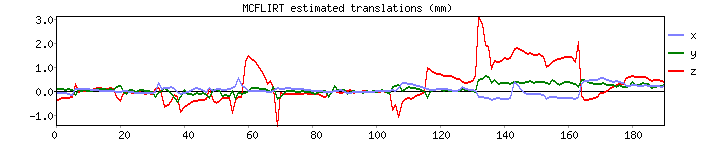

Processing: sub-35/ses-02/run-05


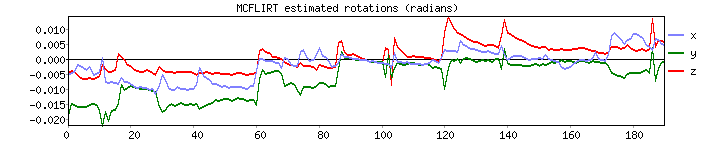

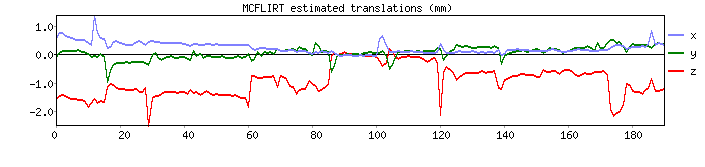

Processing: sub-36/ses-02/run-01


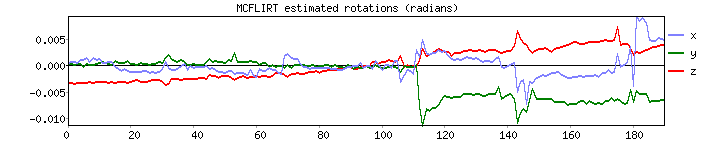

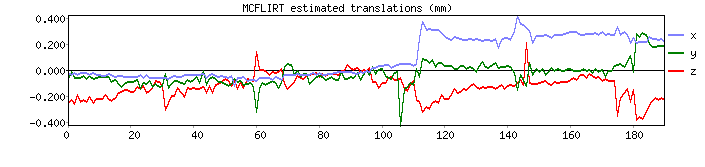

Processing: sub-36/ses-02/run-02


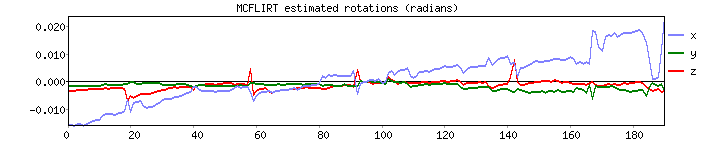

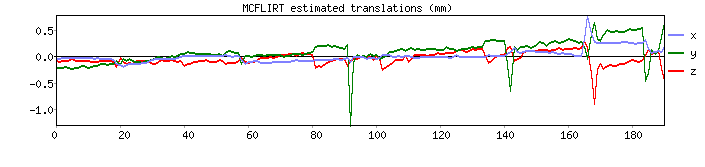

Processing: sub-36/ses-02/run-03


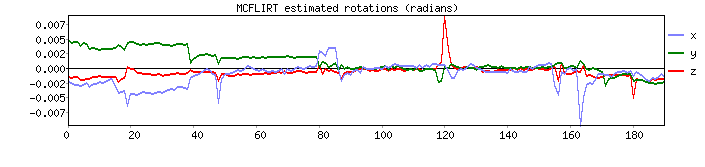

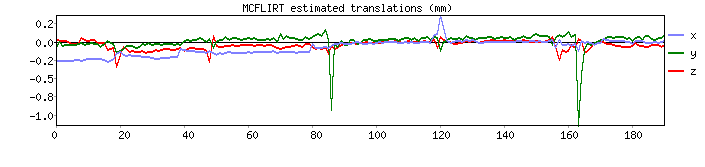

Processing: sub-36/ses-02/run-04


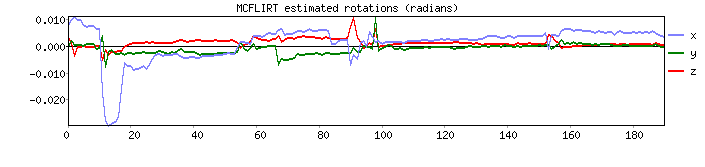

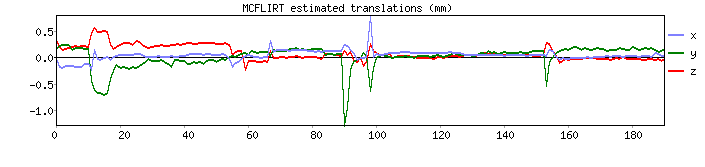

Processing: sub-36/ses-02/run-05


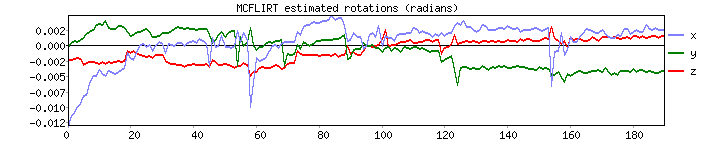

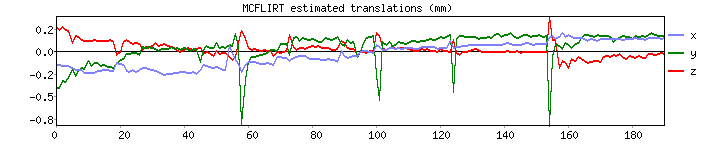

Processing: sub-37/ses-02/run-01


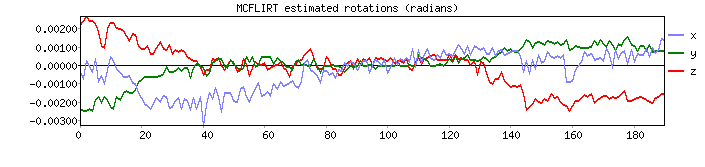

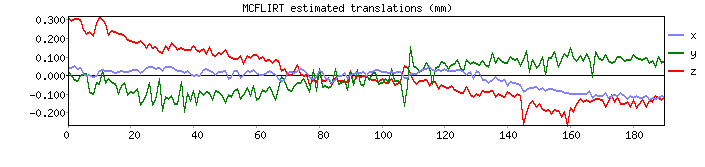

Processing: sub-37/ses-02/run-02


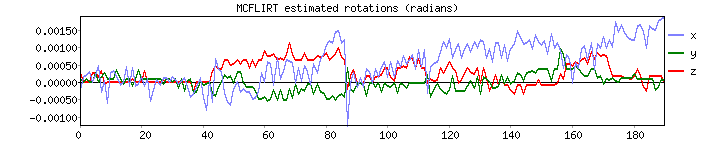

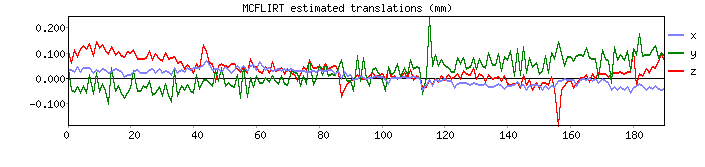

Processing: sub-37/ses-02/run-03


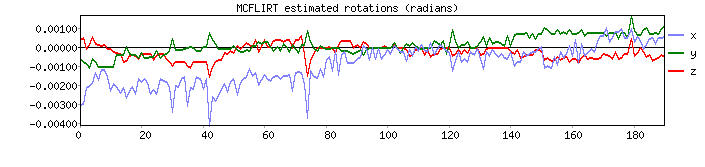

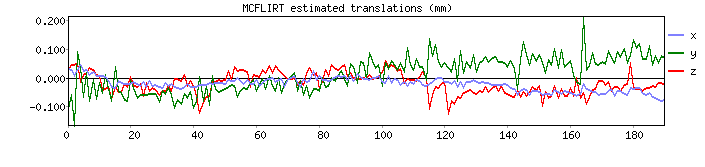

Processing: sub-37/ses-02/run-04


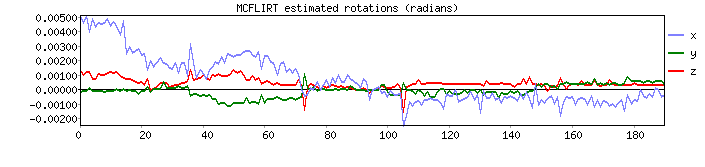

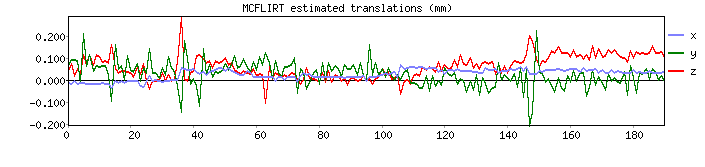

Processing: sub-37/ses-02/run-05


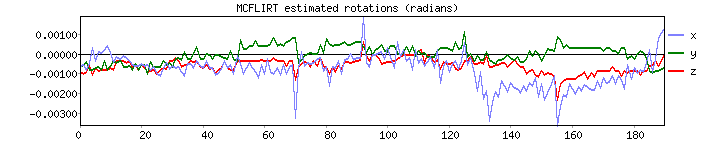

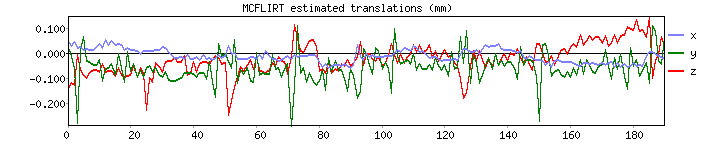

Processing: sub-38/ses-02/run-01


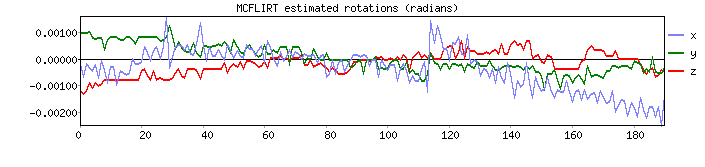

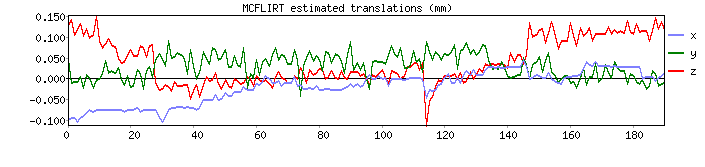

Processing: sub-38/ses-02/run-02


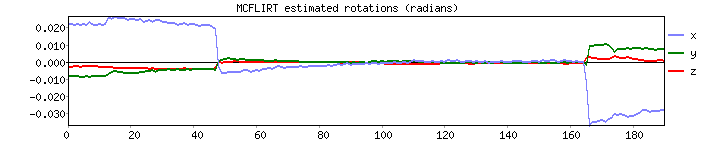

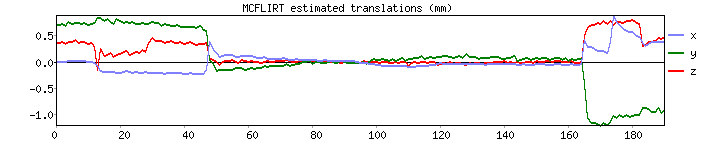

Processing: sub-38/ses-02/run-03


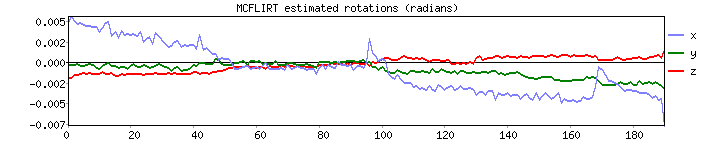

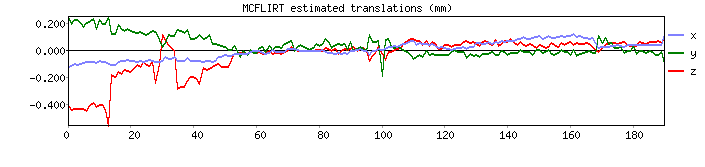

Processing: sub-38/ses-02/run-04


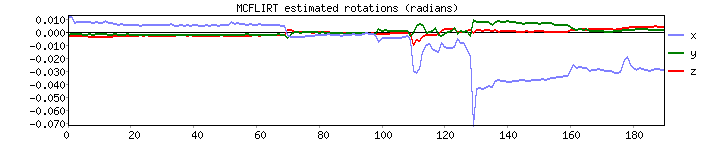

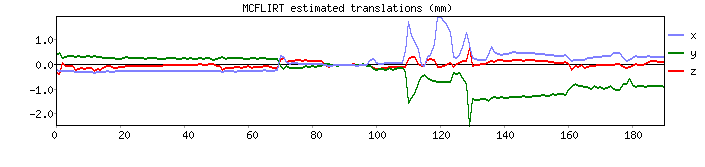

Processing: sub-38/ses-02/run-05


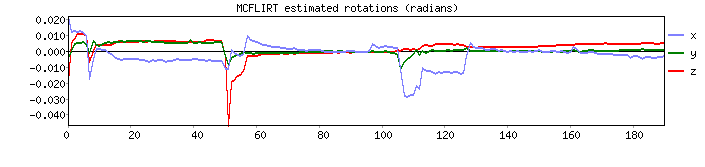

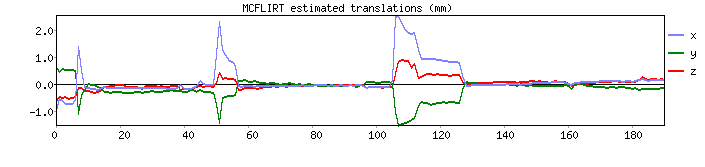

Processing: sub-39/ses-02/run-01


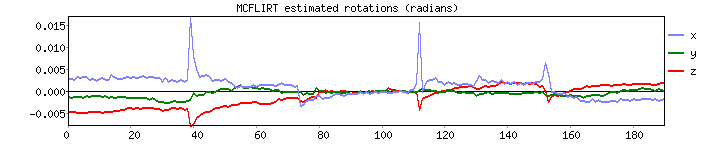

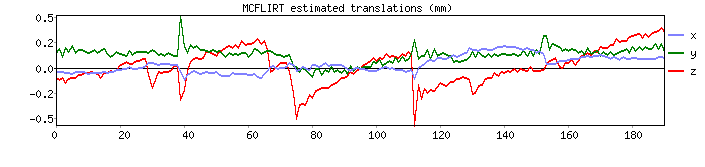

Processing: sub-39/ses-02/run-02


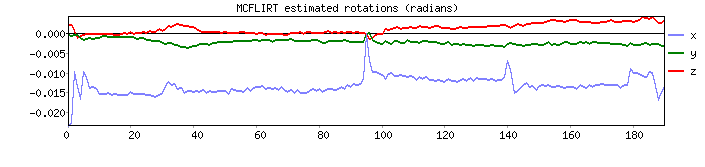

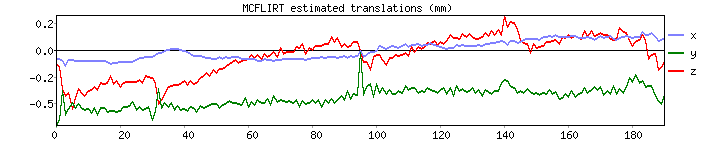

Processing: sub-39/ses-02/run-03


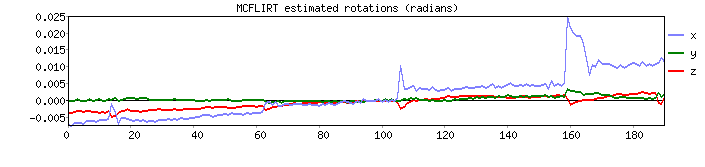

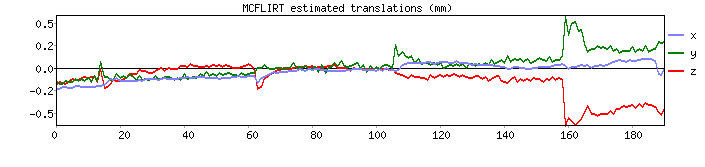

Processing: sub-39/ses-02/run-04


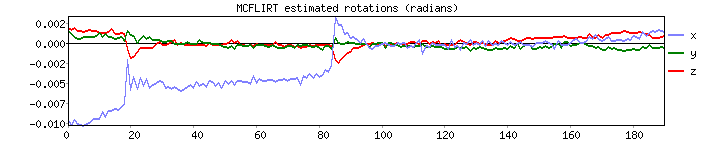

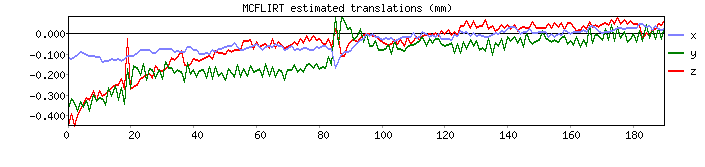

Processing: sub-39/ses-02/run-05


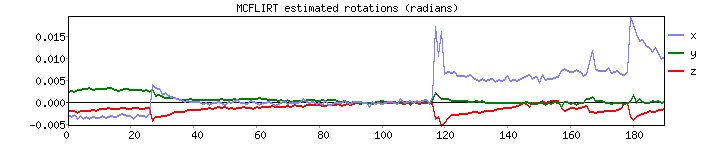

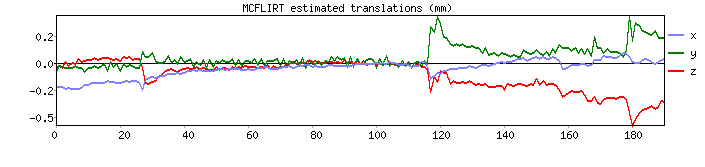

Processing: sub-40/ses-02/run-01


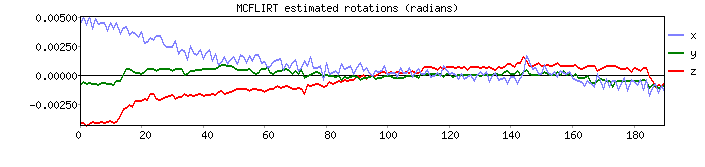

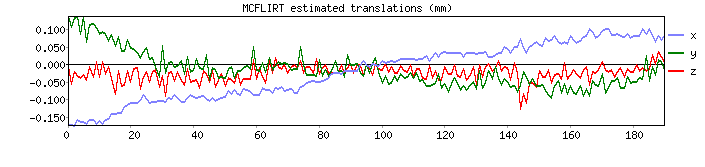

Processing: sub-40/ses-02/run-02


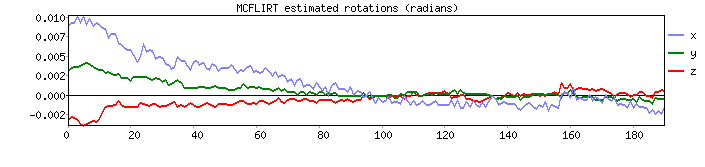

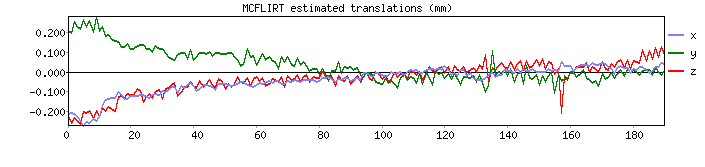

Processing: sub-40/ses-02/run-03


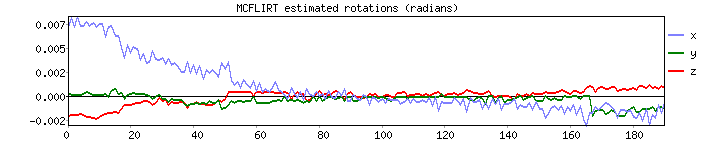

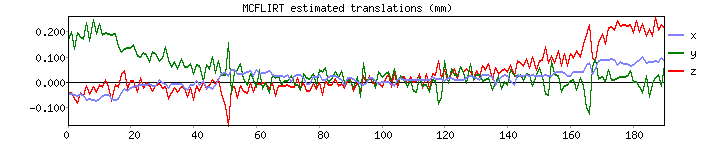

Processing: sub-40/ses-02/run-04


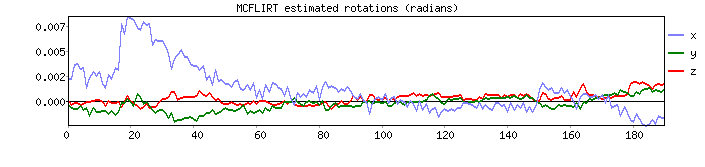

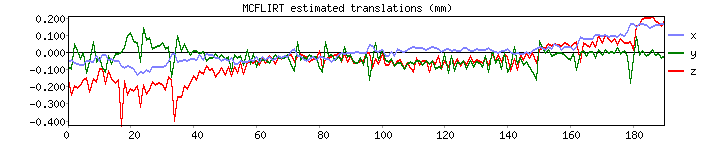

Processing: sub-40/ses-02/run-05


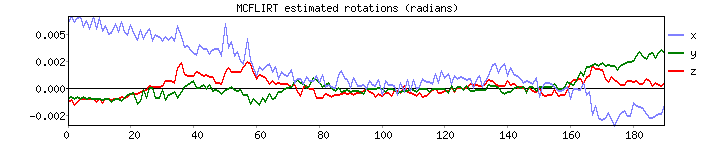

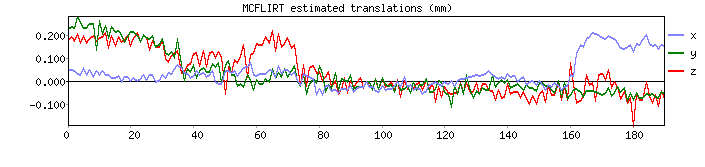

Processing: sub-41/ses-02/run-01


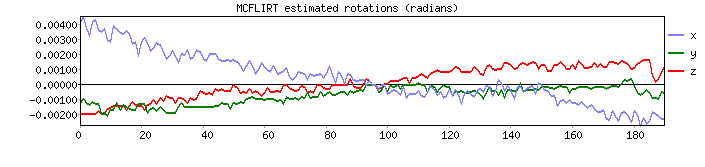

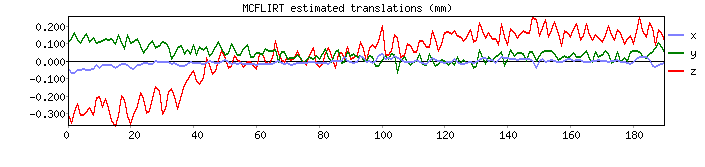

Processing: sub-41/ses-02/run-02


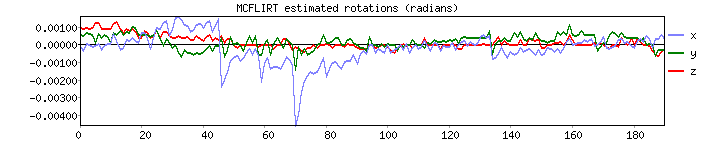

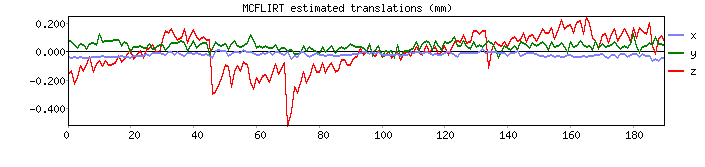

Processing: sub-41/ses-02/run-03


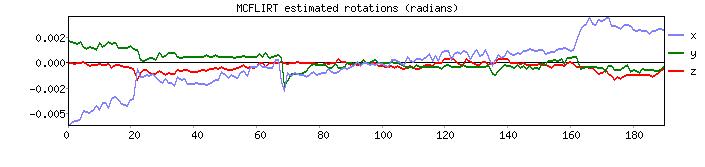

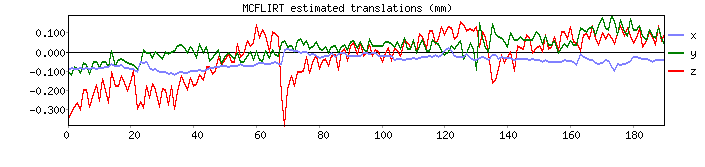

Processing: sub-41/ses-02/run-04


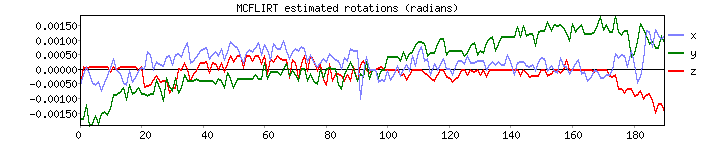

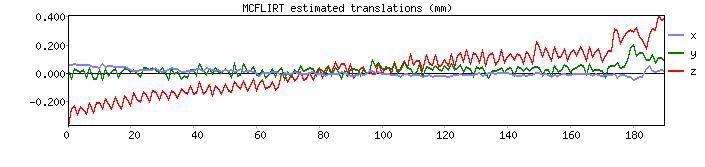

Processing: sub-41/ses-02/run-05


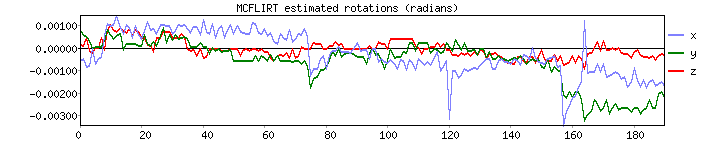

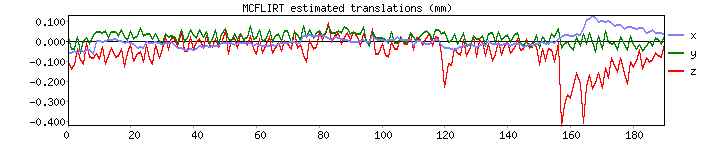

Processing: sub-42/ses-02/run-01


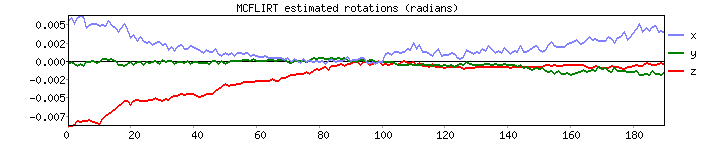

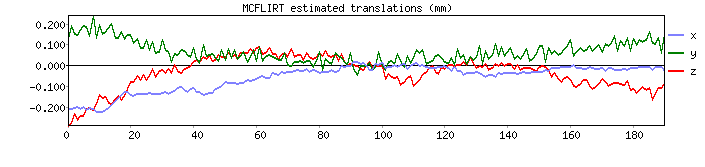

Processing: sub-42/ses-02/run-02


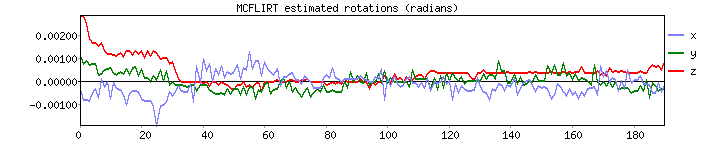

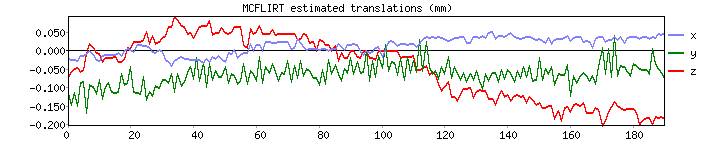

Processing: sub-42/ses-02/run-03


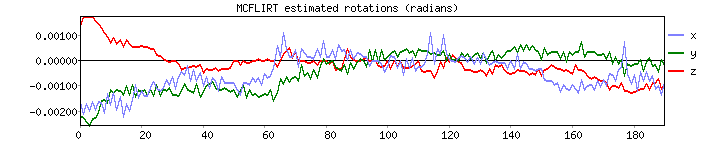

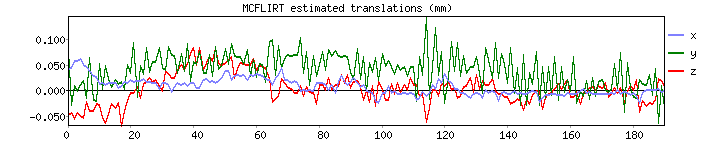

Processing: sub-42/ses-02/run-04


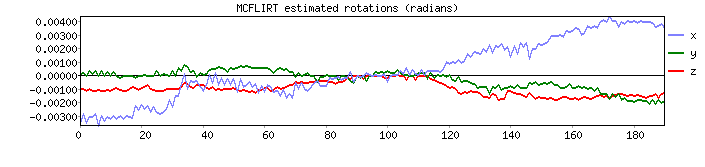

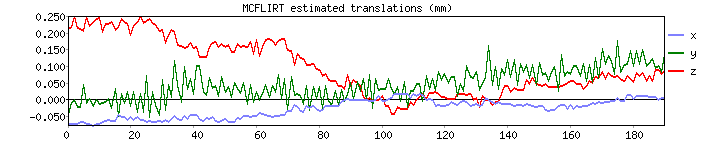

Processing: sub-42/ses-02/run-05


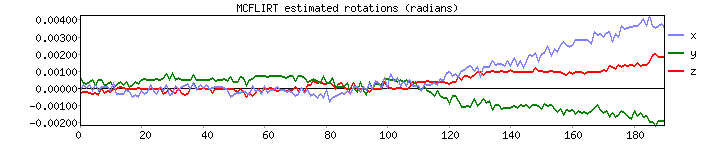

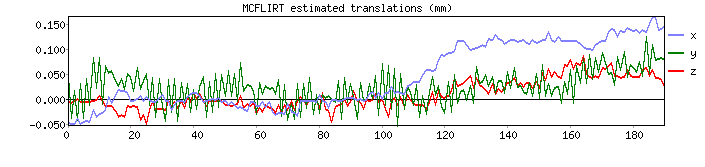

Processing: sub-43/ses-02/run-01


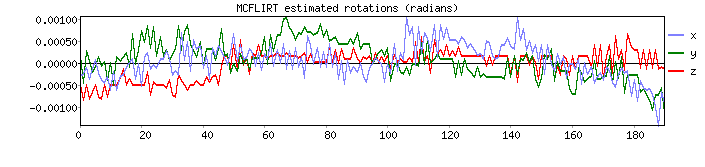

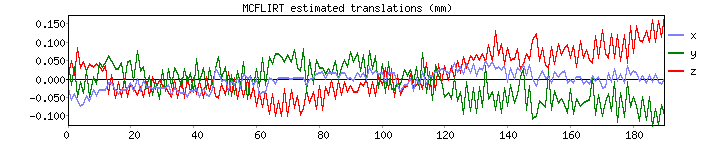

Processing: sub-43/ses-02/run-02


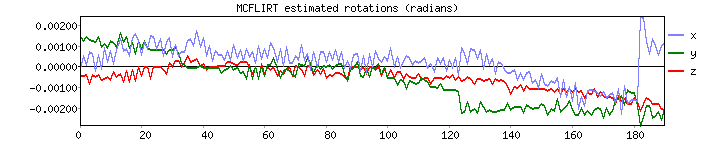

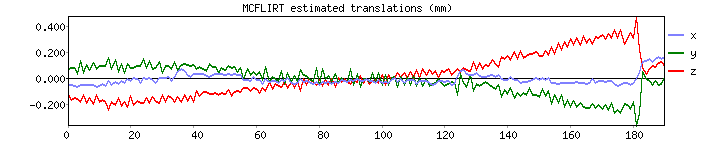

Processing: sub-43/ses-02/run-03


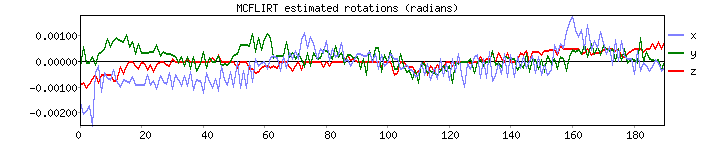

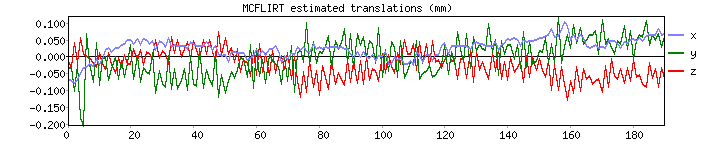

Processing: sub-43/ses-02/run-04


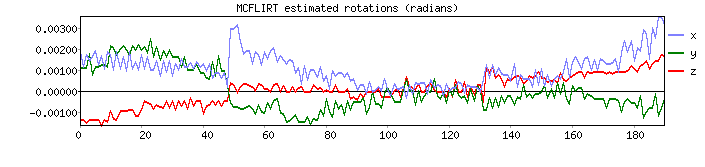

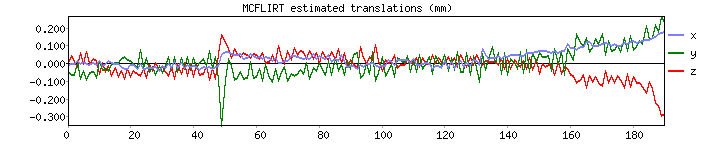

Processing: sub-43/ses-02/run-05


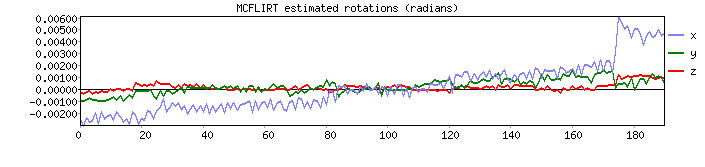

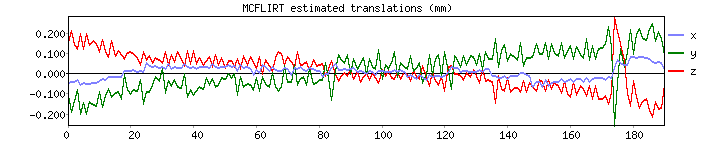

Processing: sub-44/ses-02/run-01


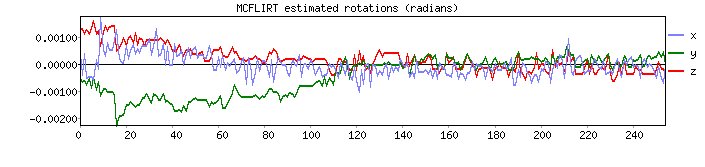

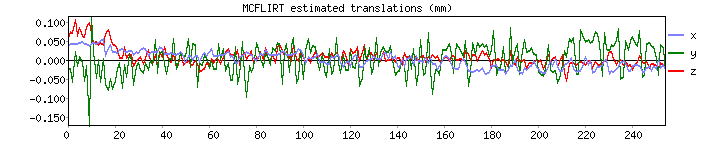

Processing: sub-44/ses-02/run-02


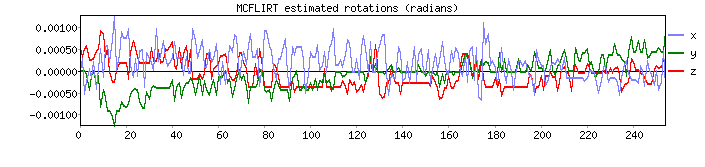

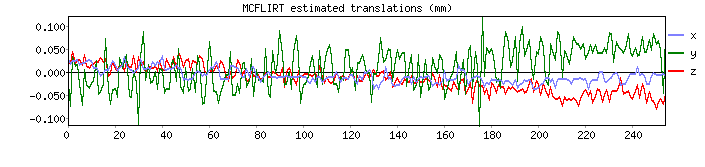

Processing: sub-44/ses-02/run-03


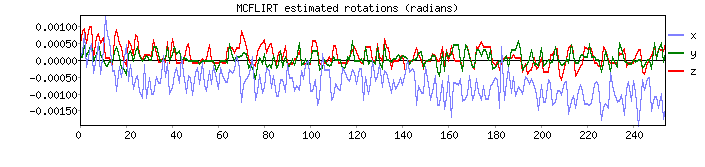

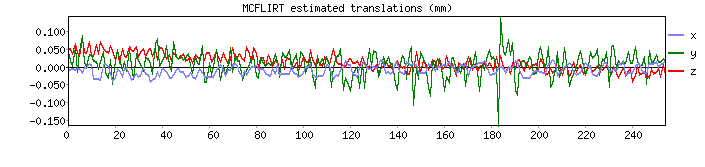

Processing: sub-44/ses-02/run-04


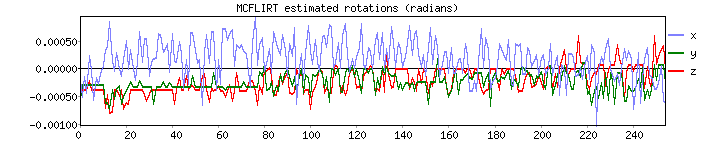

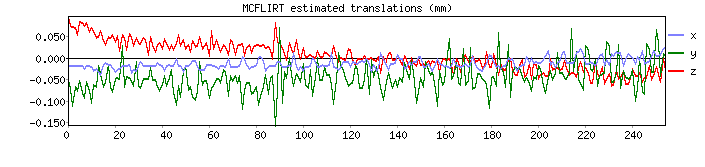

Processing: sub-44/ses-02/run-05


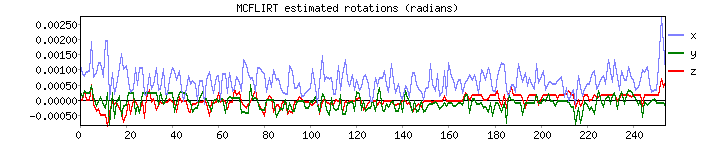

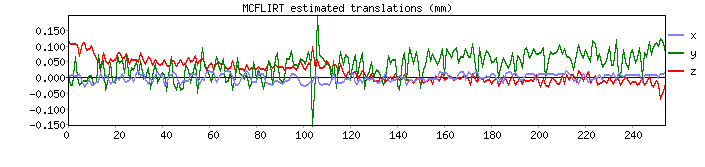

Processing: sub-45/ses-02/run-01


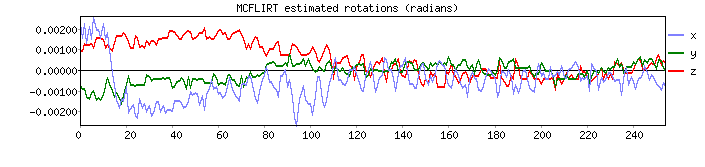

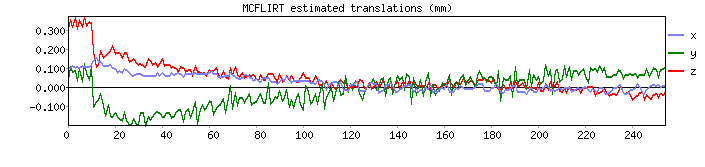

Processing: sub-45/ses-02/run-02


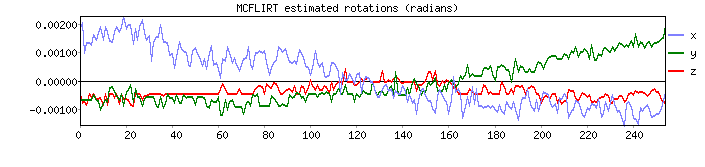

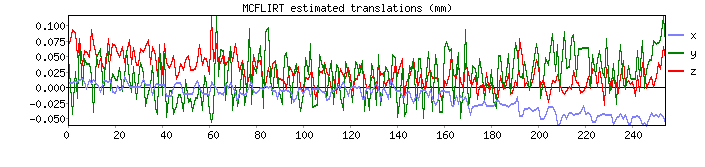

Processing: sub-45/ses-02/run-03


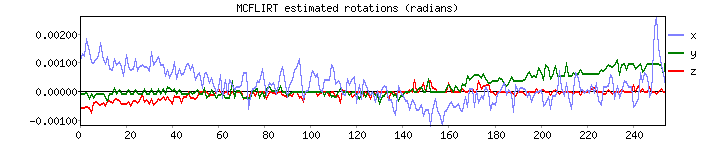

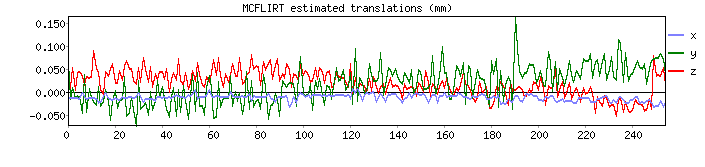

Processing: sub-45/ses-02/run-04


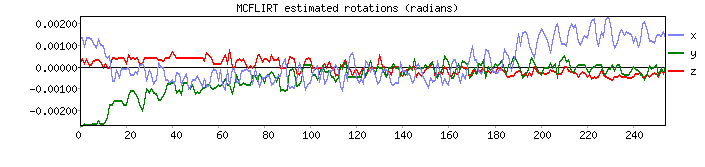

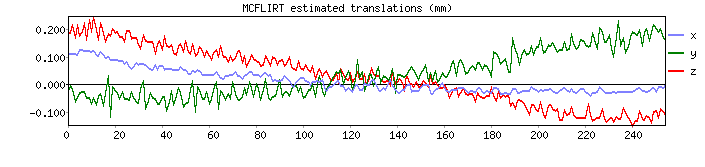

Processing: sub-45/ses-02/run-05


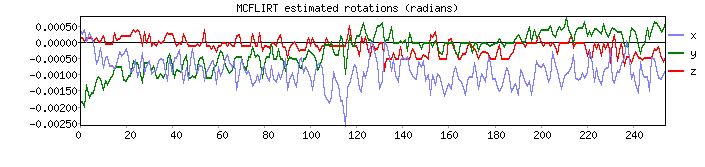

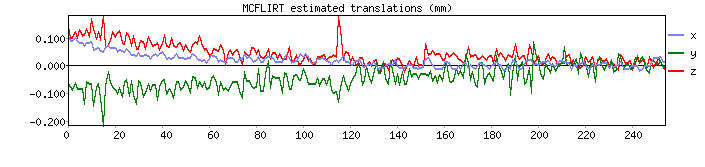

Processing: sub-46/ses-02/run-01


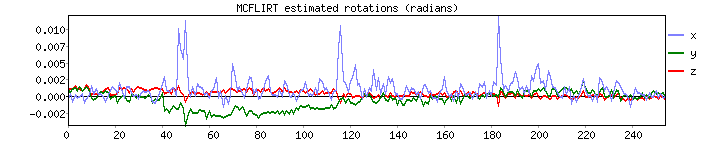

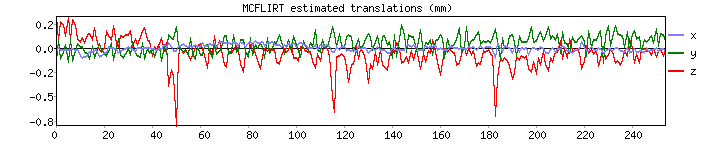

Processing: sub-46/ses-02/run-02


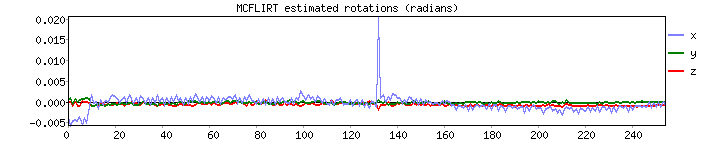

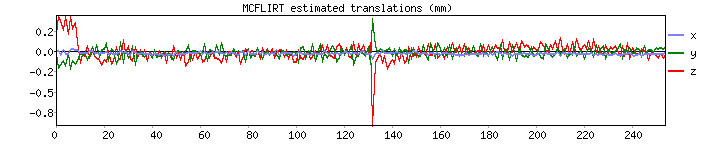

Processing: sub-46/ses-02/run-03


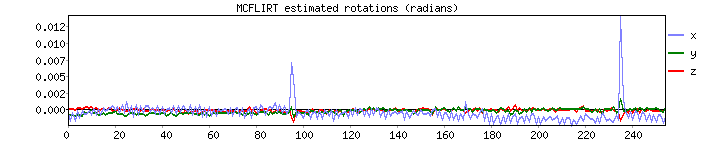

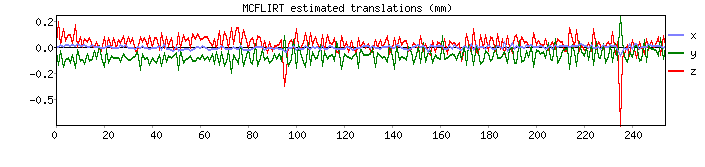

Processing: sub-46/ses-02/run-04


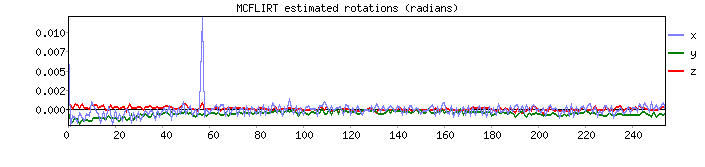

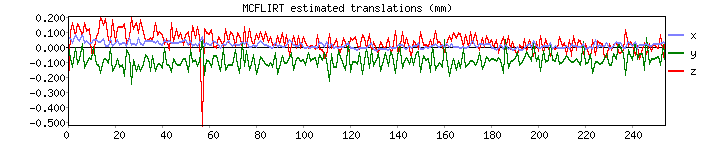

Processing: sub-46/ses-02/run-05


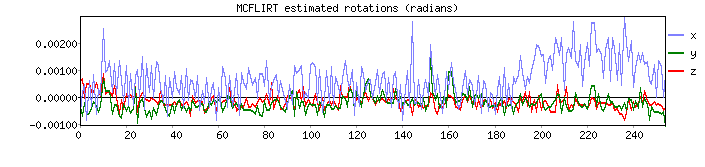

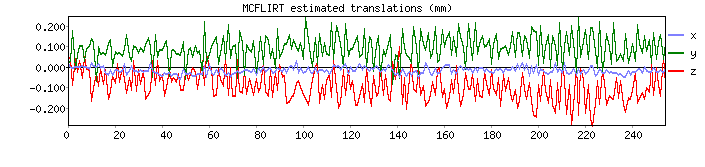

Processing: sub-47/ses-02/run-01


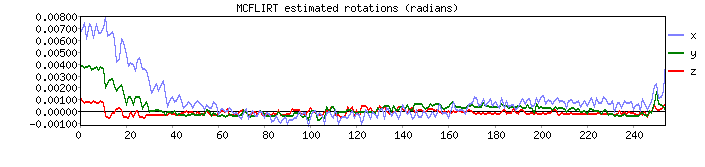

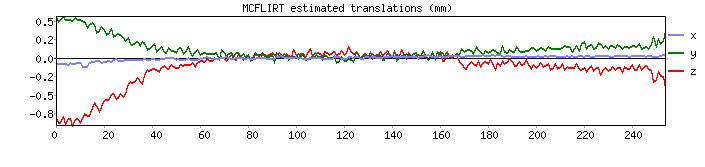

Processing: sub-47/ses-02/run-02


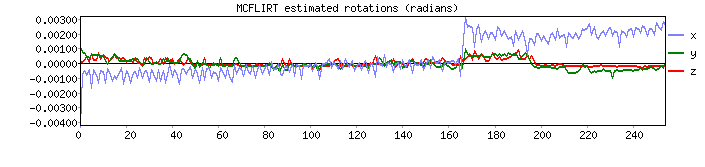

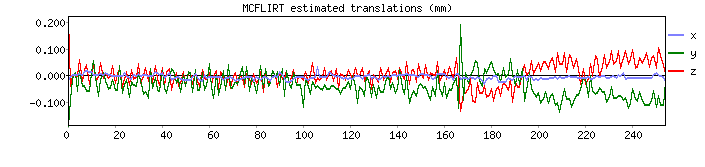

Processing: sub-47/ses-02/run-03


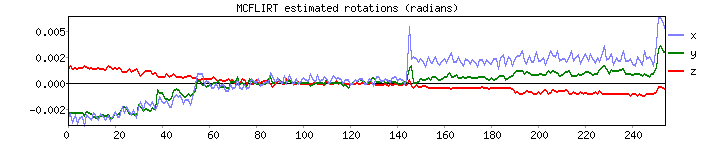

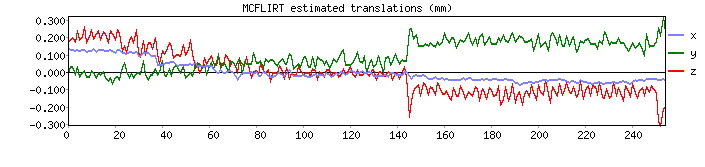

Processing: sub-47/ses-02/run-04


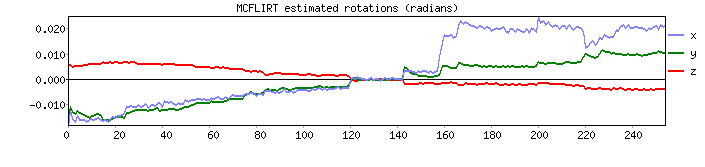

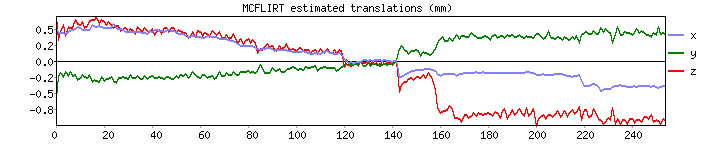

Processing: sub-47/ses-02/run-05


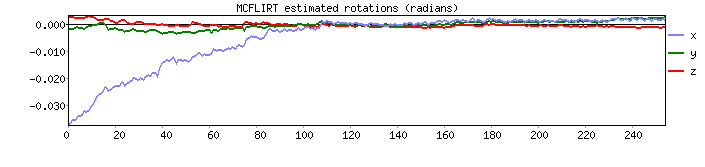

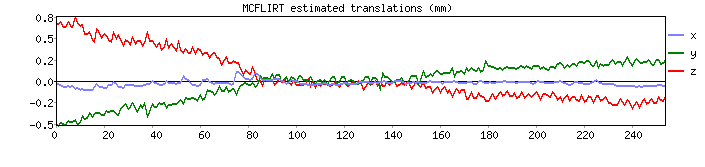

Processing: sub-48/ses-02/run-01


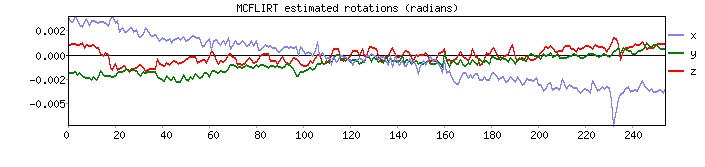

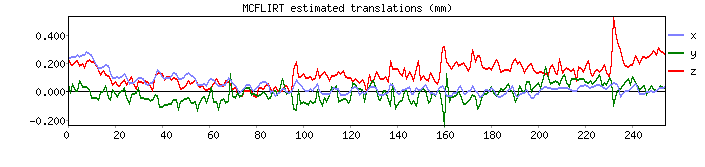

Processing: sub-48/ses-02/run-02


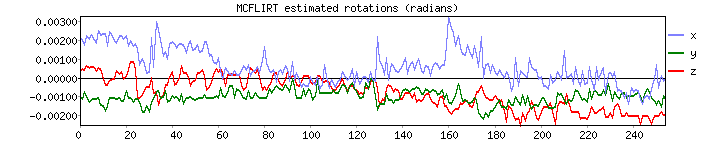

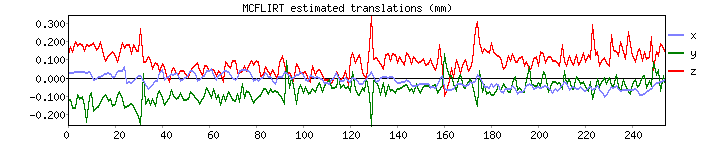

Processing: sub-48/ses-02/run-03


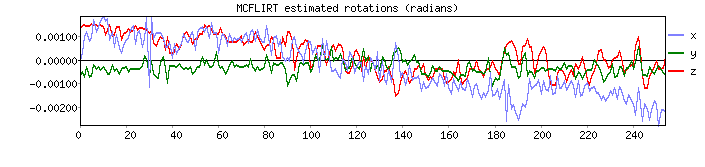

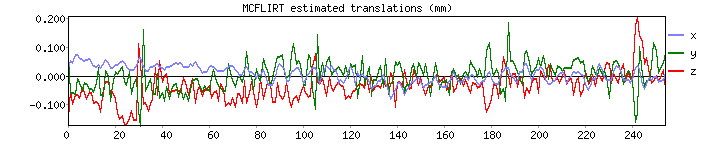

Processing: sub-48/ses-02/run-04


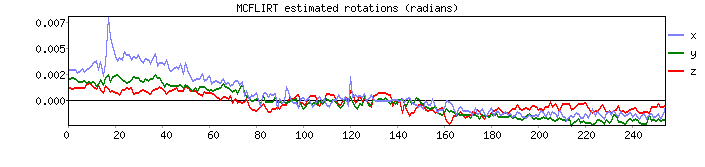

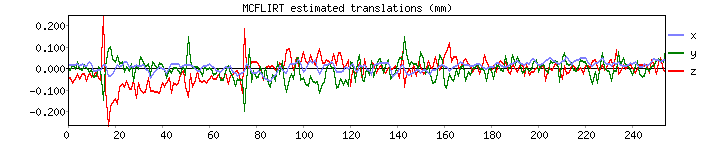

Processing: sub-48/ses-02/run-05


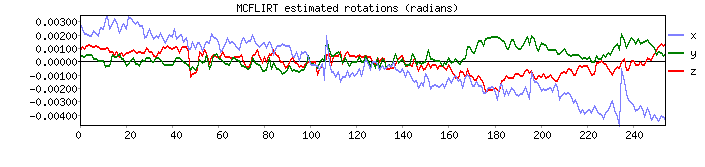

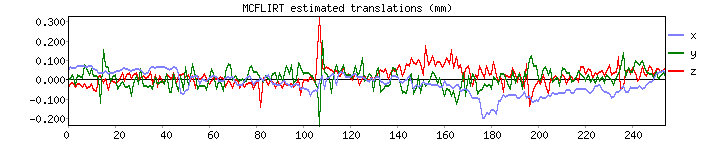

Processing: sub-49/ses-02/run-01


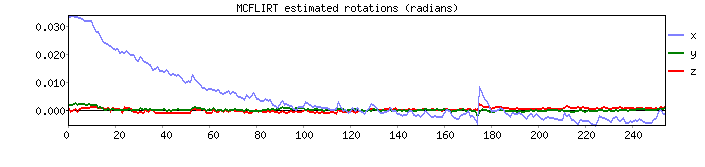

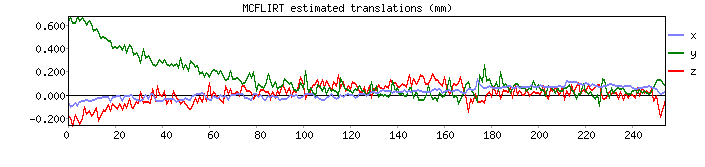

Processing: sub-49/ses-02/run-02


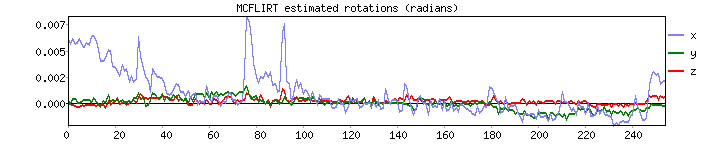

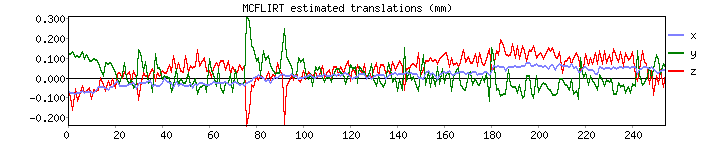

Processing: sub-49/ses-02/run-03


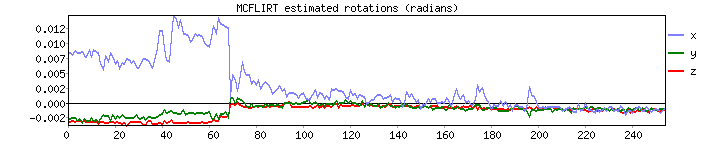

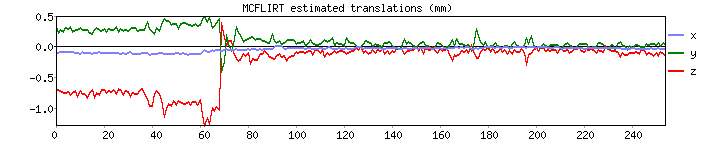

Processing: sub-49/ses-02/run-04


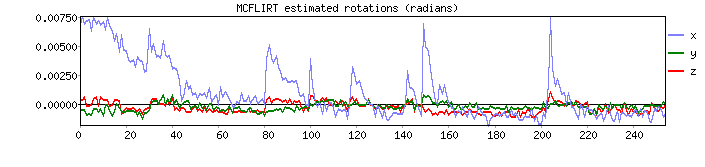

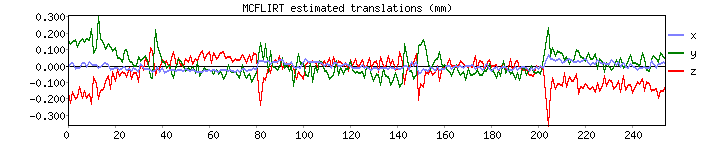

Processing: sub-49/ses-02/run-05


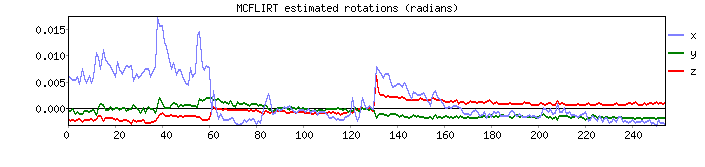

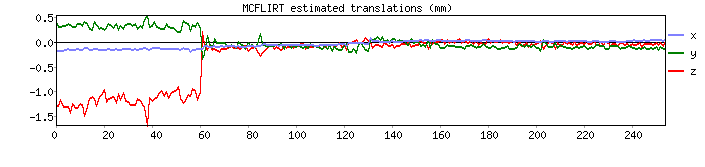

Processing: sub-50/ses-02/run-01


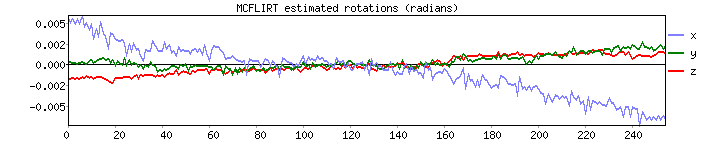

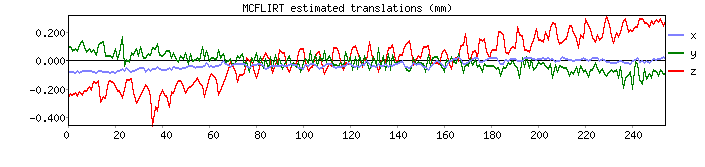

Processing: sub-50/ses-02/run-02


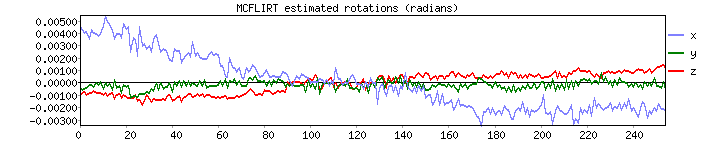

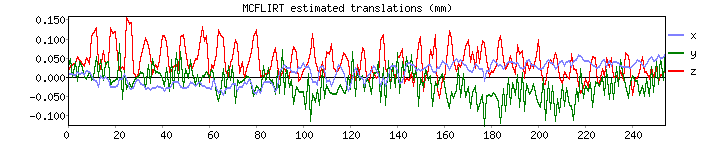

Processing: sub-50/ses-02/run-03


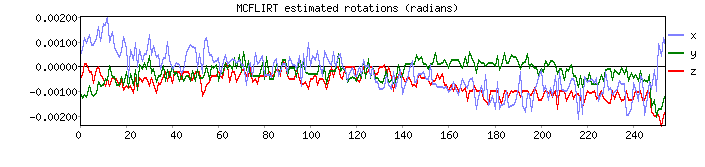

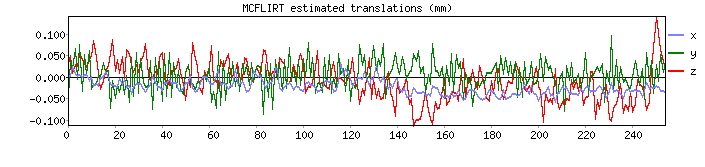

Processing: sub-50/ses-02/run-04


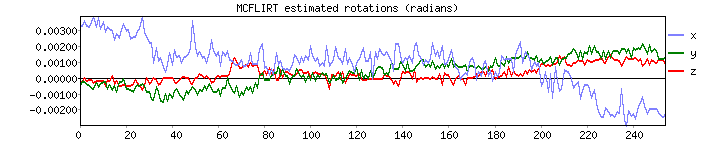

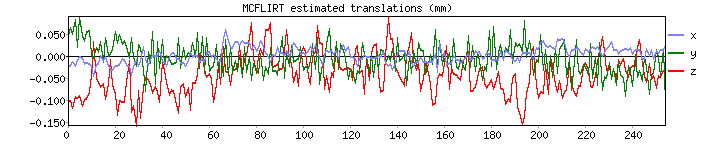

Processing: sub-50/ses-02/run-05


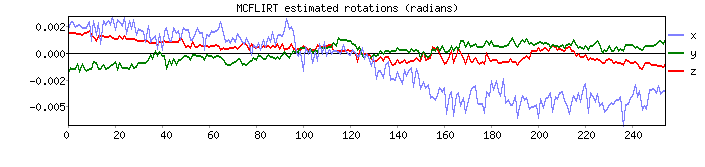

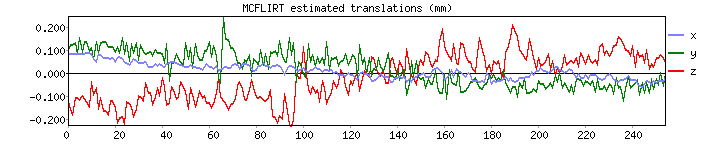

Processing: sub-51/ses-02/run-01


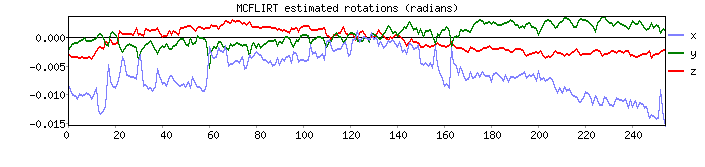

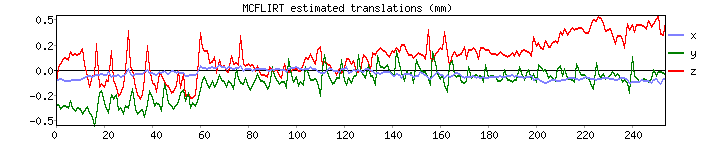

Processing: sub-51/ses-02/run-02


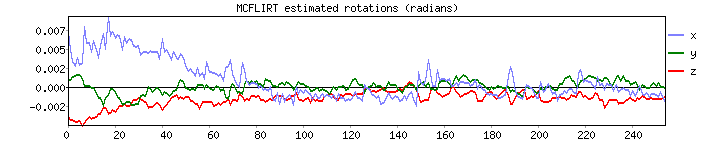

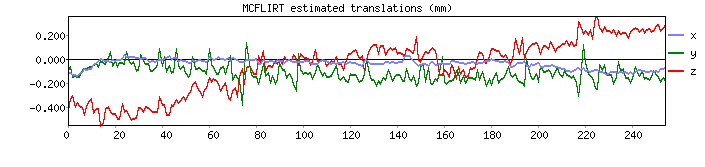

Processing: sub-51/ses-02/run-03


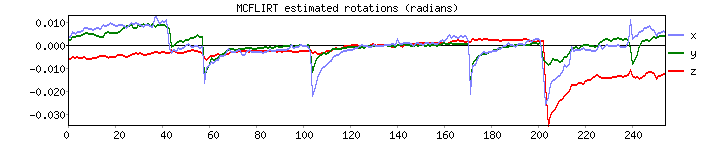

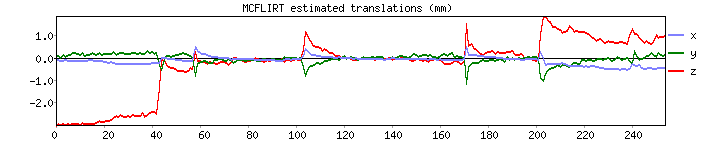

Processing: sub-51/ses-02/run-04


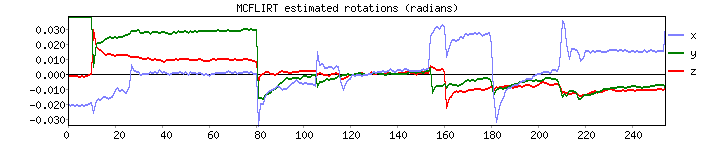

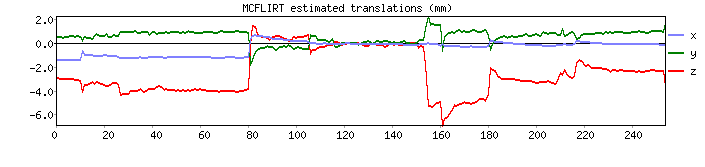

Processing: sub-51/ses-02/run-05


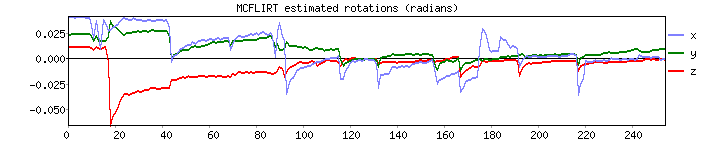

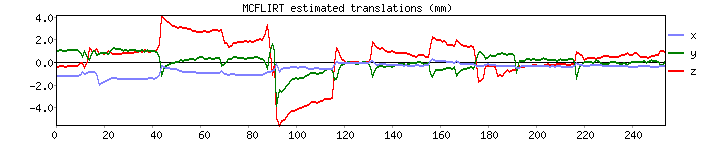

Processing: sub-52/ses-02/run-01


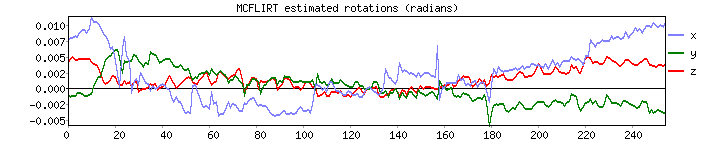

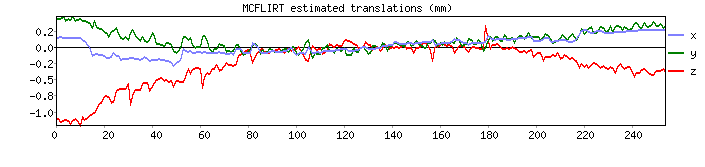

Processing: sub-52/ses-02/run-02


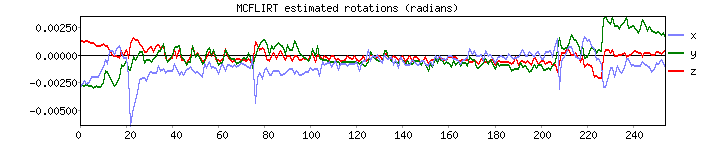

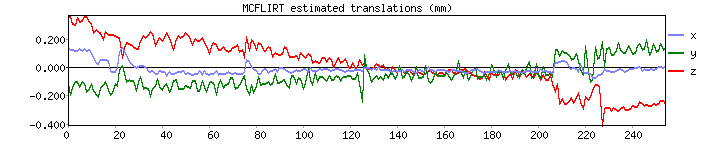

Processing: sub-52/ses-02/run-03


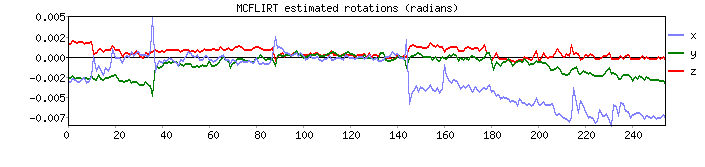

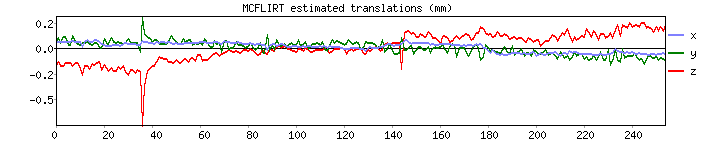

Processing: sub-52/ses-02/run-04


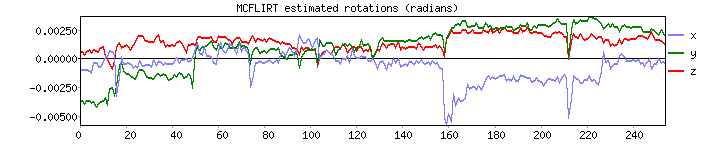

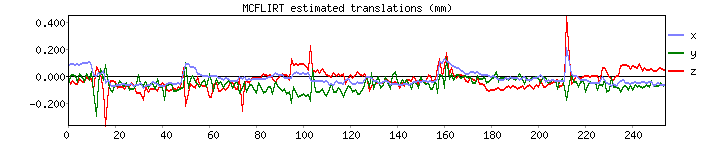

Processing: sub-52/ses-02/run-05


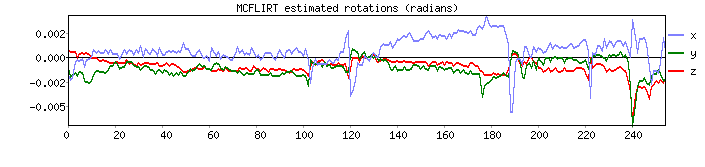

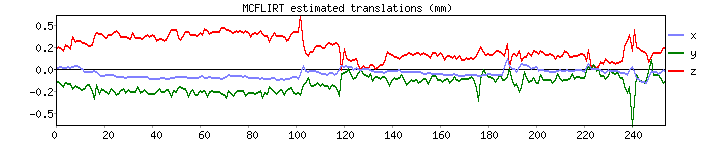

Processing: sub-53/ses-02/run-01


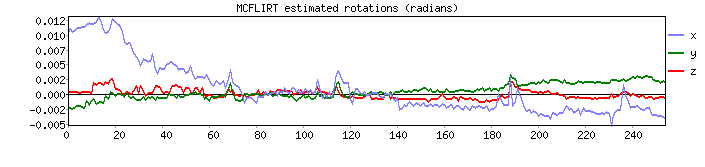

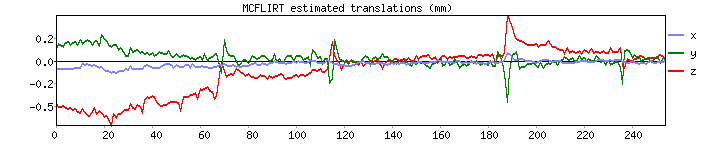

Processing: sub-53/ses-02/run-02


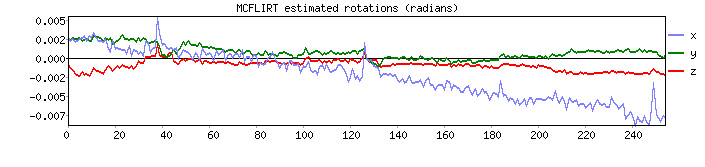

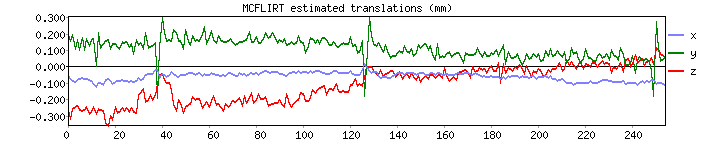

Processing: sub-53/ses-02/run-03


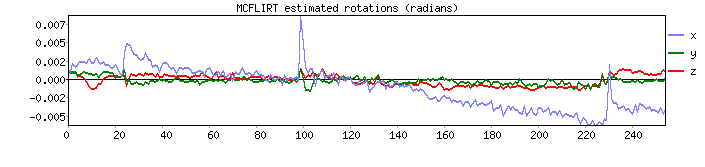

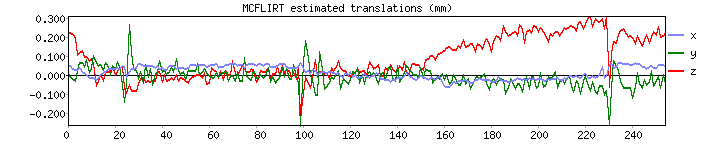

Processing: sub-53/ses-02/run-04


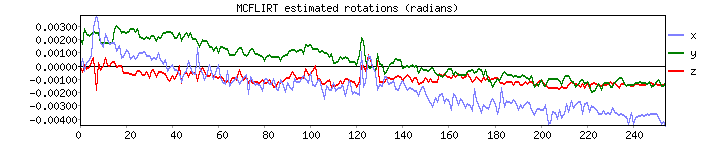

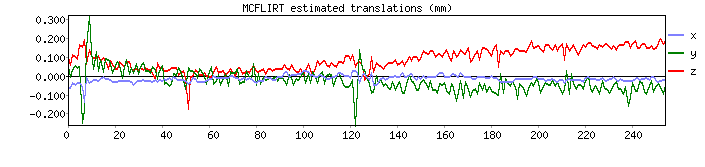

Processing: sub-53/ses-02/run-05


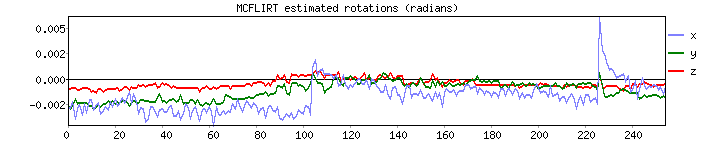

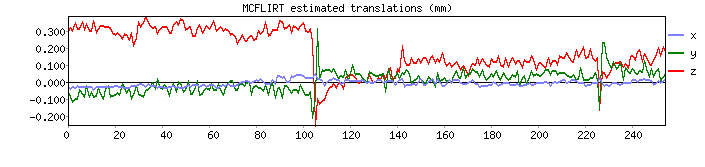

Processing: sub-54/ses-02/run-01


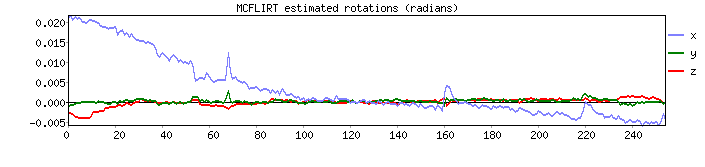

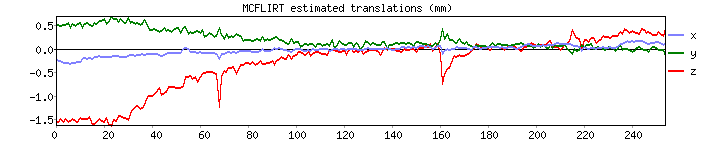

Processing: sub-54/ses-02/run-02


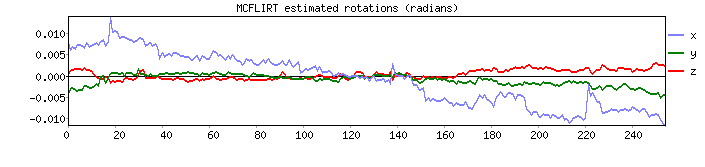

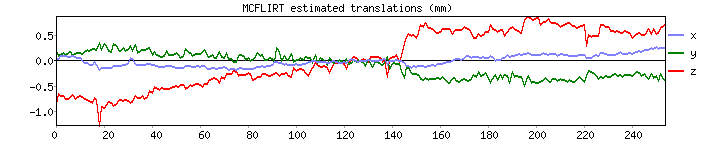

Processing: sub-54/ses-02/run-03


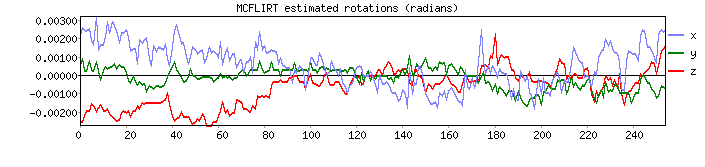

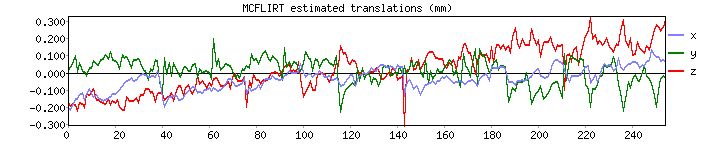

Processing: sub-54/ses-02/run-04


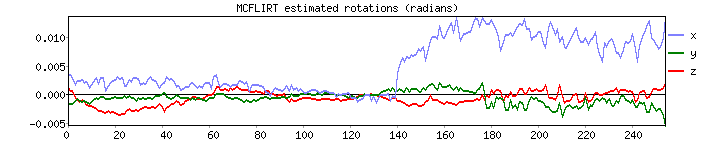

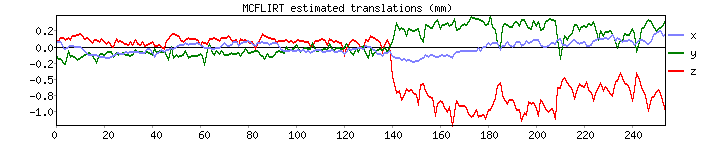

Processing: sub-54/ses-02/run-05


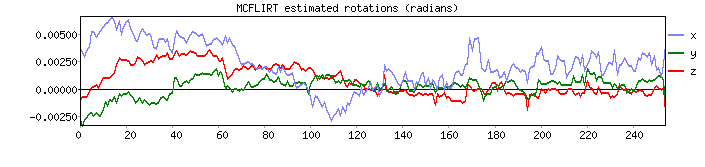

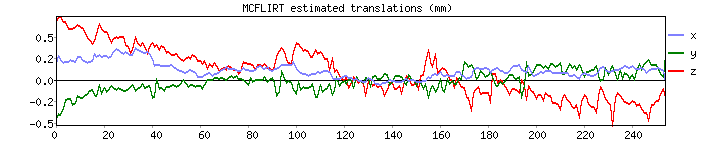

Processing: sub-55/ses-02/run-01


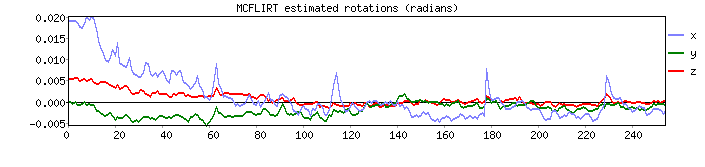

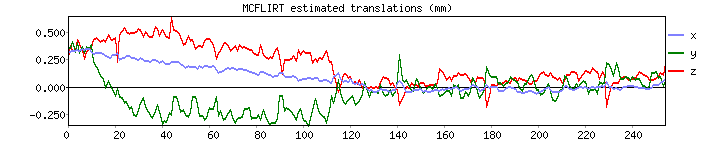

Processing: sub-55/ses-02/run-02


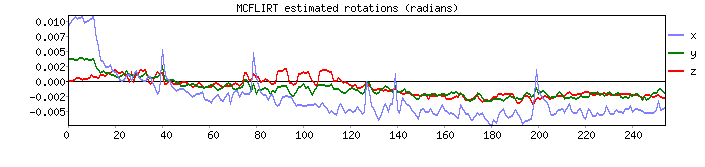

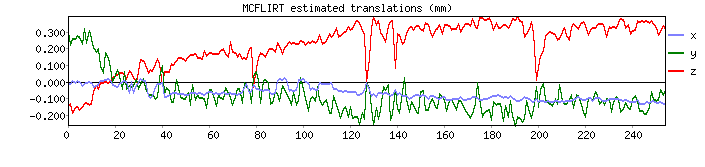

Processing: sub-55/ses-02/run-03


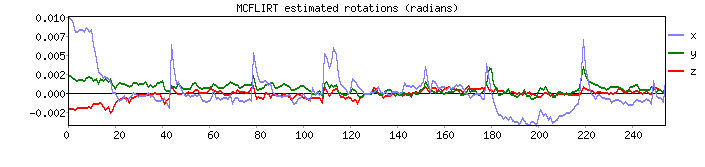

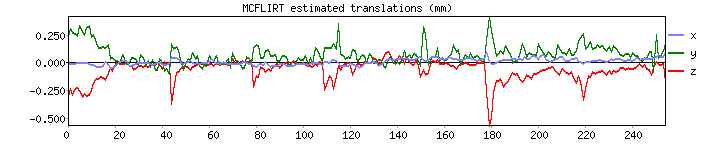

Processing: sub-55/ses-02/run-04


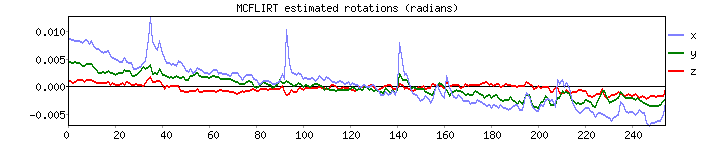

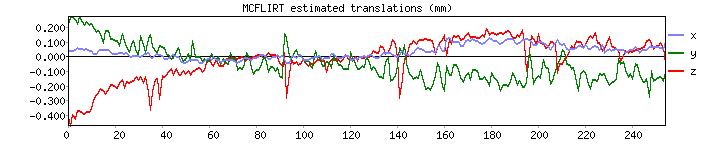

Processing: sub-55/ses-02/run-05


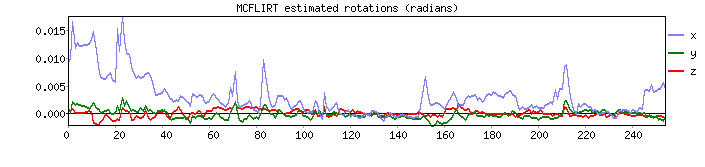

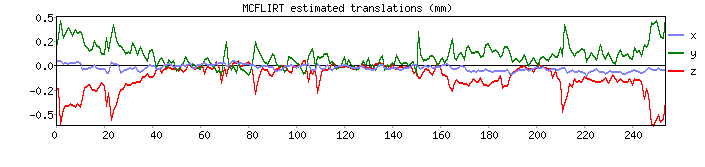

Processing: sub-56/ses-02/run-01


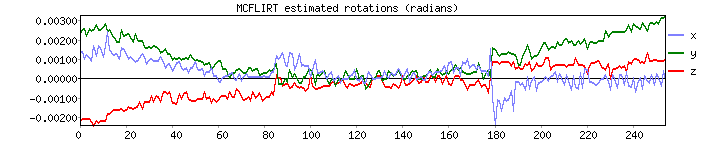

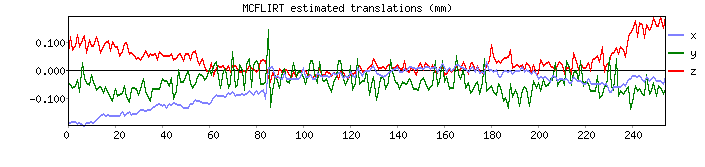

Processing: sub-56/ses-02/run-02


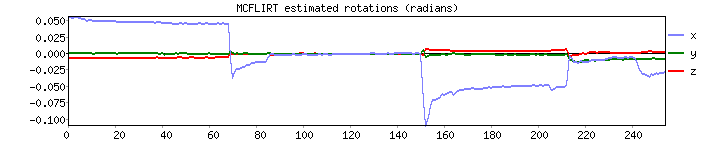

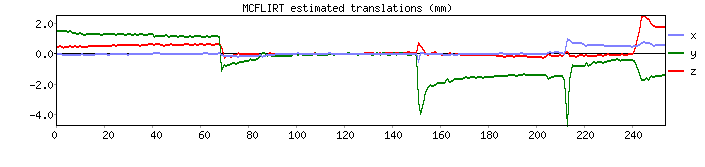

Processing: sub-56/ses-02/run-03


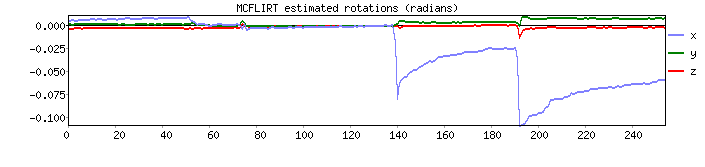

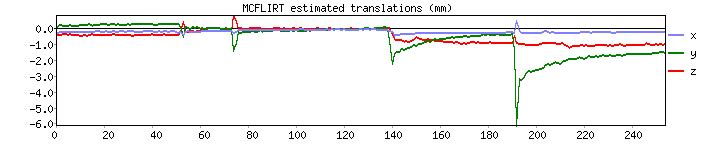

Processing: sub-56/ses-02/run-04


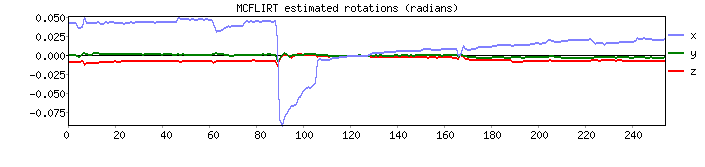

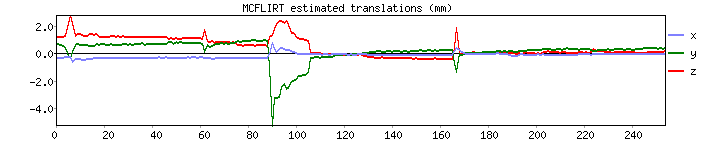

Processing: sub-56/ses-02/run-05


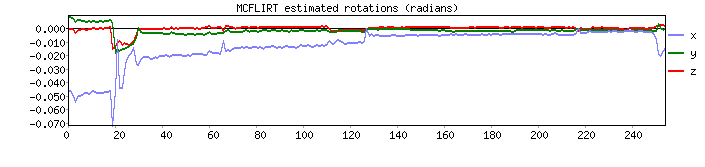

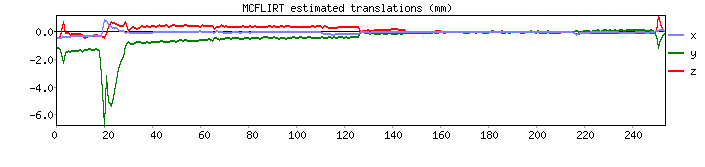

Processing: sub-57/ses-02/run-01


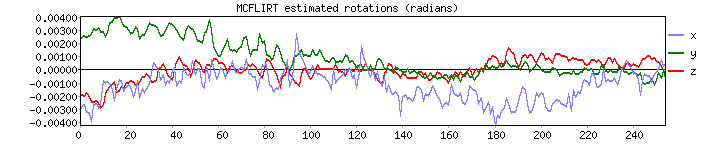

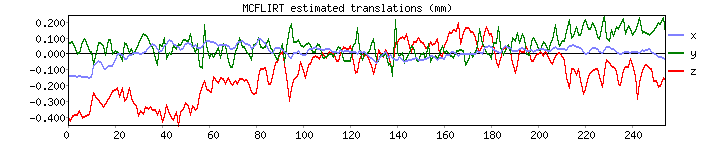

Processing: sub-57/ses-02/run-02


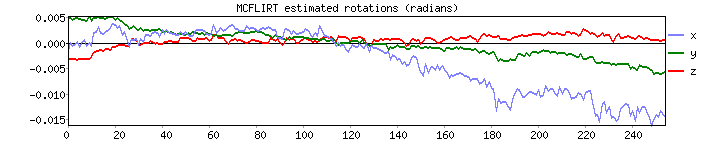

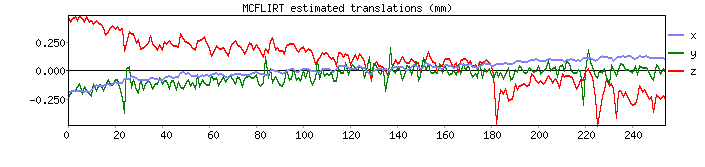

Processing: sub-57/ses-02/run-03


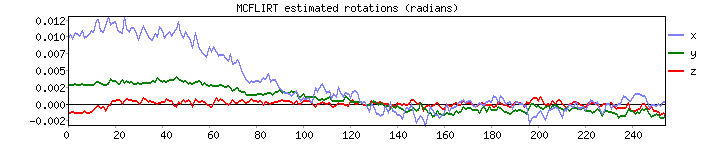

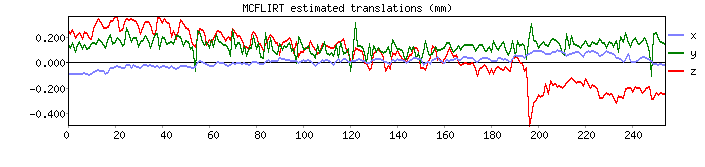

Processing: sub-57/ses-02/run-04


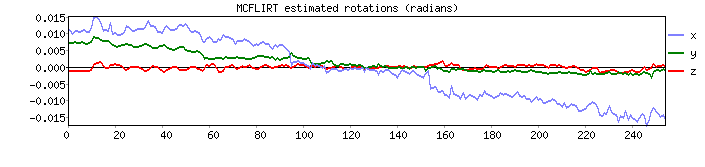

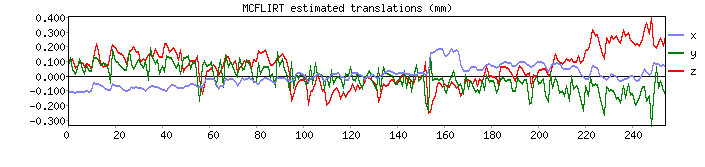

Processing: sub-57/ses-02/run-05


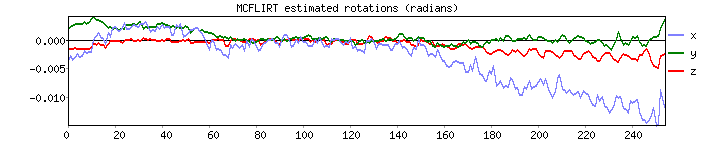

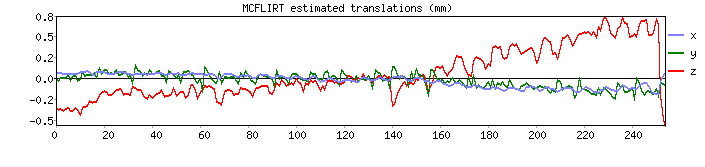

Processing: sub-58/ses-02/run-01


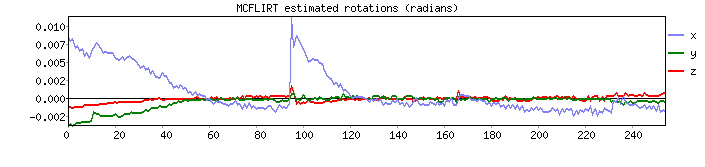

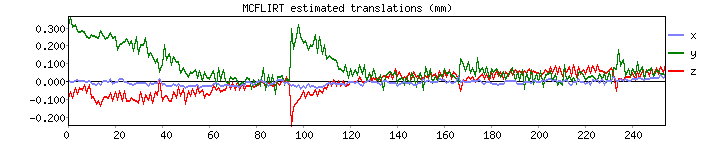

Processing: sub-58/ses-02/run-02


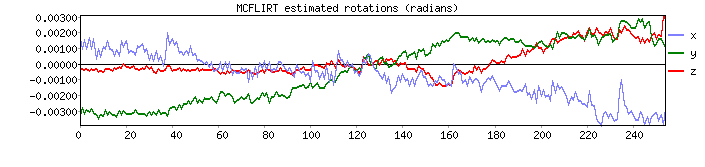

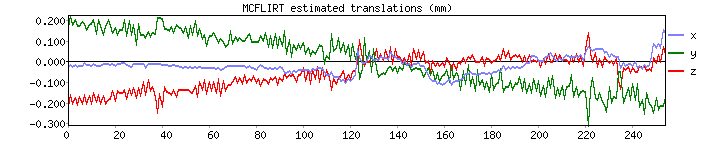

Processing: sub-58/ses-02/run-03


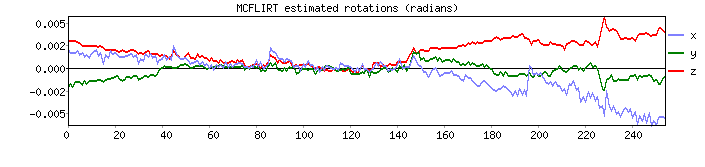

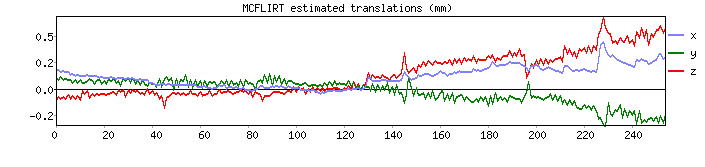

Processing: sub-58/ses-02/run-04


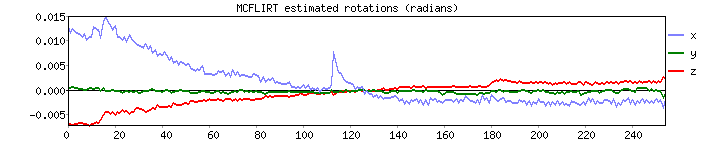

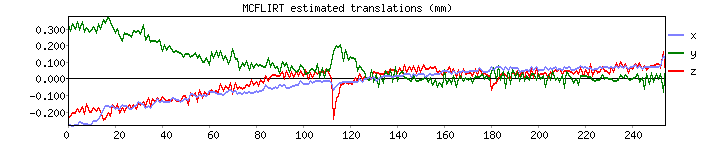

Processing: sub-58/ses-02/run-05


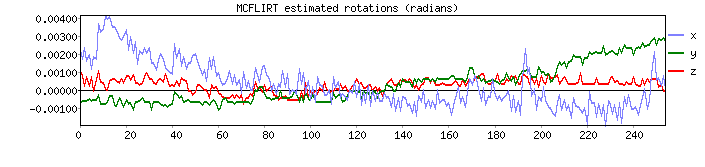

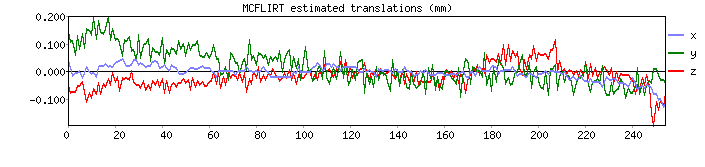

Processing: sub-59/ses-02/run-01


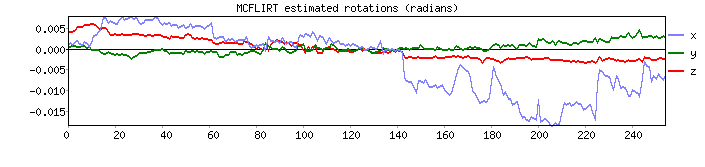

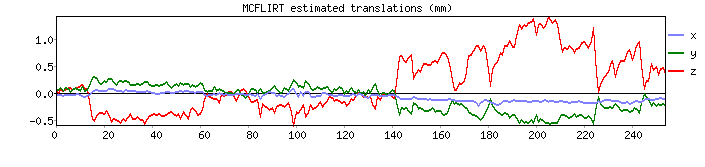

Processing: sub-59/ses-02/run-02


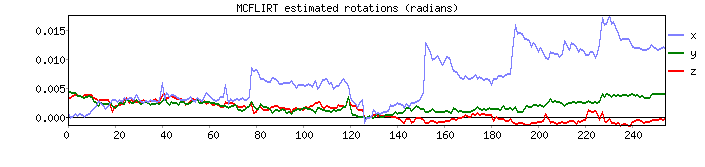

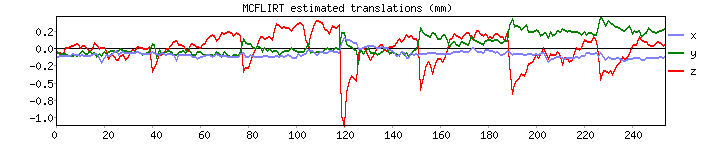

Processing: sub-59/ses-02/run-03


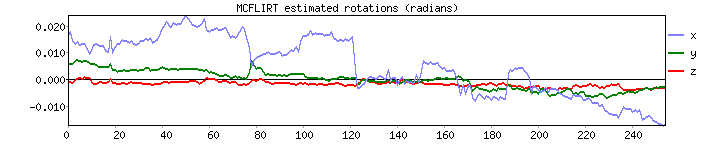

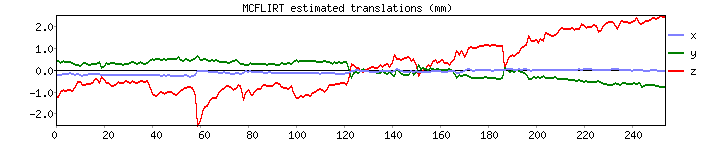

Processing: sub-59/ses-02/run-04


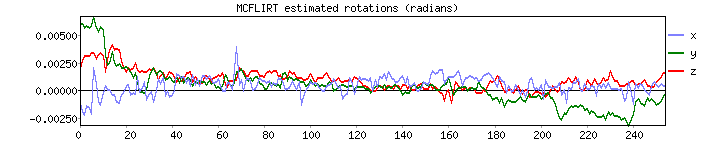

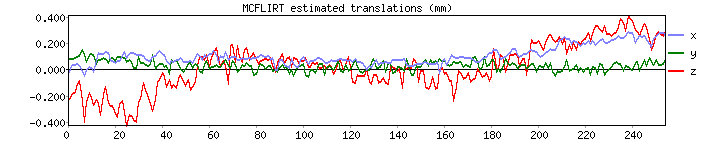

Processing: sub-59/ses-02/run-05


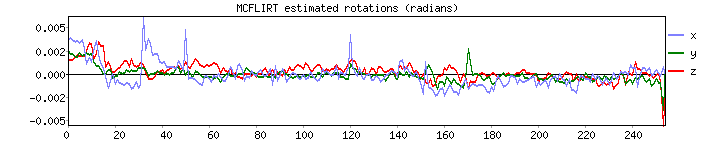

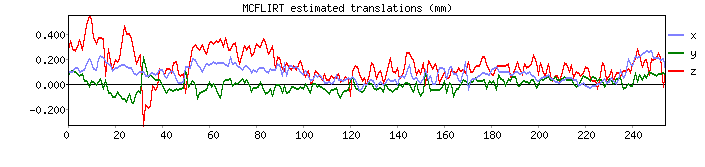

Processing: sub-60/ses-02/run-01


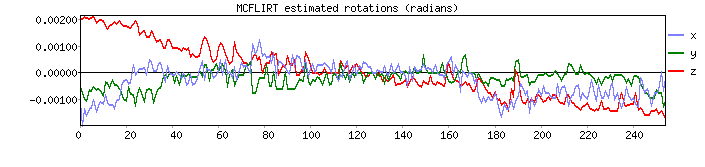

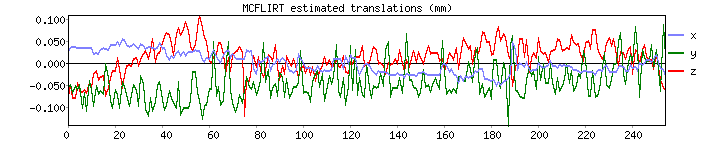

Processing: sub-60/ses-02/run-02


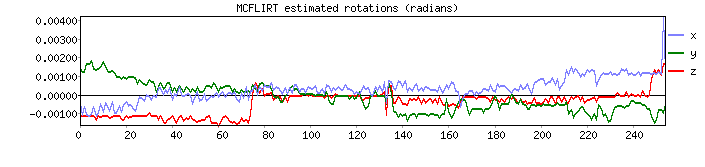

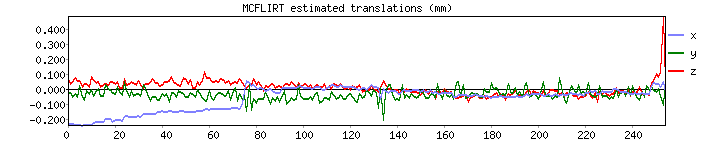

Processing: sub-60/ses-02/run-03


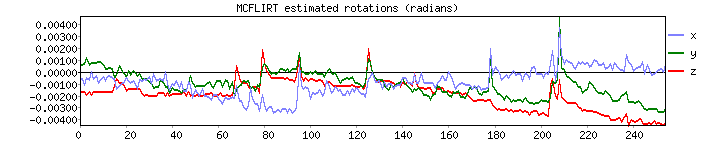

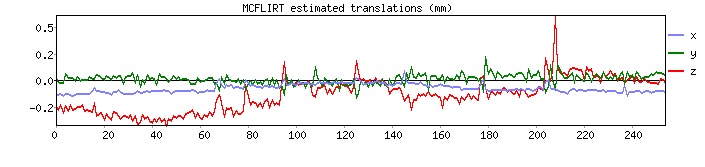

Processing: sub-60/ses-02/run-04


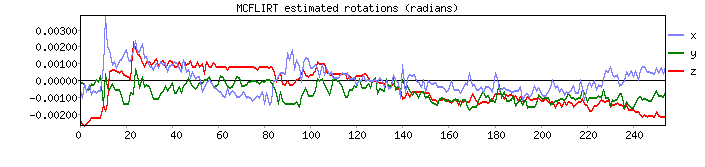

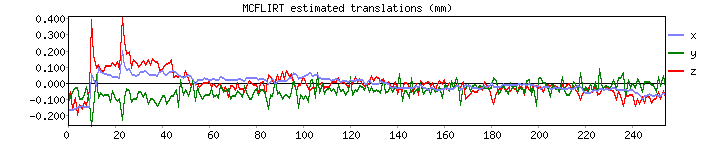

Processing: sub-60/ses-02/run-05


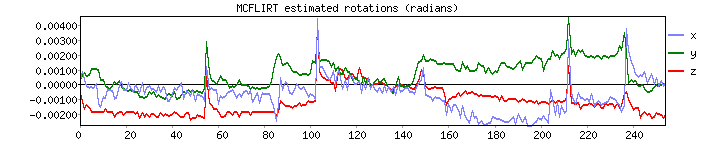

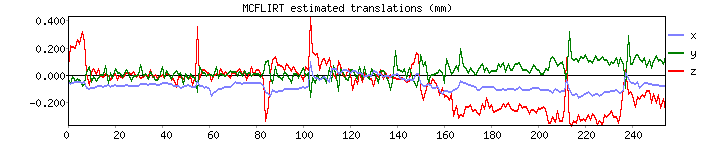

Processing: sub-61/ses-02/run-01


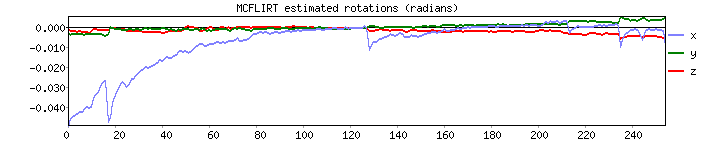

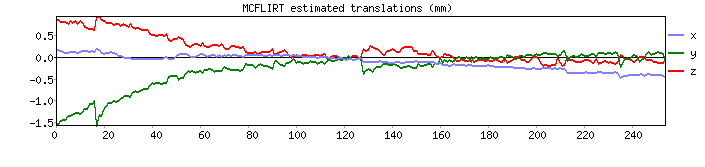

Processing: sub-61/ses-02/run-02


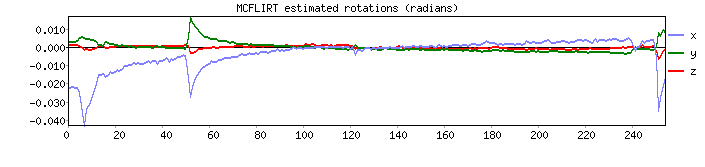

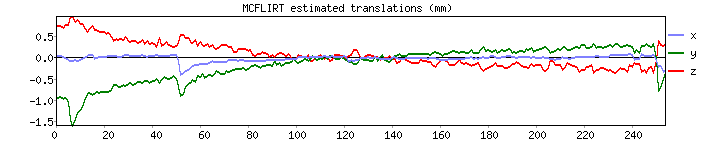

Processing: sub-61/ses-02/run-03


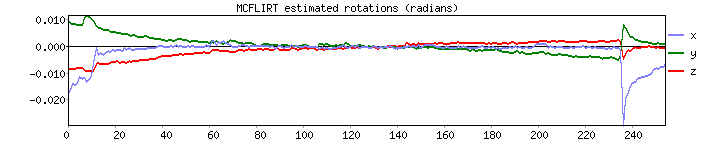

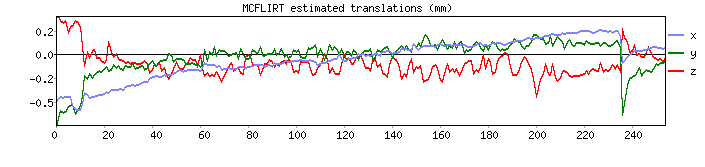

Processing: sub-61/ses-02/run-04


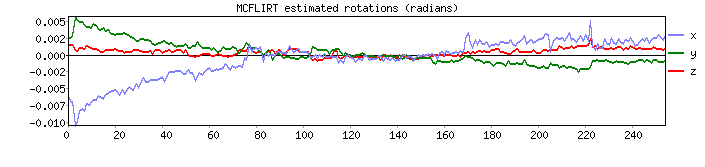

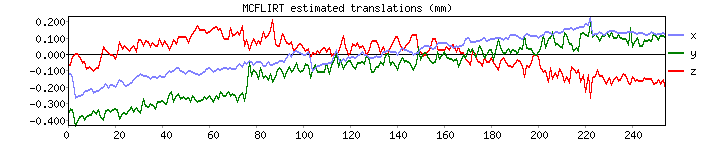

Processing: sub-61/ses-02/run-05


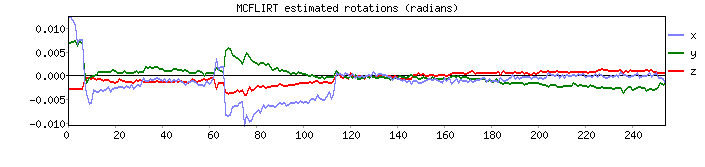

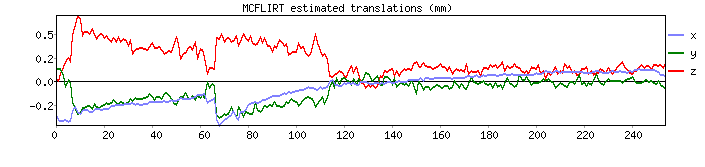

Processing: sub-62/ses-02/run-01


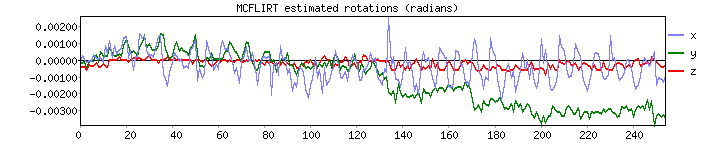

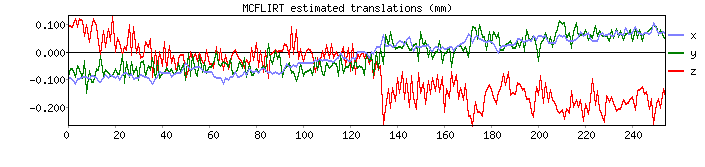

Processing: sub-62/ses-02/run-02


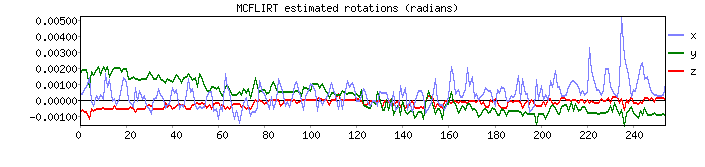

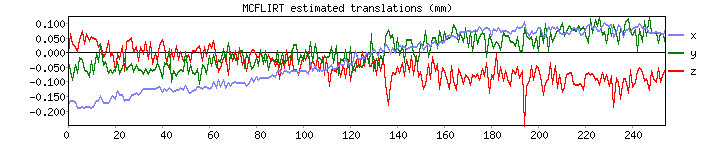

Processing: sub-62/ses-02/run-03


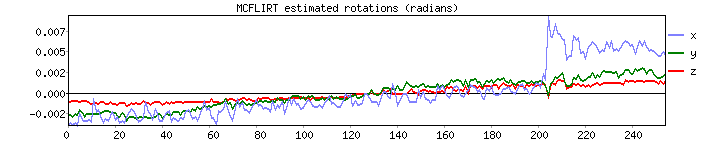

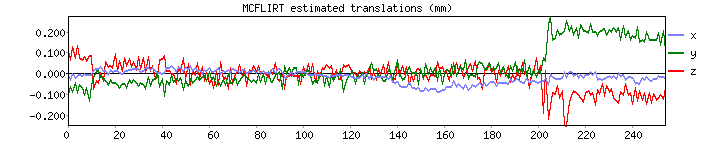

Processing: sub-62/ses-02/run-04


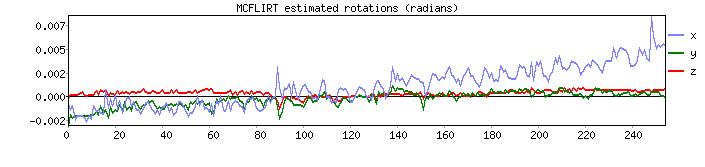

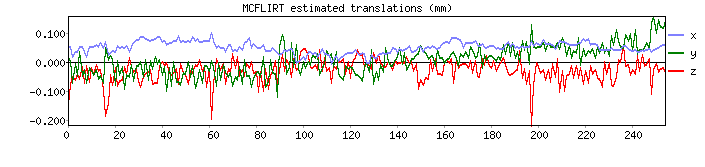

Processing: sub-62/ses-02/run-05


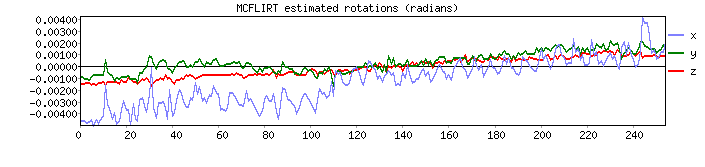

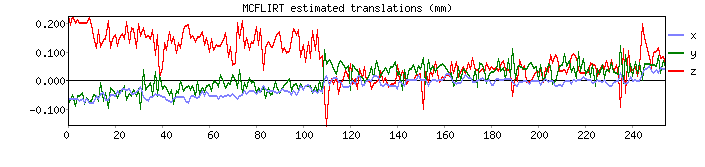

Processing: sub-63/ses-02/run-01


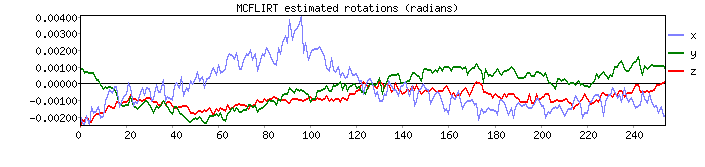

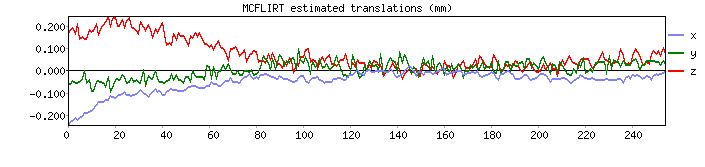

Processing: sub-63/ses-02/run-02


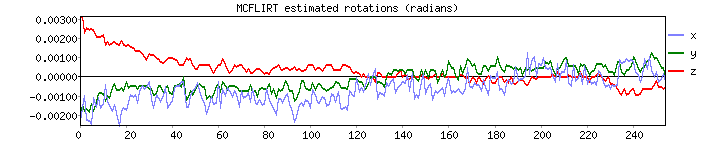

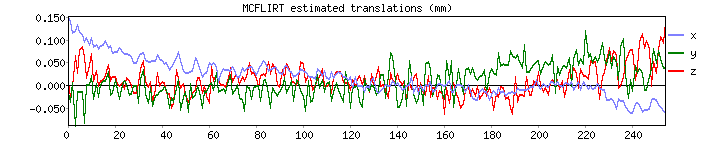

Processing: sub-63/ses-02/run-03


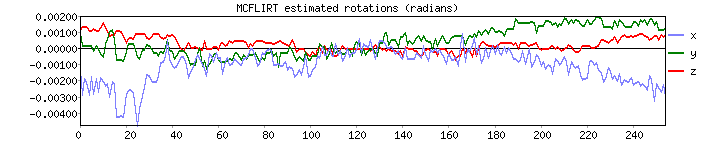

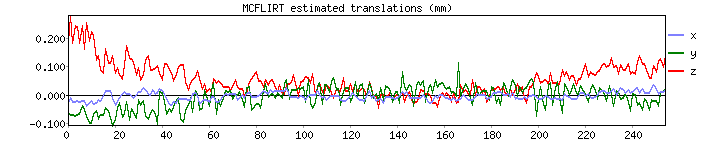

Processing: sub-63/ses-02/run-04


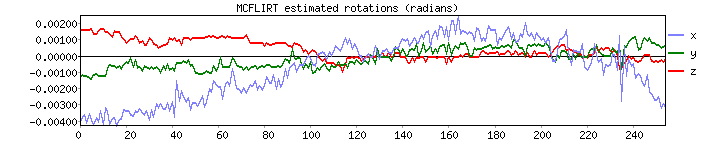

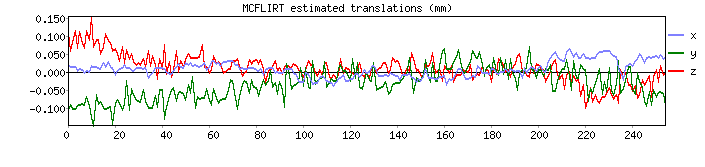

Processing: sub-63/ses-02/run-05


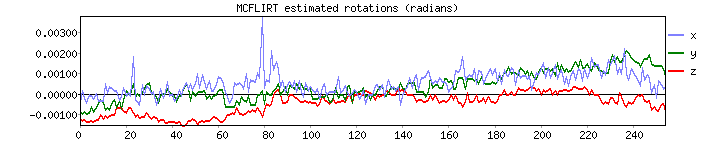

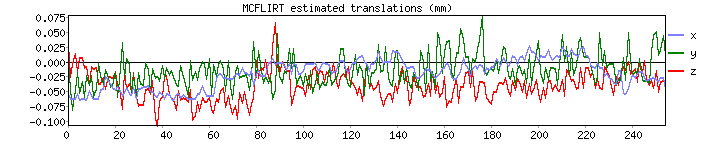

Processing: sub-64/ses-02/run-01


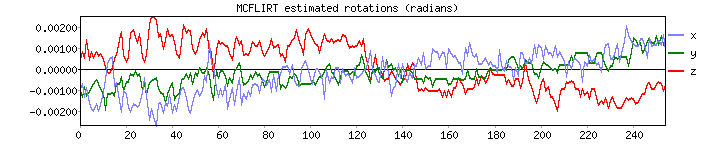

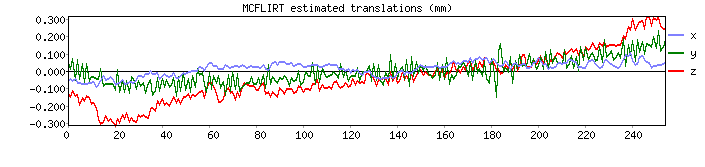

Processing: sub-64/ses-02/run-02


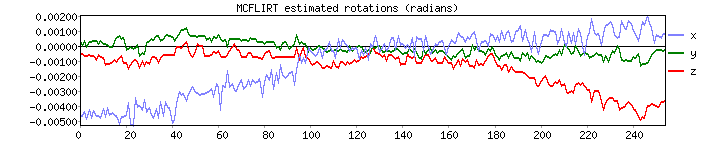

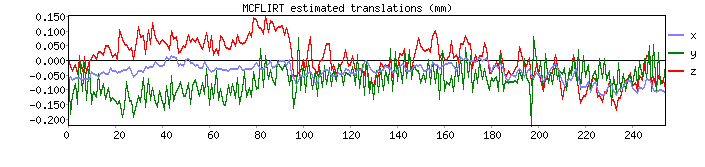

Processing: sub-64/ses-02/run-03


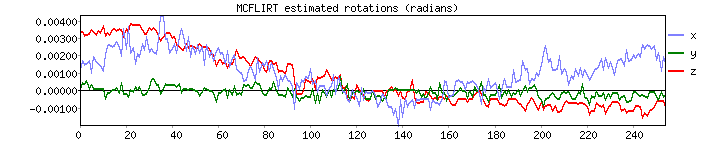

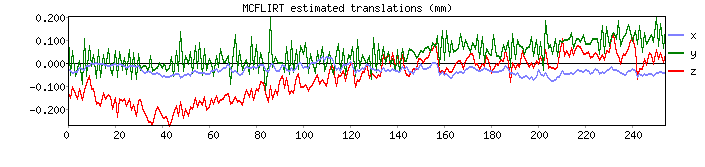

Processing: sub-64/ses-02/run-04


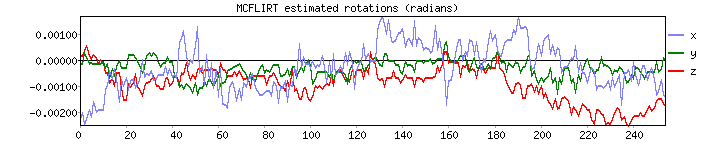

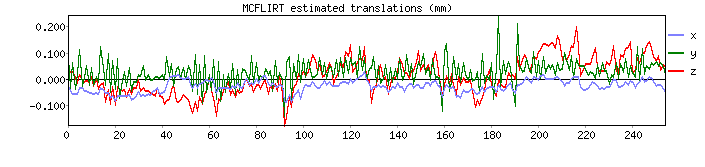

Processing: sub-64/ses-02/run-05


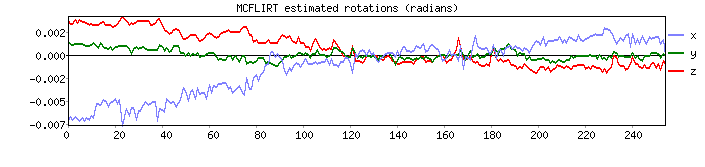

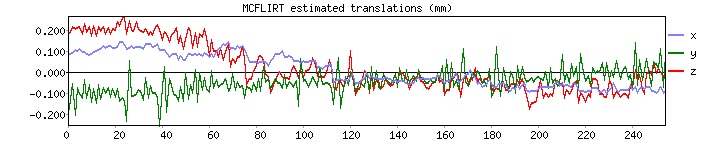

Processing: sub-65/ses-02/run-01


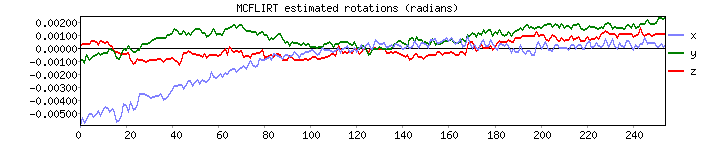

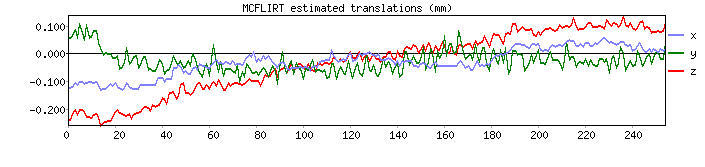

Processing: sub-65/ses-02/run-02


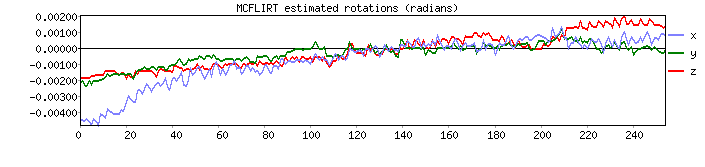

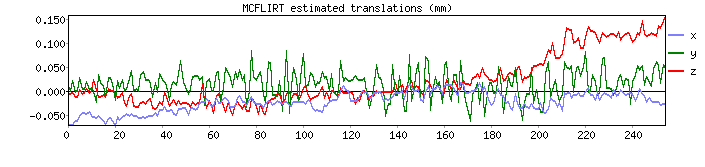

Processing: sub-65/ses-02/run-03


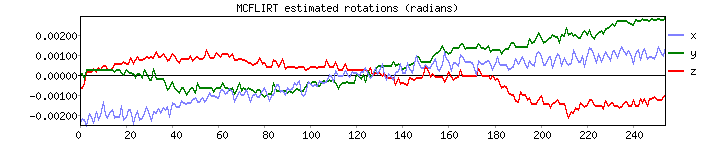

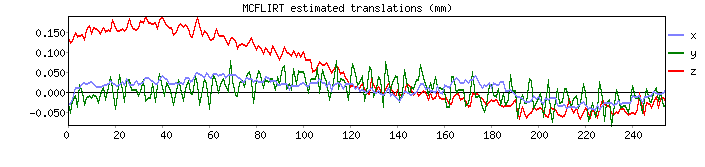

Processing: sub-65/ses-02/run-04


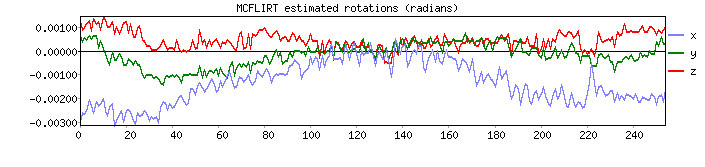

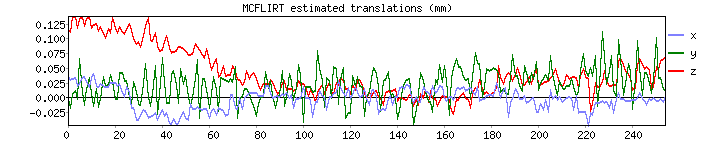

Processing: sub-65/ses-02/run-05


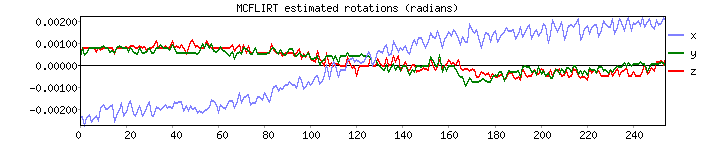

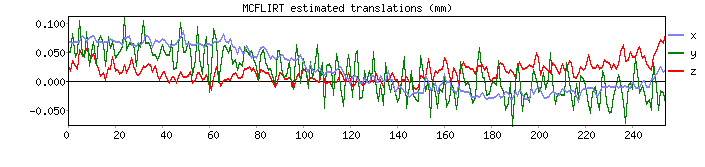

Processing: sub-66/ses-02/run-01


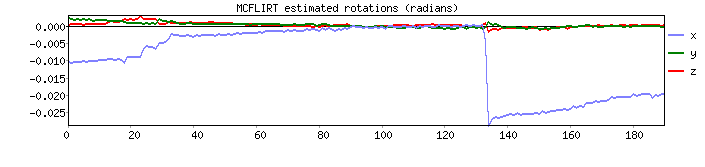

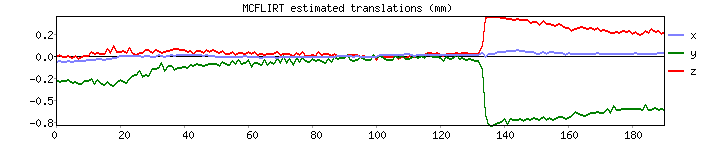

Processing: sub-66/ses-02/run-02


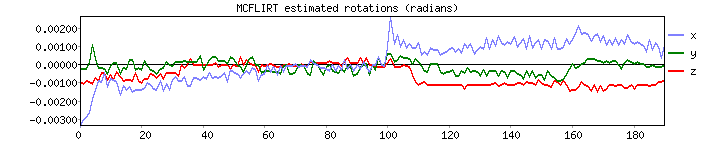

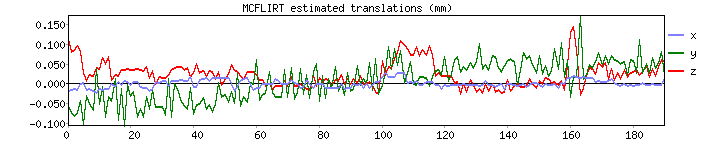

Processing: sub-66/ses-02/run-03


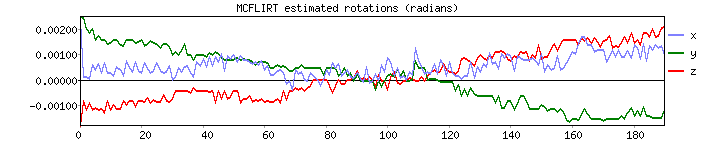

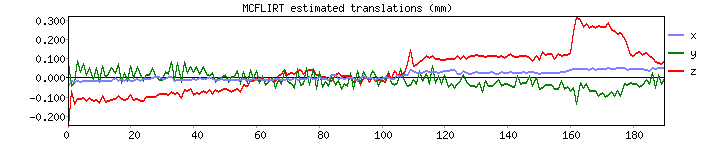

Processing: sub-66/ses-02/run-04


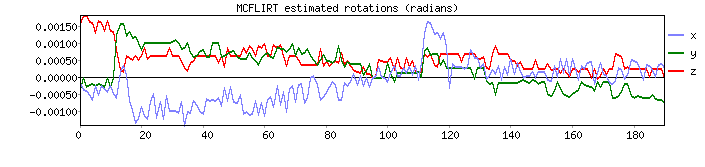

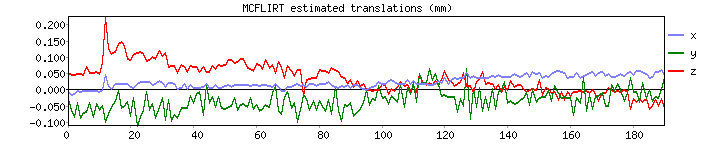

Processing: sub-66/ses-02/run-05


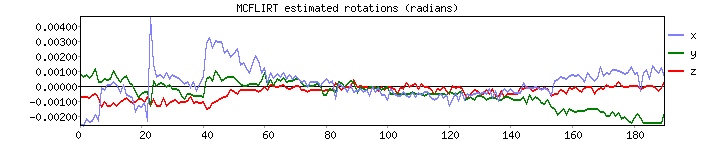

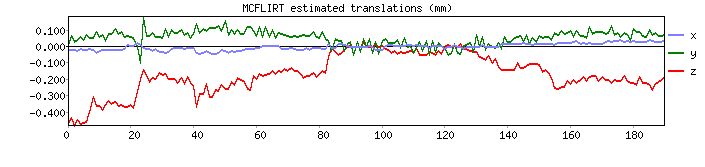

Processing: sub-67/ses-02/run-01


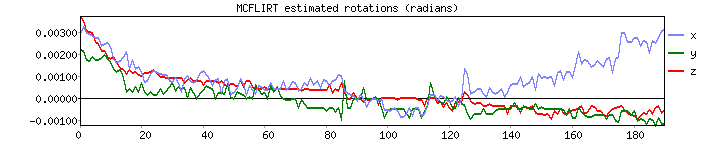

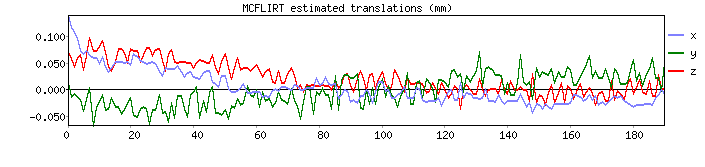

Processing: sub-67/ses-02/run-02


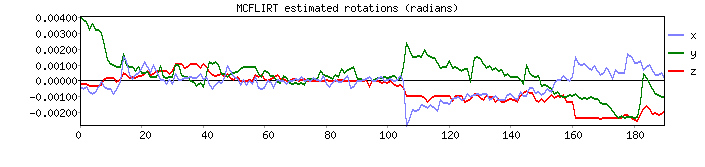

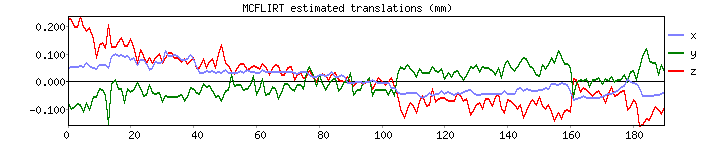

Processing: sub-67/ses-02/run-03


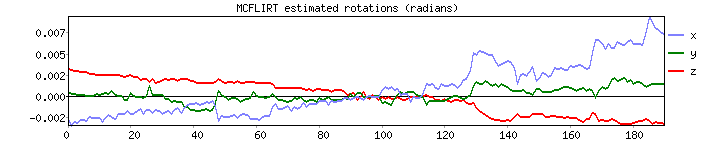

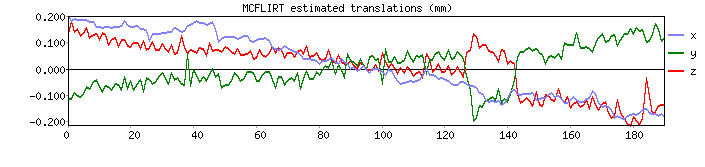

Processing: sub-67/ses-02/run-04


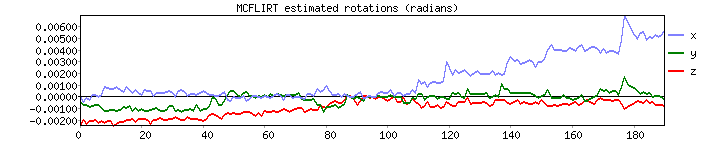

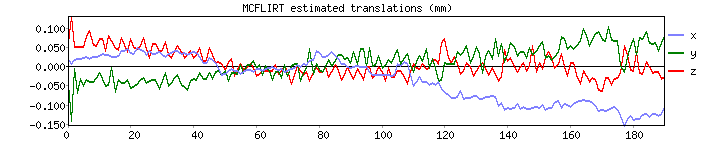

Processing: sub-67/ses-02/run-05


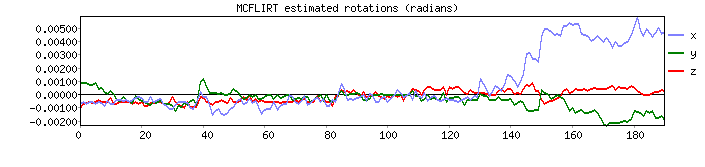

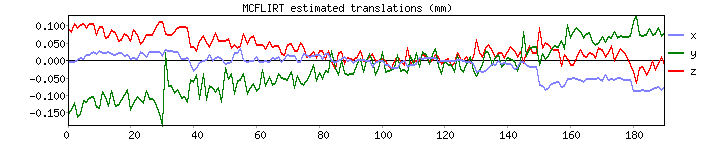

Processing: sub-68/ses-02/run-01


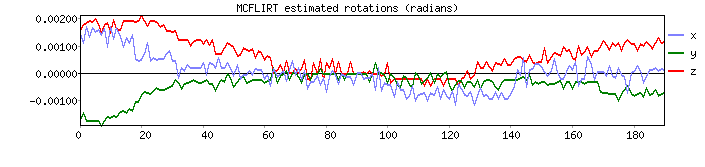

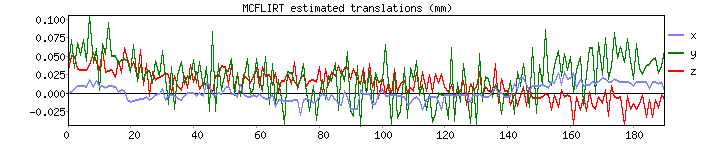

Processing: sub-68/ses-02/run-02


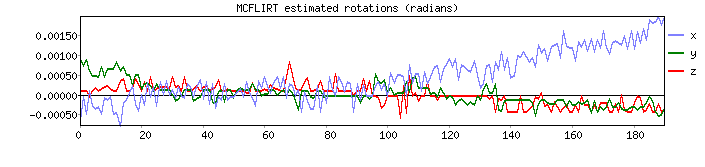

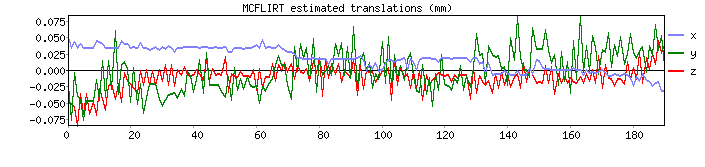

Processing: sub-68/ses-02/run-03


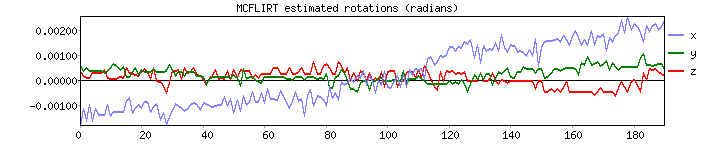

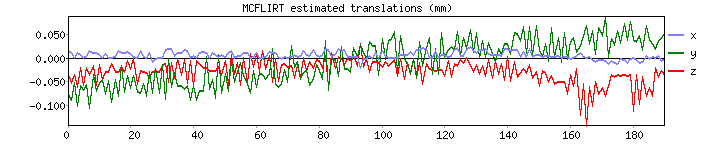

Processing: sub-68/ses-02/run-04


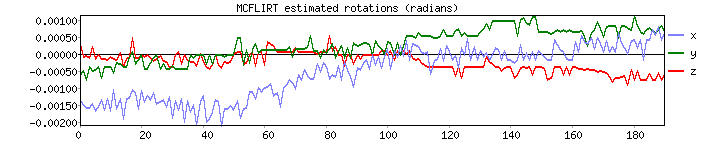

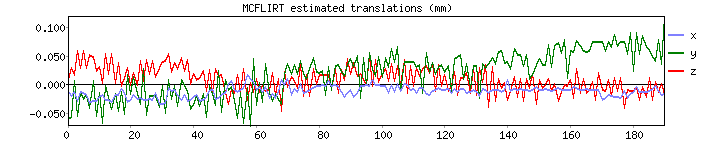

Processing: sub-68/ses-02/run-05


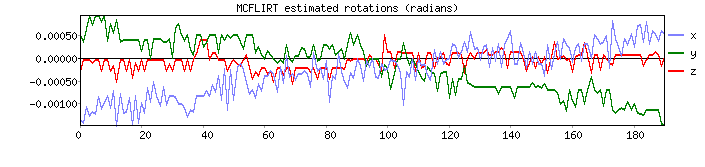

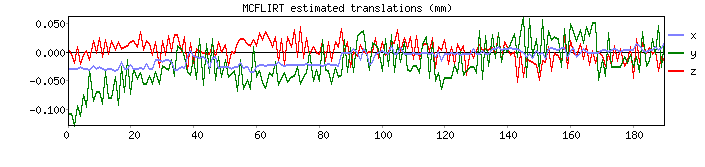

Processing: sub-69/ses-02/run-01


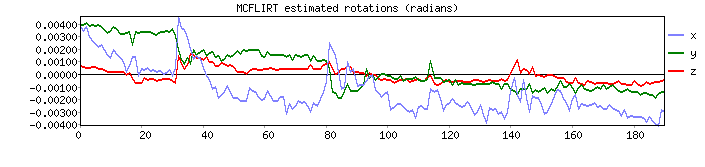

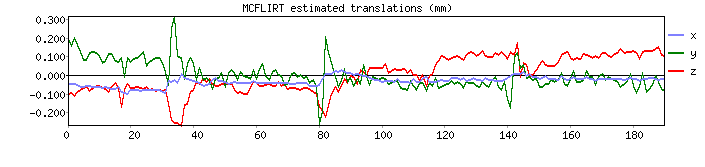

Processing: sub-69/ses-02/run-02


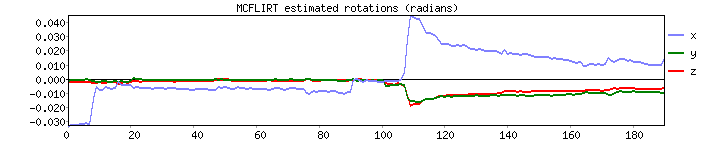

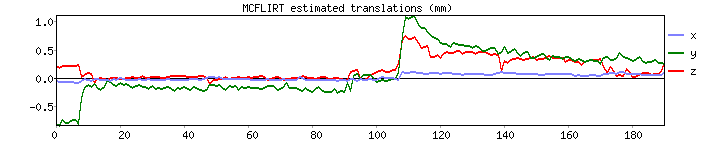

Processing: sub-69/ses-02/run-03


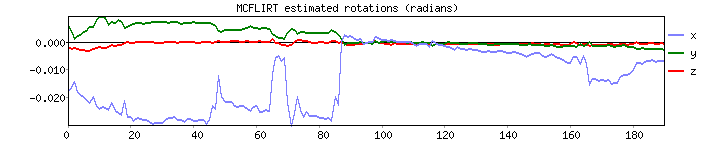

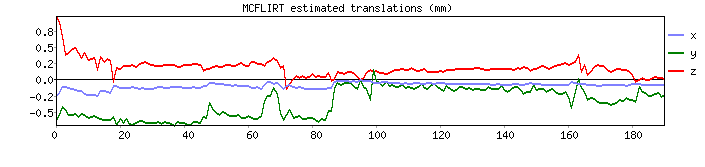

Processing: sub-69/ses-02/run-04


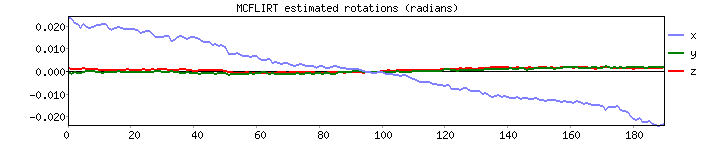

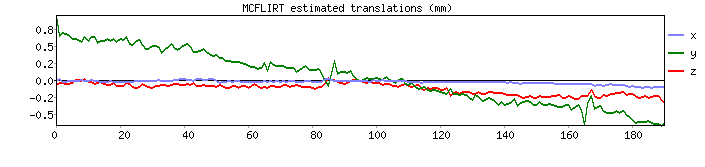

Processing: sub-69/ses-02/run-05


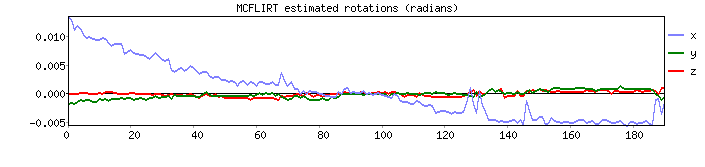

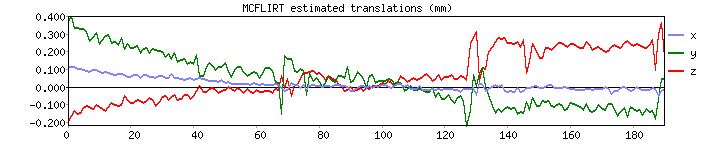

Processing: sub-70/ses-02/run-01


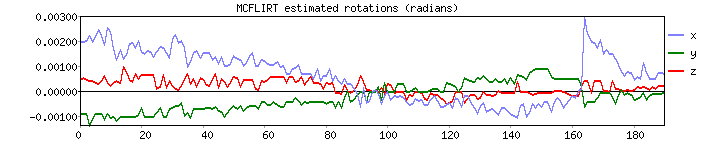

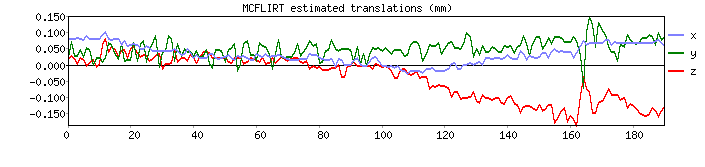

Processing: sub-70/ses-02/run-02


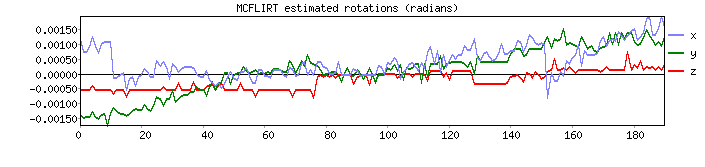

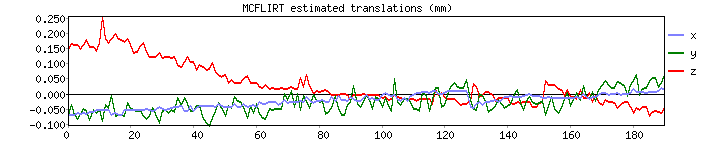

Processing: sub-70/ses-02/run-03


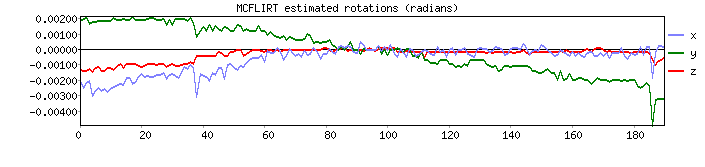

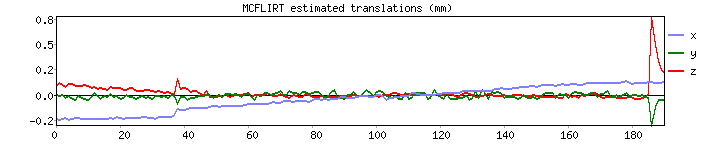

Processing: sub-70/ses-02/run-04


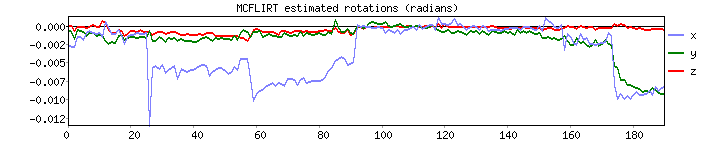

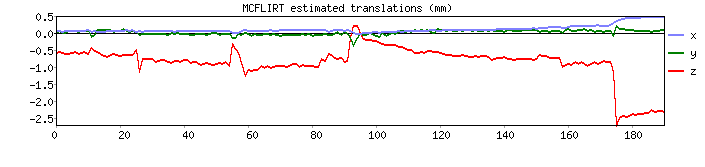

Processing: sub-70/ses-02/run-05


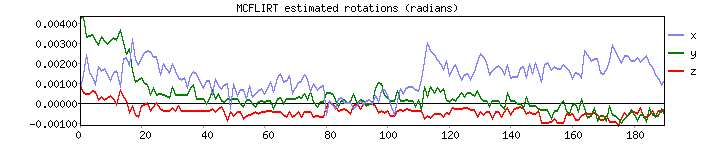

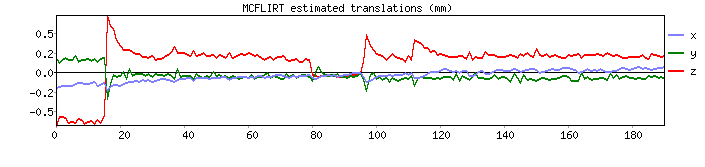

Processing: sub-71/ses-02/run-01


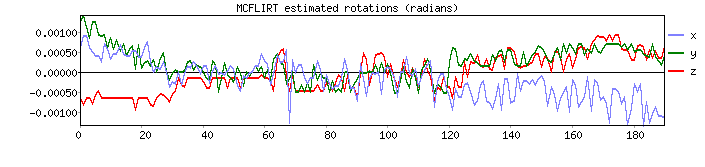

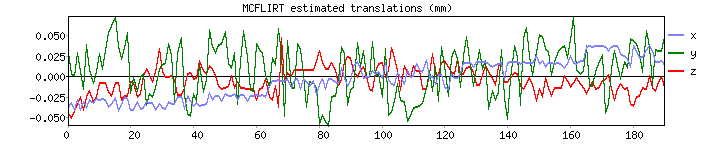

Processing: sub-71/ses-02/run-02


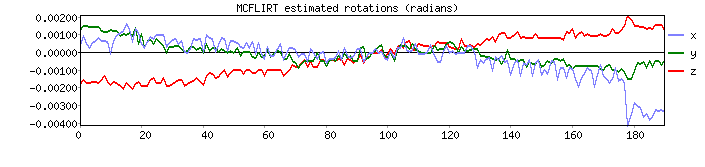

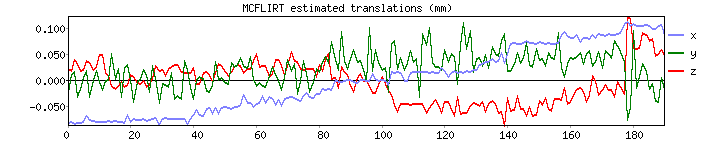

Processing: sub-71/ses-02/run-03


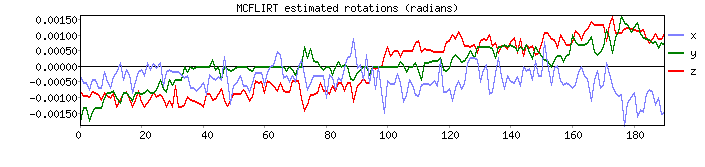

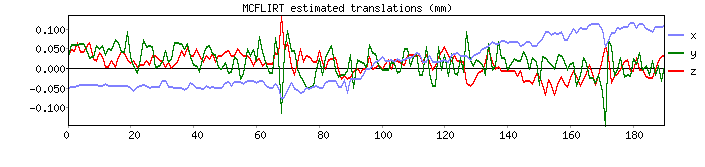

Processing: sub-71/ses-02/run-04


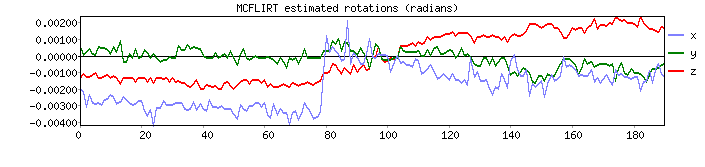

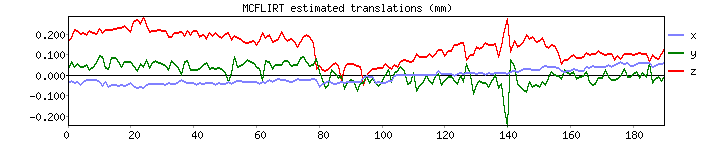

Processing: sub-71/ses-02/run-05


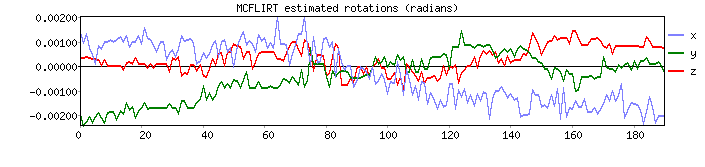

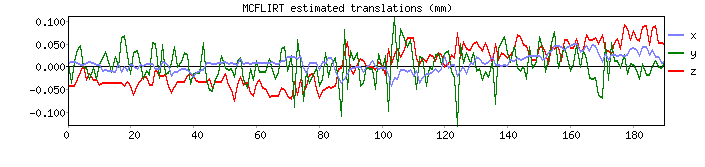

Processing: sub-72/ses-02/run-01


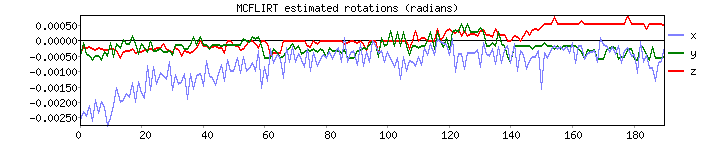

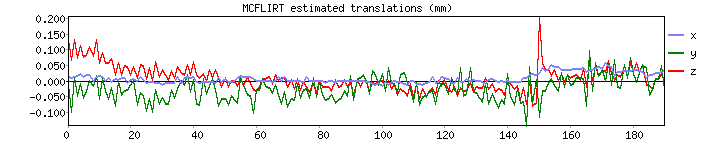

Processing: sub-72/ses-02/run-02


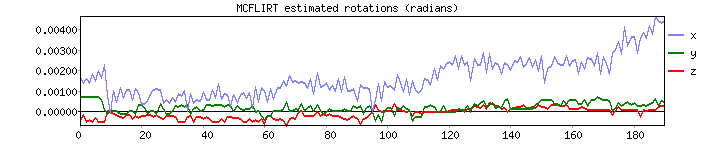

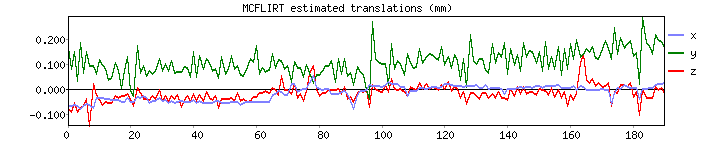

Processing: sub-72/ses-02/run-03


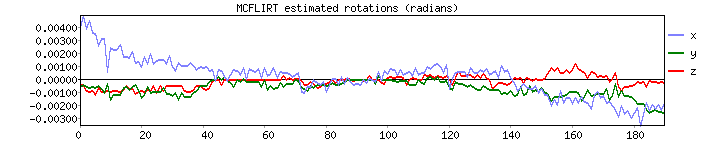

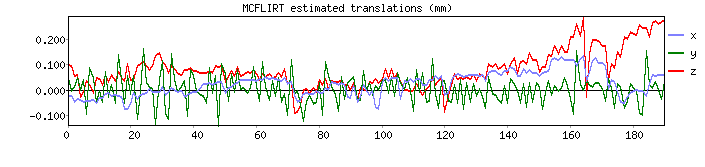

Processing: sub-72/ses-02/run-04


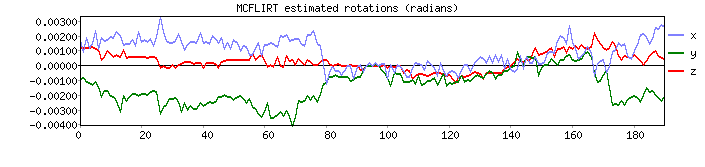

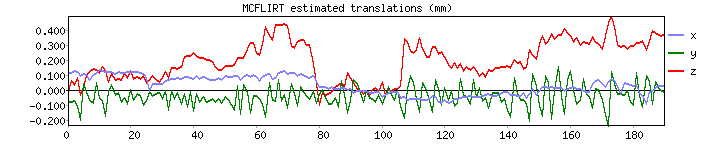

Processing: sub-72/ses-02/run-05


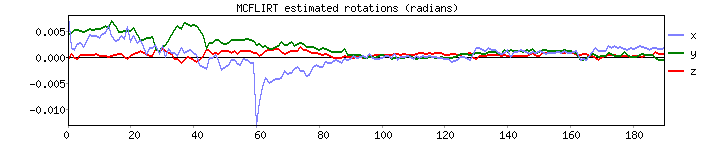

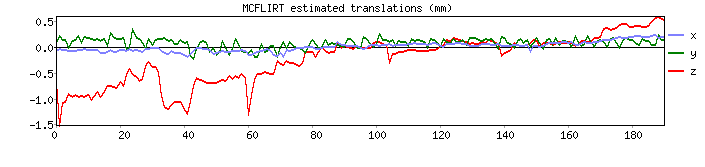

Processing: sub-73/ses-02/run-01


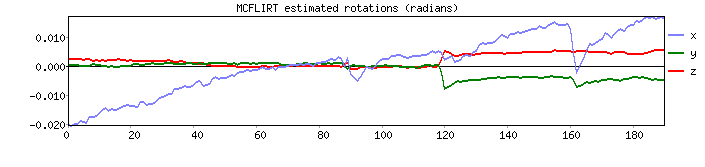

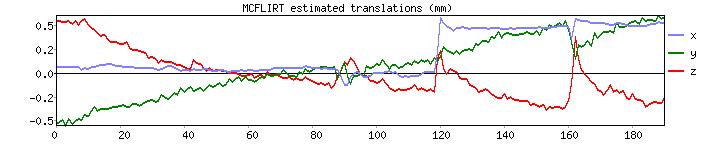

Processing: sub-73/ses-02/run-02


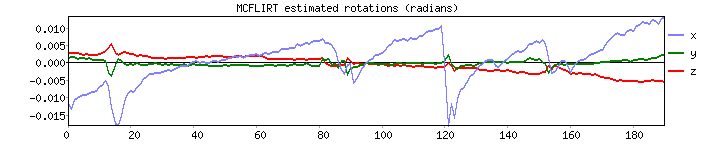

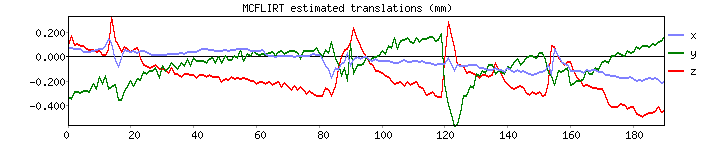

Processing: sub-73/ses-02/run-03


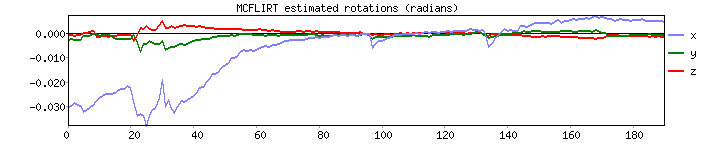

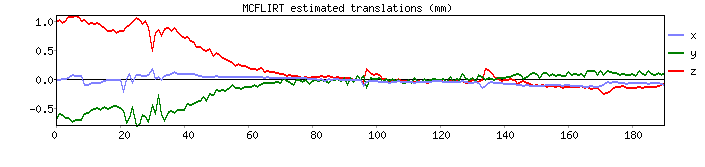

Processing: sub-73/ses-02/run-04


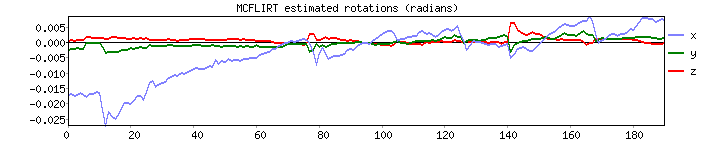

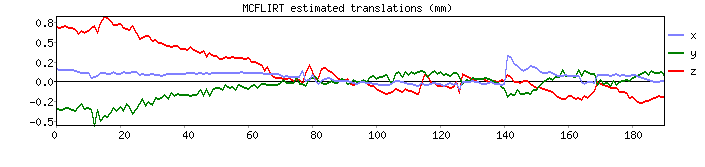

Processing: sub-73/ses-02/run-05


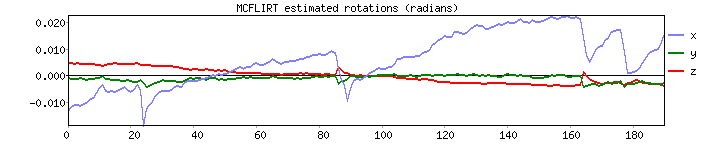

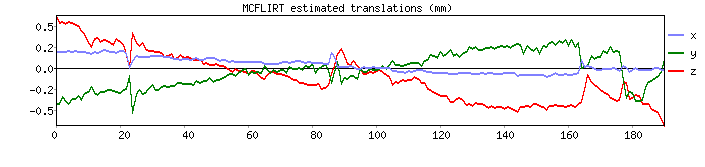

Processing: sub-74/ses-02/run-01


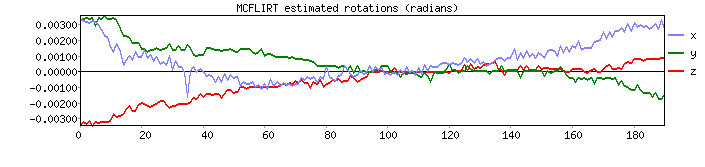

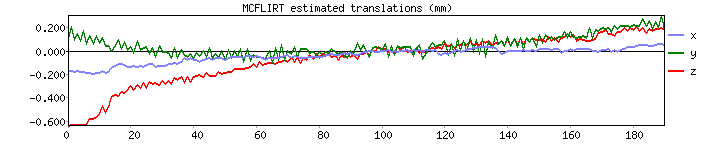

Processing: sub-74/ses-02/run-02


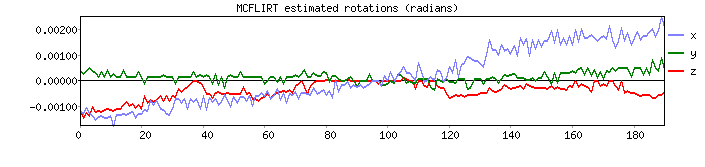

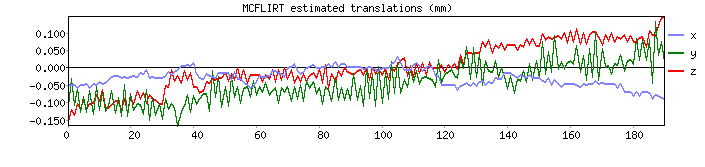

Processing: sub-74/ses-02/run-03


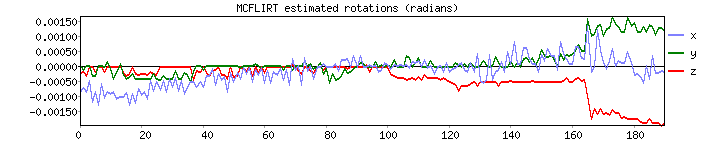

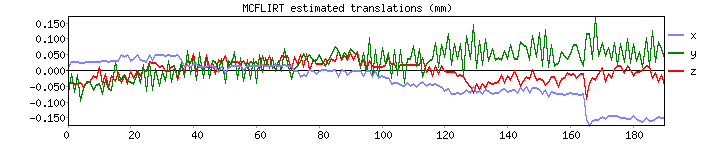

Processing: sub-74/ses-02/run-04


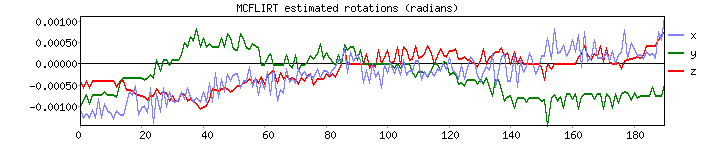

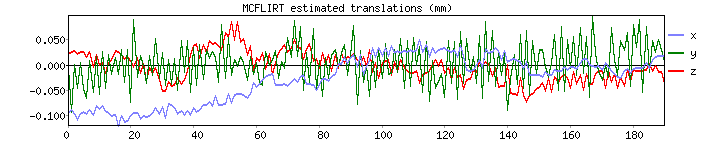

Processing: sub-74/ses-02/run-05


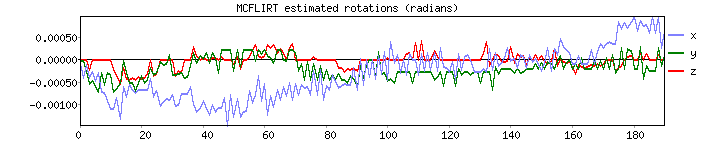

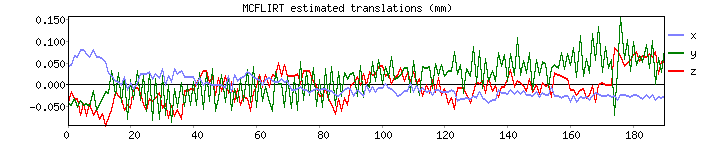

Processing: sub-75/ses-02/run-01


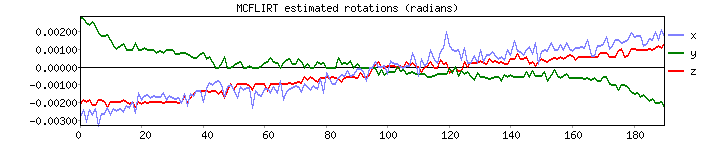

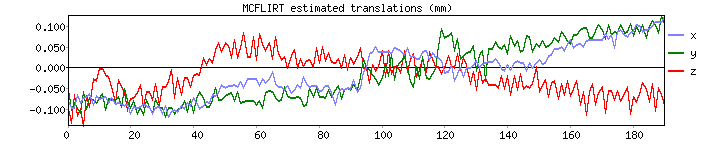

Processing: sub-75/ses-02/run-02


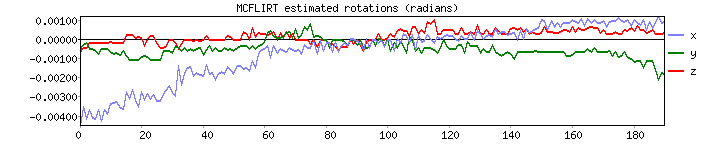

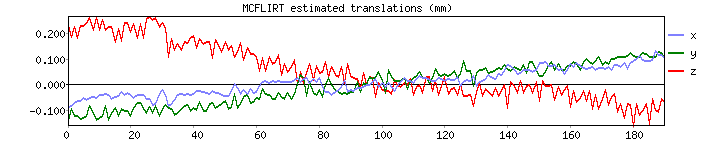

Processing: sub-75/ses-02/run-03


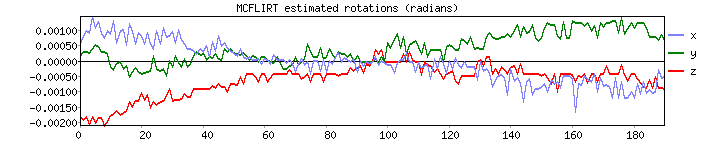

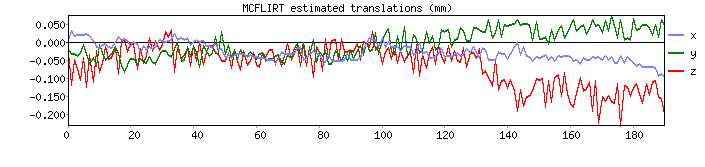

Processing: sub-75/ses-02/run-04


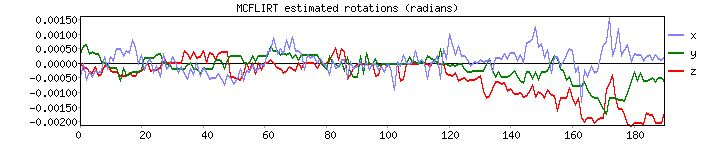

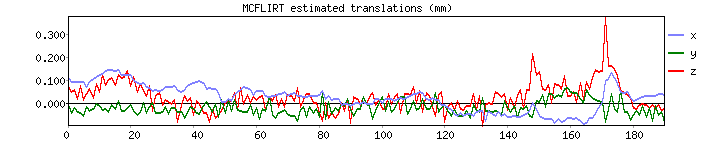

Processing: sub-75/ses-02/run-05


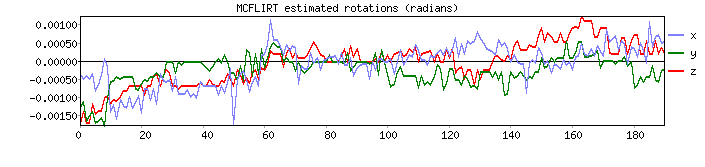

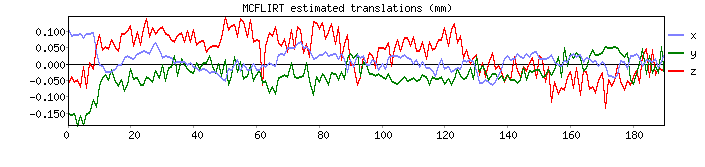

Processing: sub-76/ses-02/run-01


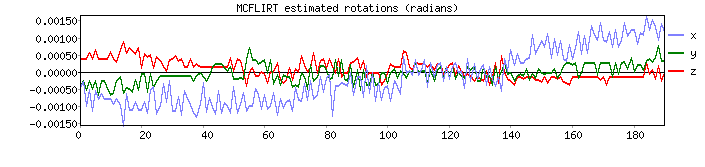

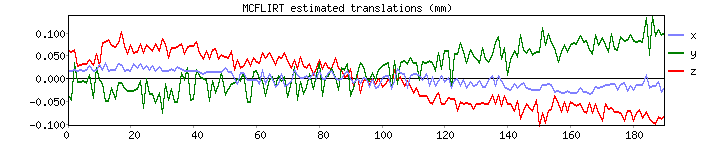

Processing: sub-76/ses-02/run-02


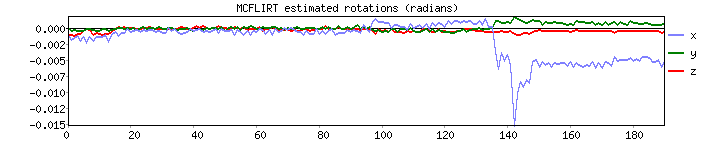

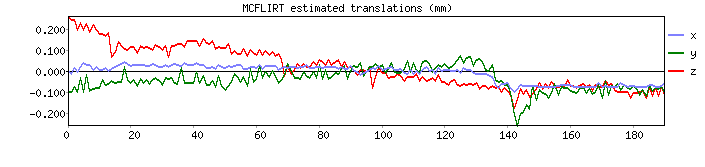

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
%matplotlib inline

from IPython.display import display, Image
import matplotlib.pyplot as plt
from pathlib import Path
import glob

# Define data path
data_path = Path("/mnt/d/Data/Human/ObjectCategorization/analysis2")

# Find motion correction directories
mc_dirs = list(data_path.glob("sub*/ses-02/func/run*/mc"))

# Process each motion correction directory
for curr_mc in mc_dirs:
    sub, session,func,run = curr_mc.parts[-5:-1]  # Extract subject/session dynamically
    print(f"Processing: {sub}/{session}/{run}")

    # Ensure directory exists
    if not curr_mc.exists():
        print(f"Skipping {curr_mc}, directory does not exist!")
        continue

    # Display images
    plt.figure(figsize=(6, 4))  # Improve figure sizing
    display(Image(filename=str(curr_mc / "rot.png")))
    display(Image(filename=str(curr_mc / "trans.png")))
